# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [326]:
#Imports
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, skew
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
license_df  = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', sep=';')
accident_df = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', sep=';')

# These data were extracted from: https://datasource.kapsarc.org/
accident_2018_df = pd.read_csv('../data/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2018.csv', sep=';')
license_2018_df  = pd.read_csv('../data/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008.csv', sep=';')
population_df    = pd.read_csv('../data/population/saudi-arabia-population-by-administrative-region-nationality-and-sex-2.csv', sep=';')


#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
license_df.head(10)

Unnamed: 0    Year Administritive Area Driving Liceses  \
0           0  (2012)              Makkah         143954n   
1           1  (1994)              Makkah          75349n   
2           2  (1998)              Makkah          86082n   
3           3  (2004)              Makkah          86636n   
4           4  (2005)              Makkah          65099n   
5           5  (2008)              Makkah          77013n   
6           6  (2014)             Madinah          31447n   
7           7  (2013)             Madinah          28513n   
8           8  (2012)             Madinah          14459n   
9           9  (1994)             Madinah           3767n   

                  geo_point_2d  
0  21.628962766, 41.2636898334  
1  21.628962766, 41.2636898334  
2  21.628962766, 41.2636898334  
3  21.628962766, 41.2636898334  
4  21.628962766, 41.2636898334  
5  21.628962766, 41.2636898334  
6  24.927534539, 39.4918237173  
7  24.927534539, 39.4918237173  
8  24.927534539, 39.4918237173  
9  24.927534539, 39.4918237173

In [4]:
accident_df.head(10)

Unnamed: 0  Unnamed: 0.1    Year            Region  \
0           0             0  (2016)            Makkah   
1           1             1  (2016)    Eastern Region   
2           2             2  (2016)            Tabouk   
3           3             3  (2016)              Hail   
4           4             4  (2016)              Hail   
5           5             5  (2016)  Northern Boarder   
6           6             6  (2017)             Jazan   
7           7             7  (2017)           Al-Jouf   
8           8             8  (2017)             Total   
9           9             9  (2016)  Northern Boarder   

                     Indicator   Value                  geo_point_2d  
0  No. of Casualties - Injured  12383n   21.628962766, 41.2636898334  
1     No. of Casualties - Dead   1113n  23.2883307307, 50.1478302439  
2     No. of Casualties - Dead    434n    27.90165499, 37.2598581394  
3     No. of Casualties - Dead    299n   27.400845724, 41.4406960508  
4             No. of Accidents  10199n   27.400845724, 41.4406960508  
5     No. of Casualties - Dead    193n   30.197074783, 41.8171186952  
6             No. of Accidents  22161n  17.2072313962, 42.6525807422  
7             No. of Accidents  10469n  29.9677445762, 39.5570371172  
8     No. of Casualties - Dead   7489n                           NaN  
9  No. of Casualties - Injured    631n   30.197074783, 41.8171186952

In [5]:
accident_2018_df.head()

Year   Region                    Indicator  Value  \
0  2018  Al-Jouf             No. of Accidents   7355   
1  2018   Qassim  No. of Casualties - Injured   1269   
2  2018     Asir             No. of Accidents  25964   
3  2018   Makkah     No. of Casualties - Dead   1301   
4  2018   Najran  No. of Casualties - Injured    654   

                                           geo_shape  \
0  {"type": "Polygon", "coordinates": [[[38.24572...   
1  {"type": "Polygon", "coordinates": [[[41.29777...   
2  {"type": "MultiPolygon", "coordinates": [[[[41...   
3  {"type": "MultiPolygon", "coordinates": [[[[41...   
4  {"type": "Polygon", "coordinates": [[[45.08826...   

                  geo_point_2d  
0  29.9677445762,39.5570371172  
1  26.1967063704,43.3429998455  
2   19.1387847401,42.941470036  
3   21.628962766,41.2636898334  
4  18.4511003068,46.8688495726

In [6]:
license_2018_df.head()

Year Administritive Area  Number of Driving Licenses  \
0  2018              Tabouk                        7613   
1  2018             Al-Baha                        2575   
2  2018             Eastern                      131639   
3  2018               Total                      899844   
4  2018             Madinah                       23335   

                                           geo_shape  \
0  {"type": "MultiPolygon", "coordinates": [[[[37...   
1  {"type": "Polygon", "coordinates": [[[42.12883...   
2  {"type": "MultiPolygon", "coordinates": [[[[50...   
3                                                NaN   
4  {"type": "MultiPolygon", "coordinates": [[[[38...   

                  geo_point_2d  
0    27.90165499,37.2598581394  
1  20.1484058503,41.4665484892  
2  23.2883307307,50.1478302439  
3                          NaN  
4   24.927534539,39.4918237173

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

In [7]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


In [8]:
license_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [9]:
accident_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
Year            42 non-null int64
Region          42 non-null object
Indicator       42 non-null object
Value           42 non-null int64
geo_shape       39 non-null object
geo_point_2d    39 non-null object
dtypes: int64(2), object(4)
memory usage: 2.1+ KB


In [10]:
license_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Year                          14 non-null int64
Administritive Area           14 non-null object
Number of Driving Licenses    14 non-null int64
geo_shape                     13 non-null object
geo_point_2d                  13 non-null object
dtypes: int64(2), object(3)
memory usage: 688.0+ bytes


In [11]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
Year                     117 non-null int64
Administrative Region    117 non-null object
gender                   117 non-null object
Population               117 non-null int64
geo_shape                108 non-null object
geo_point_2d             108 non-null object
dtypes: int64(2), object(4)
memory usage: 5.6+ KB


### Answer:
- Traffic Accidents Dataframe:
    - year: Year in which the accident occured
    - region: Region in which the accident occured
    - indicator: Measurement about the demages (No. of accidents - No. of accidents - No. of dead)
    - value: value of the indicator
    - geo_point_2d: Location of center the city where the accident occured
    

- Driving Licenses Dataframe:
    - year: Year in which the licenses issued
    - region: Region in which the licenses issued
    - driving_licenses: Number of issued licenses per year
    - geo_point_2d: Location of center the city where  licenses issued
  

#### 4a. How complete is the data?

Investigate missing values etc.

In [12]:
accident_df.isna().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [13]:
 license_df.isna().sum()

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

In [14]:
accident_2018_df.isna().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_shape       3
geo_point_2d    3
dtype: int64

In [15]:
license_2018_df.isna().sum()

Year                          0
Administritive Area           0
Number of Driving Licenses    0
geo_shape                     1
geo_point_2d                  1
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [16]:
accident_df.max()

Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object

In [17]:
accident_df.min()

Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object

In [18]:
license_df.max()

Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object

In [19]:
license_df.min()

Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

In [20]:
accident_2018_df.max()

Year                                2018
Region                             Total
Indicator    No. of Casualties - Injured
Value                             352464
dtype: object

In [21]:
accident_2018_df.min()

Year                     2018
Region                Al-Baha
Indicator    No. of Accidents
Value                      75
dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [22]:
accident_df.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [23]:
license_df.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

In [24]:
accident_2018_df.dtypes

Year             int64
Region          object
Indicator       object
Value            int64
geo_shape       object
geo_point_2d    object
dtype: object

In [25]:
license_2018_df.dtypes

Year                           int64
Administritive Area           object
Number of Driving Licenses     int64
geo_shape                     object
geo_point_2d                  object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 
- In accident_df: 

   - Year and value columns  should be int type not object
   - The maximum value is for a region called 'total'
   - There are some missing data
   

- In license_df: 

   - Year and Driving Liceses columns should be int type
   - The maximun value is also called 'total'
   - There are some missing data
   

- In accident_2018_df and license_2018_df (outside resources): 

   - The types of the columns are good
   - The maximum is also for 'total'
   - There are some missing values in the 'geo points 2D' variable.
    

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [26]:
# Function that converts x to int weither x is a string or a Series
def to_int(x):
    try:
        if isinstance(x, str):
            return int(x)
        else:
            return x.astype(int)
    except ValueError:
        return x

# Function that converts x to float weither x is a string or a Series
def to_float(x):
    try:
        if isinstance(x, str):
            return float(x)
        else:
            return x.astype(float)
    except ValueError:
        return x   
        

- Make new columns `x` and `y` using `geo_point_2d`

In [27]:
# spliting geo points column to two columns in all dataframes 

accident_df[['x','y']] = accident_df['geo_point_2d'].str.split(",",expand=True)
license_df[['x','y']] = license_df['geo_point_2d'].str.split(",",expand=True)
license_2018_df[['x','y']] = license_2018_df['geo_point_2d'].str.split(",",expand=True)

accident_df[['x','y']] = accident_df[['x','y']].apply(to_float)
license_df[['x','y']] = license_df[['x','y']].apply(to_float)
license_2018_df[['x','y']] = license_2018_df[['x','y']].apply(to_float)

- Fix any individual values preventing other columns from being the appropriate type.

In [28]:
# Taking the brackets of the year and convert it to int
accident_df['Year'] = accident_df['Year'].apply(lambda x: x.replace('(', '').replace(')', '')).apply(to_int)
license_df['Year'] = license_df['Year'].apply(lambda x: x.replace('(', '').replace(')', '')).apply(to_int)


# Taking the letter (n) of the values and Driving Liceses and convert it to int
accident_df['Value'] = accident_df['Value'].apply(lambda x: x.replace('n', '')).apply(to_int)
license_df['Driving Liceses'] = license_df['Driving Liceses'].apply(lambda x: x.replace('n', '')).apply(to_int)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [29]:
accident_df.head(2)

Unnamed: 0  Unnamed: 0.1  Year          Region  \
0           0             0  2016          Makkah   
1           1             1  2016  Eastern Region   

                     Indicator  Value                  geo_point_2d  \
0  No. of Casualties - Injured  12383   21.628962766, 41.2636898334   
1     No. of Casualties - Dead   1113  23.2883307307, 50.1478302439   

           x         y  
0  21.628963  41.26369  
1  23.288331  50.14783

In [30]:
license_df.head(2)

Unnamed: 0  Year Administritive Area  Driving Liceses  \
0           0  2012              Makkah           143954   
1           1  1994              Makkah            75349   

                  geo_point_2d          x         y  
0  21.628962766, 41.2636898334  21.628963  41.26369  
1  21.628962766, 41.2636898334  21.628963  41.26369

- Display the data types again to confirm they are correct.

In [31]:
accident_df.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
dtype: object

In [32]:
license_df.dtypes

Unnamed: 0               int64
Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object

In [33]:
population_df.dtypes

Year                      int64
Administrative Region    object
gender                   object
Population                int64
geo_shape                object
geo_point_2d             object
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [34]:
# Drop duplicated index columns that we don't need before renaming the columns
accident_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
license_df.drop(columns=['Unnamed: 0'], inplace=True)
accident_2018_df.drop(columns=['geo_shape', 'geo_point_2d'], inplace=True)
license_2018_df.drop(columns=['geo_shape'], inplace=True)
population_df.drop(columns=['geo_shape', 'geo_point_2d'], inplace=True)

In [36]:
# changing columns names
accident_df.columns = accident_df.columns.str.lower()
accident_df.columns = accident_df.columns.str.replace(' ', '_')

license_df.columns = license_df.columns.str.lower()
license_df.columns = license_df.columns.str.replace(' ', '_')

accident_2018_df.columns = accident_2018_df.columns.str.lower()
accident_2018_df.columns = accident_2018_df.columns.str.replace(' ', '_')

license_2018_df.columns = license_2018_df.columns.str.lower()
license_2018_df.columns = license_2018_df.columns.str.replace(' ', '_')

population_df.columns = population_df.columns.str.lower()
population_df.columns = population_df.columns.str.replace(' ', '_')

license_df=license_df.rename(columns={'administritive_area':'region', 'driving_liceses':'driving_licenses'})
license_2018_df=license_2018_df.rename(columns={'administritive_area':'region', 'number_of_driving_licenses':'driving_licenses'})
population_df=population_df.rename(columns={'administrative_region':'region'})

In [279]:
# checking columns names in all dataframes
accident_df.columns , license_df.columns ,  accident_2018_df.columns, license_2018_df.columns, population_df.columns

(Index(['year', 'region', 'indicator', 'value', 'geo_point_2d', 'x', 'y'], dtype='object'),
 Index(['year', 'region', 'driving_licenses', 'geo_point_2d', 'x', 'y'], dtype='object'),
 Index(['year', 'region', 'indicator', 'value'], dtype='object'),
 Index(['year', 'region', 'driving_licenses', 'geo_point_2d', 'x', 'y'], dtype='object'),
 Index(['year', 'region', 'gender', 'population'], dtype='object'))

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

#### Accident Dataframe: 

|Feature|Type|Dataset|Description|
|---|---|---|---| 
year|int|Traffic Accidents|Year in which the accident occured
region|object|Traffic Accidents|Region in which the accident occured
indicator|object|Traffic Accidents|Measurement about the demages (No. of accidents - No. of accidents - No. of dead)
value|int|Traffic Accidents|value of the indicator
geo_point_2d|object|Traffic Accidents|Location of center the city where the accident occured
x|float|Traffic Accidents|longitude of center the city
y|float|Traffic Accidents|Latitude of center the city

#### 2018 Accident Dataframe: 

|Feature|Type|Dataset|Description|
|---|---|---|---| 
year|int| 2018 Traffic Accidents|Year in which the accident occured
region|object|2018 Traffic Accidents|Region in which the accident occured
indicator|object|2018 Traffic Accidents|Measurement about the demages (No. of accidents - No. of accidents - No. of dead)
value|int|2018 Traffic Accidents|value of the indicator

#### Driving_Licenses Dataframe:

|Feature|Type|Dataset|Description|
|---|---|---|---|
year|int|Driving Licenses|Year in which the licenses issued
region|object|Driving Licenses|Region in which the licenses issued
driving_licenses|int|Driving Licenses|Number of issued licenses per year
geo_point_2d|object|Driving Licenses|Location of center the city where  licenses issued
x|float|Driving Licenses|longitude of center the city
y|float|Driving Licenses|Latitude of center the city

#### 2018 Driving_Licenses Dataframe:

|Feature|Type|Dataset|Description|
|---|---|---|---|
year|int|2018 Driving Licenses|Year in which the licenses issued
region|object|2018 Driving Licenses|Region in which the licenses issued
driving_licenses|int|2018 Driving Licenses|Number of issued licenses per year


#### Population Dataframe:

|Feature|Type|Dataset|Description|
|---|---|---|---|
year|int|population|Year
region|object|population|Region of population
pop_total|int|population|Total Number of population
pop_female|int|population|Female population
pop_male|int|population|Male population

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [38]:
# There are 13 Regions  in Saudi Arabia, and 'Total' is not one of them
# So we have to delete it from both data frames
accident_df['region'].unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [39]:
# There is 'Total', and we have to drop it as it is not a region
license_df['region'].unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

In [40]:
accident_2018_df['region'].unique()

array(['Al-Jouf', 'Qassim', 'Asir', 'Makkah', 'Najran', 'Total', 'Jazan',
       'Hail', 'Eastern Region', 'Madinah', 'Northern Borders', 'Tabouk',
       'Riyadh', 'Al-Baha'], dtype=object)

In [41]:
license_2018_df['region'].unique()

array(['Tabouk', 'Al-Baha', 'Eastern', 'Total', 'Madinah', 'Assir',
       'Al-Jouf', 'Jazan', 'Makkah', 'Hail', 'Al-Qaseem',
       'Northern Boarder', 'Riyadh', 'Najran'], dtype=object)

In [42]:
#droping Total from region
total_sum = accident_df.loc[accident_df['region'] == 'Total']['value'].sum()
accident_df = accident_df[accident_df['region'] != 'Total']
accident_df ['region'].unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Al-Baaha', 'Riyadh', 'Madinah', 'Qassim',
       'Najran', 'Asir'], dtype=object)

In [43]:
#Confirm the numbers of all regions add up to total.
region_sum = accident_df['value'].sum() # after dropping the total
print('The number of accidents in all the regoins are {} and the number of accidents in total are {}'.format (region_sum, total_sum))

if total_sum == region_sum:
    print('Confirmed: The numbers of all regions add up to total.')

The number of accidents in all the regoins are 1081707 and the number of accidents in total are 1081707
Confirmed: The numbers of all regions add up to total.


In [44]:
license_df[license_df['region'] == 'Total'].count()

year                25
region              25
driving_licenses    25
geo_point_2d         0
x                    0
y                    0
dtype: int64

In [45]:
#droping Total from region
total_sum= license_df.loc[license_df['region'] == 'Total']['driving_licenses'].sum()
license_df = license_df[license_df['region'] != 'Total']
license_df ['region'].unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

In [46]:
#Confirm the numbers of all regions add up to total.
region_sum= license_df['driving_licenses'].sum() # after dropping the total
print('The number of driving licenses in all the regoins are {} and the number of driving licenses in total are {}'.format (region_sum, total_sum))

if total_sum == region_sum:
    print('Confirmed: The numbers of all regions add up to total.')

The number of driving licenses in all the regoins are 9397488 and the number of driving licenses in total are 9397488
Confirmed: The numbers of all regions add up to total.


In [47]:
total_sum = accident_2018_df.loc[accident_2018_df['region'] == 'Total']['value'].sum()
accident_2018_df = accident_2018_df[accident_2018_df['region'] != 'Total']
accident_2018_df ['region'].unique()

array(['Al-Jouf', 'Qassim', 'Asir', 'Makkah', 'Najran', 'Jazan', 'Hail',
       'Eastern Region', 'Madinah', 'Northern Borders', 'Tabouk',
       'Riyadh', 'Al-Baha'], dtype=object)

In [48]:
total_sum = license_2018_df.loc[license_2018_df['region'] == 'Total']['driving_licenses'].sum()
license_2018_df = license_2018_df[license_2018_df['region'] != 'Total']
license_2018_df ['region'].unique()

array(['Tabouk', 'Al-Baha', 'Eastern', 'Madinah', 'Assir', 'Al-Jouf',
       'Jazan', 'Makkah', 'Hail', 'Al-Qaseem', 'Northern Boarder',
       'Riyadh', 'Najran'], dtype=object)

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [49]:
license_df.head(1) # not long 

year  region  driving_licenses                 geo_point_2d          x  \
0  2012  Makkah            143954  21.628962766, 41.2636898334  21.628963   

          y  
0  41.26369

In [51]:
accident_df.head(1) # long 

year  region                    indicator  value  \
0  2016  Makkah  No. of Casualties - Injured  12383   

                  geo_point_2d          x         y  
0  21.628962766, 41.2636898334  21.628963  41.26369

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [53]:
accident_df_pvt = pd.pivot_table(accident_df, values=['value'], index=['region', 'year'], columns=['indicator'])
accident_df_pvt = accident_df_pvt.reset_index()
accident_df_pvt.head()

region  year            value                           \
indicator                 No. of Accidents No. of Casualties - Dead   
0          Al-Baaha  2016             3618                      185   
1          Al-Baaha  2017             1414                      134   
2           Al-Jouf  2016            10212                      245   
3           Al-Jouf  2017            10469                      240   
4              Asir  2016            32684                      983   

                                       
indicator No. of Casualties - Injured  
0                                1227  
1                                1007  
2                                 920  
3                                 862  
4                                2541

In [54]:
accident_df_pvt.columns =['region','year', 'accidents', 'deaths','injuries' ]
accident_df_pvt.head(2)

region  year  accidents  deaths  injuries
0  Al-Baaha  2016       3618     185      1227
1  Al-Baaha  2017       1414     134      1007

In [56]:
accident_2018_df_pvt = pd.pivot_table(accident_2018_df, values=['value'], index=['region', 'year'], columns=['indicator'])
accident_2018_df_pvt = accident_2018_df_pvt.reset_index()
accident_2018_df_pvt.columns =['region','year', 'accidents', 'deaths','injuries']
accident_2018_df_pvt.head(2)

region  year  accidents  deaths  injuries
0  Al-Baha  2018       1764     111       935
1  Al-Jouf  2018       7355     157       618

In [ ]:
population_df_pvt = pd.pivot_table(population_df, values=['population'], index=['region', 'year'], columns=['gender'])
population_df_pvt = population_df_pvt.reset_index()
population_df_pvt.columns =['region','year', 'pop_females', 'pop_males','pop_total' ]
population_df_pvt.head(2)

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [59]:
# before merging all data frames we have to make sure that the names of the regions are the same in all dataframes.

license_df['region'] = license_df['region'].str.replace('Eastern','Eastern Region')
license_df['region'] = license_df['region'].str.replace('Al-Qaseem','Qassim')
license_df['region'] = license_df['region'].str.replace('Assir','Asir')
license_df['region'] = license_df['region'].str.replace('Al-Baha','Al-Baaha')

accident_2018_df_pvt['region'] = accident_2018_df_pvt['region'].str.replace('Al-Baha','Al-Baaha')
accident_2018_df_pvt['region'] = accident_2018_df_pvt['region'].str.replace('Northern Borders','Northern Boarder')

license_2018_df['region'] = license_2018_df['region'].str.replace('Al-Baha','Al-Baaha')
license_2018_df['region'] = license_2018_df['region'].str.replace('Assir','Asir')
license_2018_df['region'] = license_2018_df['region'].str.replace('Al-Qaseem','Qassim')
license_2018_df['region'] = license_2018_df['region'].str.replace('Eastern','Eastern Region')

population_df_pvt['region'] = population_df_pvt['region'].str.replace('Al-Bahah','Al-Baaha')
population_df_pvt['region'] = population_df_pvt['region'].str.replace('Al-Jawf','Al-Jouf')
population_df_pvt['region'] = population_df_pvt['region'].str.replace('Al-Madinah','Madinah')
population_df_pvt['region'] = population_df_pvt['region'].str.replace('Al-Qaseem','Qassim')
population_df_pvt['region'] = population_df_pvt['region'].str.replace('Northern Boarders','Northern Boarder')
population_df_pvt['region'] = population_df_pvt['region'].str.replace('Al-Qassim','Qassim')
population_df_pvt['region'] = population_df_pvt['region'].str.replace('Tabuk','Tabouk' )

In [61]:
# appending 2018 licenses to the main df
license_df = license_df.append(license_2018_df, ignore_index = True)
license_df.head()

year  region  driving_licenses                 geo_point_2d          x  \
0  2012  Makkah            143954  21.628962766, 41.2636898334  21.628963   
1  1994  Makkah             75349  21.628962766, 41.2636898334  21.628963   
2  1998  Makkah             86082  21.628962766, 41.2636898334  21.628963   
3  2004  Makkah             86636  21.628962766, 41.2636898334  21.628963   
4  2005  Makkah             65099  21.628962766, 41.2636898334  21.628963   

          y  
0  41.26369  
1  41.26369  
2  41.26369  
3  41.26369  
4  41.26369

In [62]:
# appending 2018 accidents to the main df
accident_df_pvt = accident_df_pvt.append(accident_2018_df_pvt, ignore_index = True)
accident_df_pvt.head()

region  year  accidents  deaths  injuries
0  Al-Baaha  2016       3618     185      1227
1  Al-Baaha  2017       1414     134      1007
2   Al-Jouf  2016      10212     245       920
3   Al-Jouf  2017      10469     240       862
4      Asir  2016      32684     983      2541

In [63]:
#Which join should you use to preserve the most data?
# we should do an outer join to preserve the most amount of data from all dataframes
combined_df_temp = pd.merge(accident_df_pvt, license_df, on=['region', 'year'],sort='region', how='outer')
combined_df_temp.head()

region  year  accidents  deaths  injuries  driving_licenses  \
0  Al-Baaha  1993        NaN     NaN       NaN              3270   
1  Al-Baaha  1994        NaN     NaN       NaN              2729   
2  Al-Baaha  1995        NaN     NaN       NaN              2423   
3  Al-Baaha  1996        NaN     NaN       NaN              1468   
4  Al-Baaha  1997        NaN     NaN       NaN              3027   

                   geo_point_2d          x          y  
0  20.1484058503, 41.4665484892  20.148406  41.466548  
1  20.1484058503, 41.4665484892  20.148406  41.466548  
2  20.1484058503, 41.4665484892  20.148406  41.466548  
3  20.1484058503, 41.4665484892  20.148406  41.466548  
4  20.1484058503, 41.4665484892  20.148406  41.466548

In [116]:
# joining the population dataframe with all of the other dataframes
combined_df = pd.merge(combined_df_temp, population_df_pvt, on=['region', 'year'],sort='region', how='outer')
combined_df.sort_values('year' , ascending=False).head()

region  year  accidents  deaths  injuries  driving_licenses  \
337            Tabouk  2018    10034.0   293.0     977.0              7613   
129              Hail  2018     6955.0   193.0     912.0             39575   
181           Madinah  2018    20547.0   483.0    2666.0             23335   
103    Eastern Region  2018    45077.0   661.0    2969.0            131639   
25           Al-Baaha  2018     1764.0   111.0     935.0              2575   
259  Northern Boarder  2018    10705.0    75.0     428.0              3661   
311            Riyadh  2018    79884.0  1091.0    4554.0            493224   
77               Asir  2018    25964.0   696.0    2192.0             22362   
233            Najran  2018     3124.0   176.0     654.0              7431   
155             Jazan  2018    19572.0   563.0    2112.0             12265   

                    geo_point_2d          x          y  pop_females  \
337    27.90165499,37.2598581394  27.901655  37.259858     406716.0   
129   27.400845724,41.4406960508  27.400846  41.440696     320013.0   
181   24.927534539,39.4918237173  24.927535  39.491824     960472.0   
103  23.2883307307,50.1478302439  23.288331  50.147830    2003767.0   
25   20.1484058503,41.4665484892  20.148406  41.466548     226304.0   
259   30.197074783,41.8171186952  30.197075  41.817119     168440.0   
311  23.0814341634,45.5857512766  23.081434  45.585751    3436880.0   
77    19.1387847401,42.941470036  19.138785  42.941470    1022027.0   
233  18.4511003068,46.8688495726  18.451100  46.868850     264752.0   
155  17.2072313962,42.6525807422  17.207231  42.652581     734453.0   

     pop_males  pop_total  
337   523791.0   930507.0  
129   396008.0   716021.0  
181  1227666.0  2188138.0  
103  3024986.0  5028753.0  
25    260804.0   487108.0  
259   206870.0   375310.0  
311  5009986.0  8446866.0  
77   1239591.0  2261618.0  
233   330953.0   595705.0  
155   869206.0  1603659.0

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [65]:
combined_df.to_csv('../data/combined_datasets.csv')

In [64]:
# we have 13 regions in saudi arabia, there should not be a duplicated region.
combined_df ['region'].unique()

array(['Al-Baaha', 'Al-Jouf', 'Asir', 'Eastern Region', 'Hail', 'Jazan',
       'Madinah', 'Makkah', 'Najran', 'Northern Boarder', 'Qassim',
       'Riyadh', 'Tabouk'], dtype=object)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [68]:
combined_df.describe().T

count          mean           std            min  \
year              338.0  2.005500e+03  7.511119e+00    1993.000000   
accidents          39.0  3.452133e+04  4.195740e+04    1414.000000   
deaths             39.0  5.780769e+02  5.032035e+02      75.000000   
injuries           39.0  2.603487e+03  2.784563e+03     374.000000   
driving_licenses  338.0  3.046548e+04  5.368062e+04     915.000000   
x                 338.0  2.381045e+01  4.197738e+00      17.207231   
y                 338.0  4.260279e+01  3.254002e+00      37.259858   
pop_females        39.0  1.065820e+06  1.166579e+06  161895.000000   
pop_males          39.0  1.442233e+06  1.643822e+06  197768.000000   
pop_total          39.0  2.508053e+06  2.808236e+06  359663.000000   

                            25%           50%           75%           max  
year                1999.000000  2.005500e+03  2.012000e+03  2.018000e+03  
accidents          10116.500000  1.607000e+04  2.932400e+04  1.455410e+05  
deaths               193.500000  3.970000e+02  8.250000e+02  2.243000e+03  
injuries             916.000000  1.513000e+03  2.943000e+03  1.238300e+04  
driving_licenses    4848.500000  1.030600e+04  2.591275e+04  4.953070e+05  
x                     20.148406  2.328833e+01  2.740085e+01  3.019707e+01  
y                     41.263690  4.181712e+01  4.334300e+01  5.014783e+01  
pop_females       256808.500000  6.020340e+05  1.012428e+06  3.790978e+06  
pop_males         319592.500000  8.210960e+05  1.233628e+06  5.012567e+06  
pop_total         576401.000000  1.423130e+06  2.238177e+06  8.803545e+06

### Manually calculate standard deviation
#### Population standard deviation:
    
$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$


#### Sample standard deviation:
$$ s = \sqrt{\frac{\sum_i (x_i - \bar{x})^2}{n-1}} $$

- Write a function to calculate standard deviation using the formula above

In [69]:
# Population standard Deviation: (n) not (n-1)
def std_population(column): 
    clean_column= column.dropna()
    try:
        return np.sqrt(sum((clean_column - clean_column.mean())**2)/(len(clean_column)))
    except:
        return None

# Sample standard Deviation:   (n-1) 
def std_sample(column):
    clean_column= column.dropna()
    try:
        return np.sqrt(sum((clean_column - clean_column.mean())**2)/(len(clean_column)-1))
    except:
        return None


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [70]:
sd_pop= {c : std_population(combined_df[c]) for c in combined_df.select_dtypes(include=np.number).columns.tolist() }
sd_pop

{'year': 7.5,
 'accidents': 41415.99313799969,
 'deaths': 496.7103259737954,
 'injuries': 2748.6320595077073,
 'driving_licenses': 53601.1494602736,
 'x': 4.191524025811868,
 'y': 3.249185305131684,
 'pop_females': 1151525.4191271781,
 'pop_males': 1622610.306248241,
 'pop_total': 2771999.49188121}

In [71]:
sd_sample= {c : std_sample(combined_df[c]) for c in combined_df.select_dtypes(include=np.number).columns.tolist() }
sd_sample

{'year': 7.511119353770617,
 'accidents': 41957.40164822144,
 'deaths': 503.2035470031975,
 'injuries': 2784.5634153857927,
 'driving_licenses': 53680.61747938833,
 'x': 4.19773829760934,
 'y': 3.254002483914891,
 'pop_females': 1166578.6778906414,
 'pop_males': 1643821.7987663401,
 'pop_total': 2808236.3173566773}

In [72]:
# std for np is population std
np.std(combined_df)

year                7.500000e+00
accidents           4.141599e+04
deaths              4.967103e+02
injuries            2.748632e+03
driving_licenses    5.360115e+04
x                   4.191524e+00
y                   3.249185e+00
pop_females         1.151525e+06
pop_males           1.622610e+06
pop_total           2.771999e+06
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

### Answer:

After manually calculating the sample and population standard deviationsfor the data frame, we can say that:
    
- The standard deviations shown in describe function of pandas calculates the sample standard deviations with n-1
- The standard deviations shown in np function of pandas calculates the population standard deviations with N

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)

In [73]:
# Region with the highest number of driving licenses
license_df.sort_values('driving_licenses', ascending=False).head(1) 

year  region  driving_licenses                  geo_point_2d          x  \
271  2017  Riyadh            495307  23.0814341634, 45.5857512766  23.081434   

             y  
271  45.585751

In [74]:
# Region with the lowest number of driving licenses
license_df.sort_values('driving_licenses', ascending=True).head(1)

year  region  driving_licenses                geo_point_2d          x  \
191  2015  Tabouk               915  27.90165499, 37.2598581394  27.901655   

             y  
191  37.259858

#### Answer:

By comparing the number of driving licenses issued in Saudi Arabia Regions between the years 1993 and 2017, Riyadh region had the highest number of driving licenses issued in 2017 with a number of 495307 driving licence. On the other hand, Tabouk Region issued the least number of driving licenses in 2015, which was 915.

- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)

In [75]:
# Region that has the highest mean Traffic Accidents numbers for years (2016 - 2017)
accident_df_pvt[accident_df_pvt['year'].isin([2016,2017])].groupby(['region'])['accidents','deaths','injuries'].mean().sort_values('accidents', ascending=False).head(1).reset_index()


region  accidents  deaths  injuries
0  Makkah   140189.5  1942.0   11503.0

In [76]:
# Region that has the lowest mean Traffic Accidents numbers for years (2016 - 2017)
accident_df_pvt[accident_df_pvt['year'].isin([2016,2017])].groupby(['region'])['accidents','deaths','injuries'].mean().sort_values('accidents', ascending=True).head(1).reset_index()


region  accidents  deaths  injuries
0  Al-Baaha     2516.0   159.5    1117.0

#### Answer:

Makkah region had the highest number of accidents in 2016 - 2017 with a mean number of 140189.5 accidents. On the other hand, Al-baaha Region had only 2516 accidents in 2016-2017.

- What are the regions that have more Driving Licenses issued in each year than the year average?

In [77]:
# What are the regions that have more Driving Licenses issued in each year than the year average?
# Steps:
# - Find mean of each year with groupby
# - Put them in a datafram with 'year'column and 'mean' column
# - for each value in main df check: if 'year' == 'year' in mean dataframe
# - if value of number of license is bigger than year avrage, then print it.

license_df[['year','region','driving_licenses']].loc[license_df['driving_licenses'] >  license_df.groupby('year')['driving_licenses'].transform('mean')].sort_values('year', ascending=True)


year          region  driving_licenses
137  1993          Riyadh            103886
300  1993          Qassim             73618
167  1993          Makkah             65977
1    1994          Makkah             75349
83   1994          Qassim             68916
..    ...             ...               ...
142  2017          Makkah            142487
271  2017          Riyadh            495307
332  2018          Makkah            144873
327  2018  Eastern Region            131639
336  2018          Riyadh            493224

[77 rows x 3 columns]

- What are the regions that have more Traffic Accidents happened in each year than the year average?

In [78]:
# Same steps as previous question
accident_df_pvt[['year','region','accidents']].loc[accident_df_pvt['accidents'] >  accident_df_pvt.groupby('year')['accidents'].transform('mean')].sort_values('year' , ascending=True)


year          region  accidents
6   2016  Eastern Region     101619
14  2016          Makkah     134838
22  2016          Riyadh     141736
7   2017  Eastern Region      81433
15  2017          Makkah     145541
23  2017          Riyadh      99925
29  2018  Eastern Region      45077
33  2018          Makkah     103973
37  2018          Riyadh      79884

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### Answer:

- Ryiadh, Makkah, and Eastern Regions have the highest numbers of traffic accidents, as each year between 2016 - 2018, the number of their accidents are higher than the anual average of number of accidents in Saudi Arabia.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

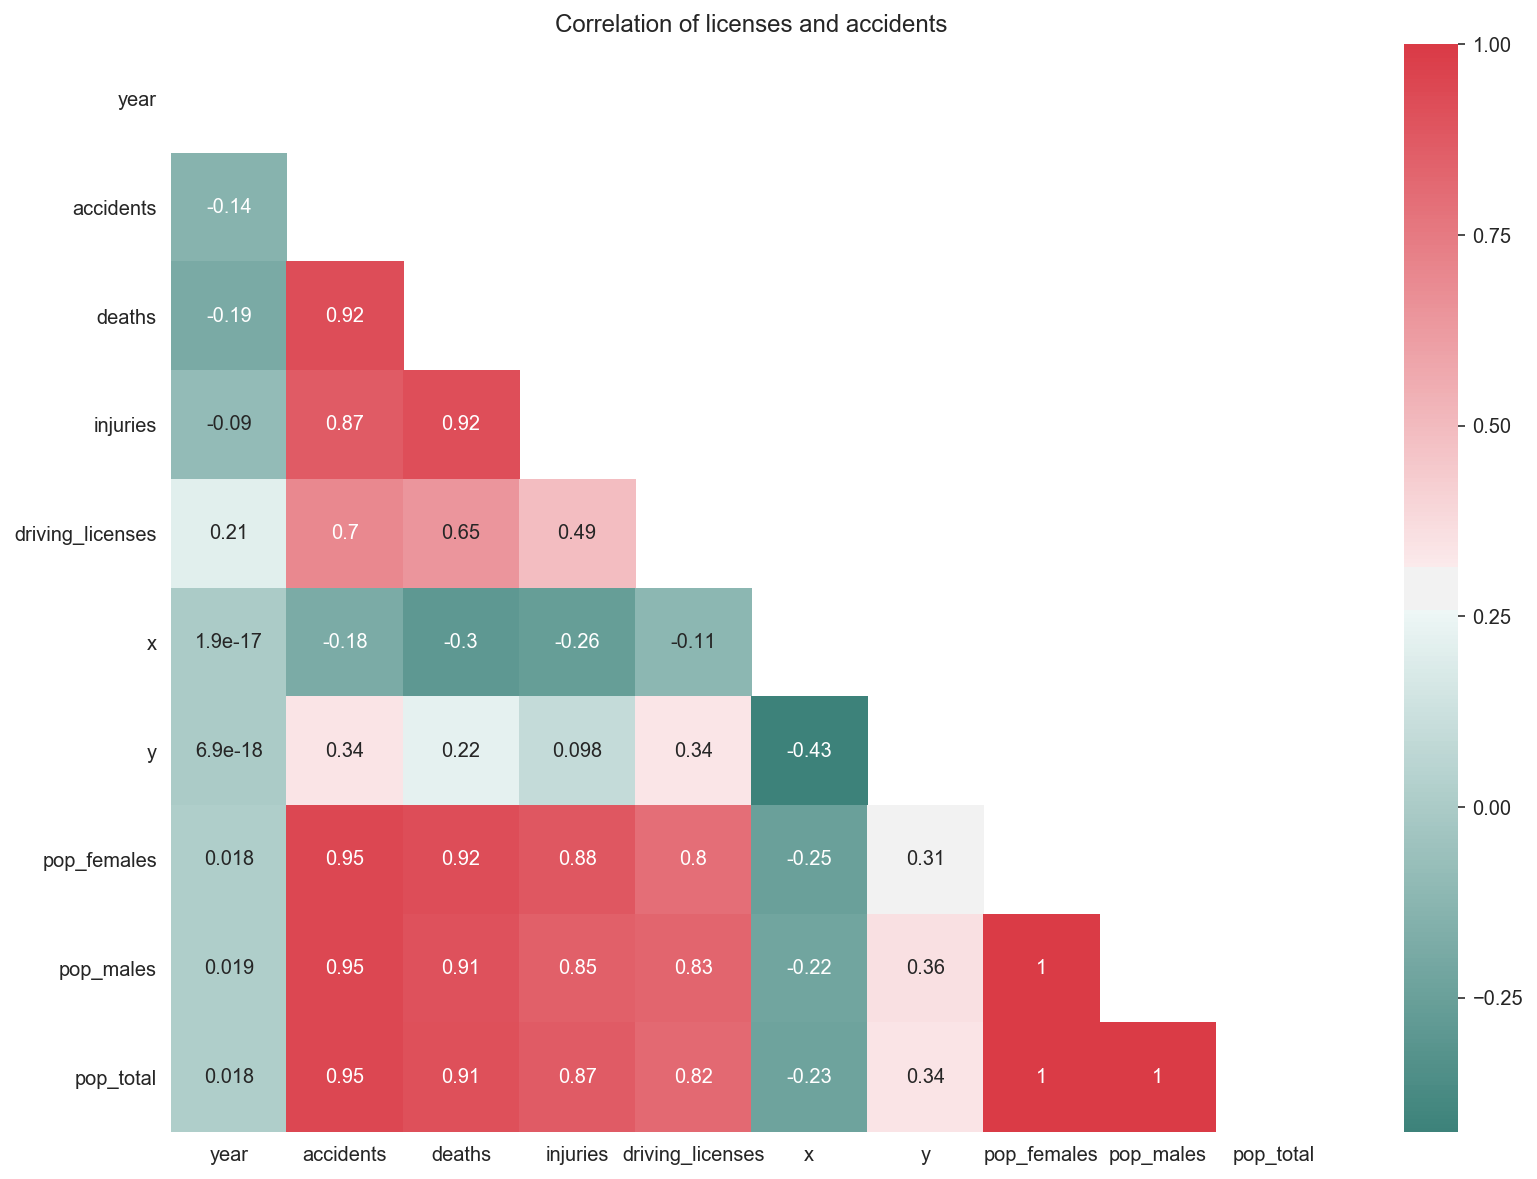

In [79]:
fig, axs = plt.subplots(figsize=(13,10)) 
mask = np.triu(np.ones_like(combined_df.corr(), dtype=np.bool))
sns.heatmap(combined_df.corr(), ax = axs, annot=True, mask=mask, cmap= sns.diverging_palette(180, 10, as_cmap=True))
plt.title('Correlation of licenses and accidents')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Description:
Generally, the correlation between the attributes in the dataframe is strong. We can observe that in between either accidents, deaths, and injuries columns. Also, the correlation is very strong between accidents and the population, as the population of the region increases, the accidents increases.

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [80]:
color_hist = 'teal'

In [288]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=2,nrows=nrows, figsize=(15, 10)) # You'll want to specify your figsize
    fig.suptitle(big_title_name, fontsize=20)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column].dropna(), bins=20, color= color_hist ) # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot    
    plt.show()        
       

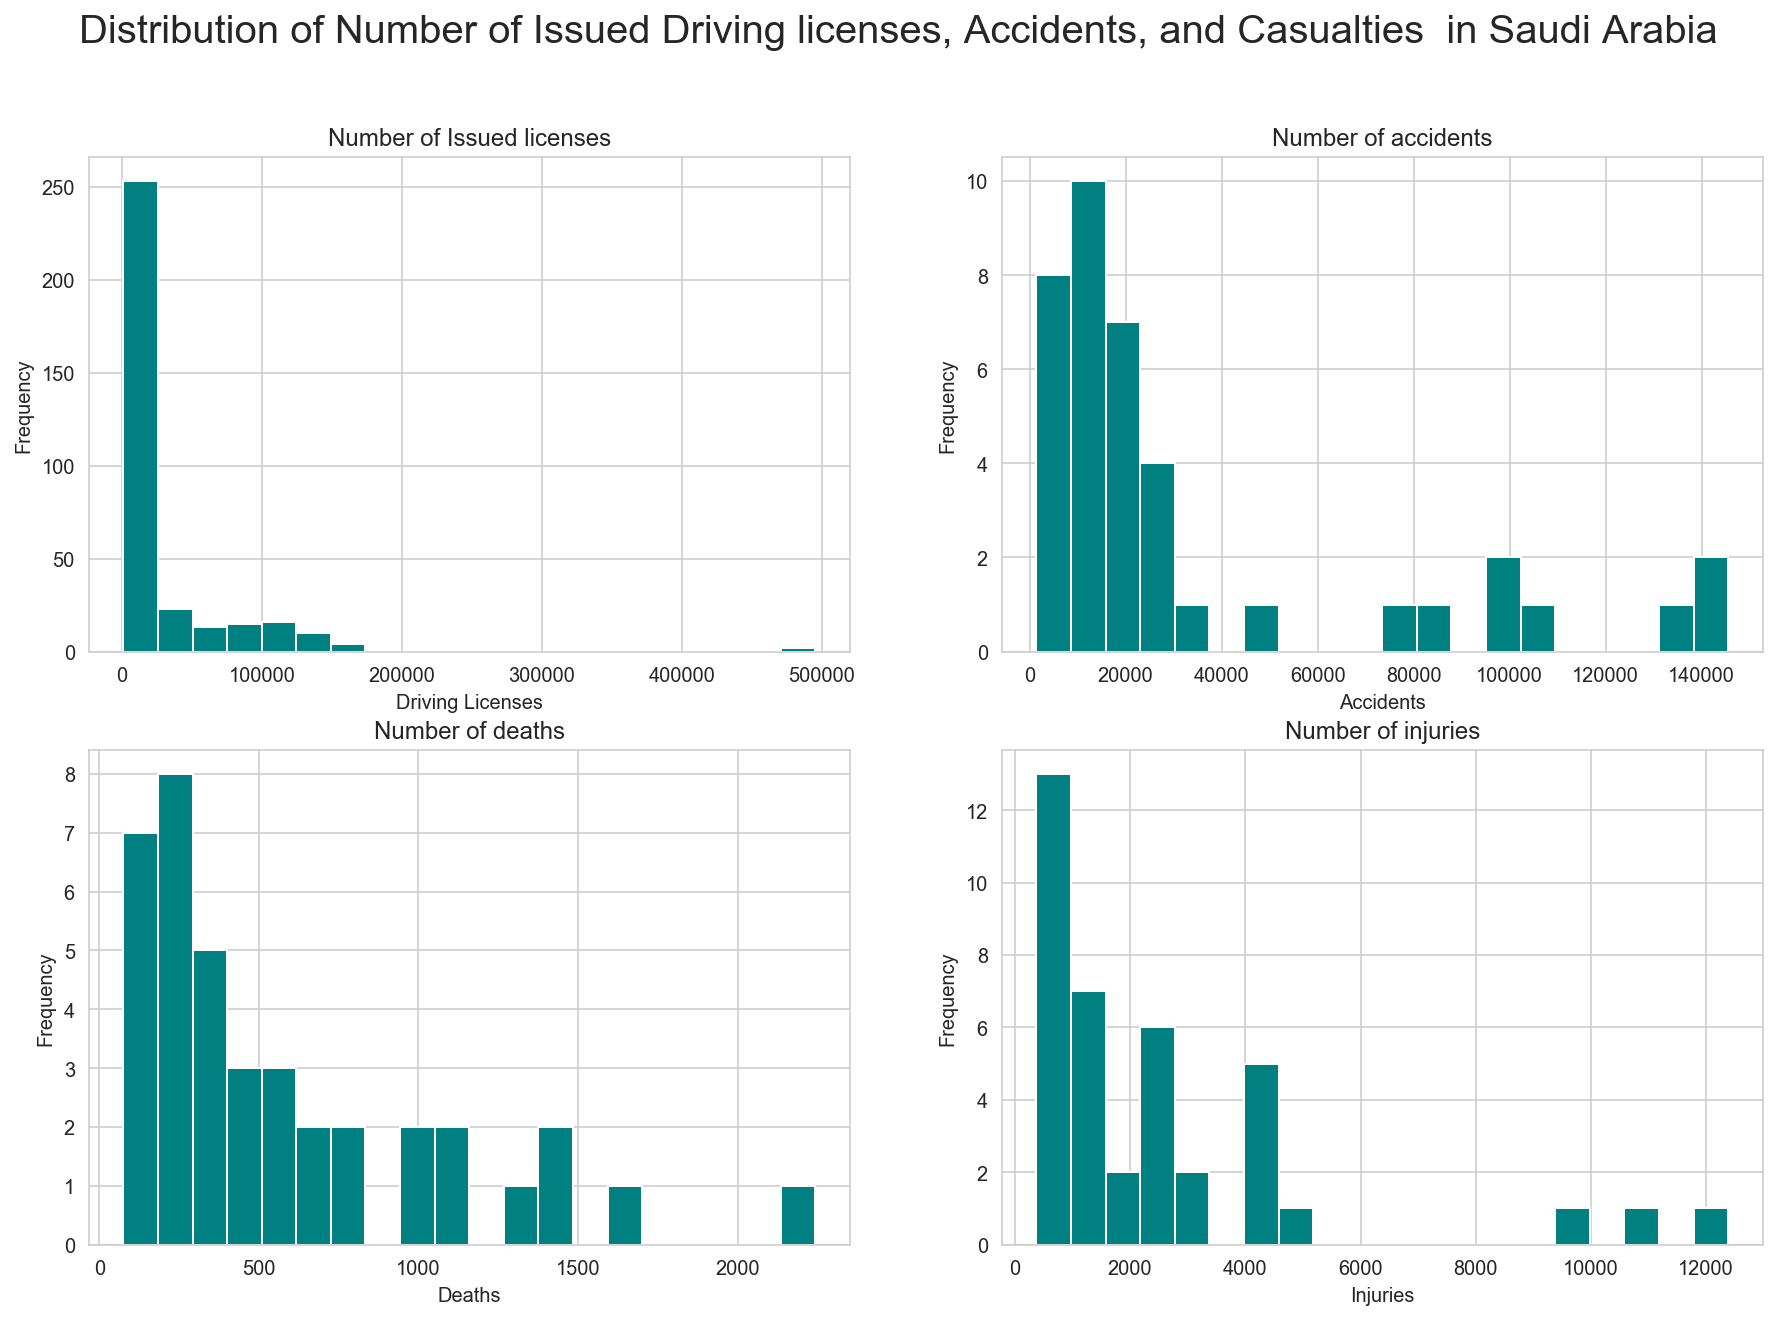

In [291]:
columns_name = ['driving_licenses', 'accidents', 'deaths','injuries']
list_of_xlabels= ['Driving Licenses', 'Accidents', 'Deaths','Injuries']
title_name = ['Number of Issued licenses', 'Number of accidents', 'Number of deaths', 'Number of injuries']
big_title_name ='Distribution of Number of Issued Driving licenses, Accidents, and Casualties  in Saudi Arabia'
subplot_histograms(combined_df, columns_name, title_name, list_of_xlabels, big_title_name);

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

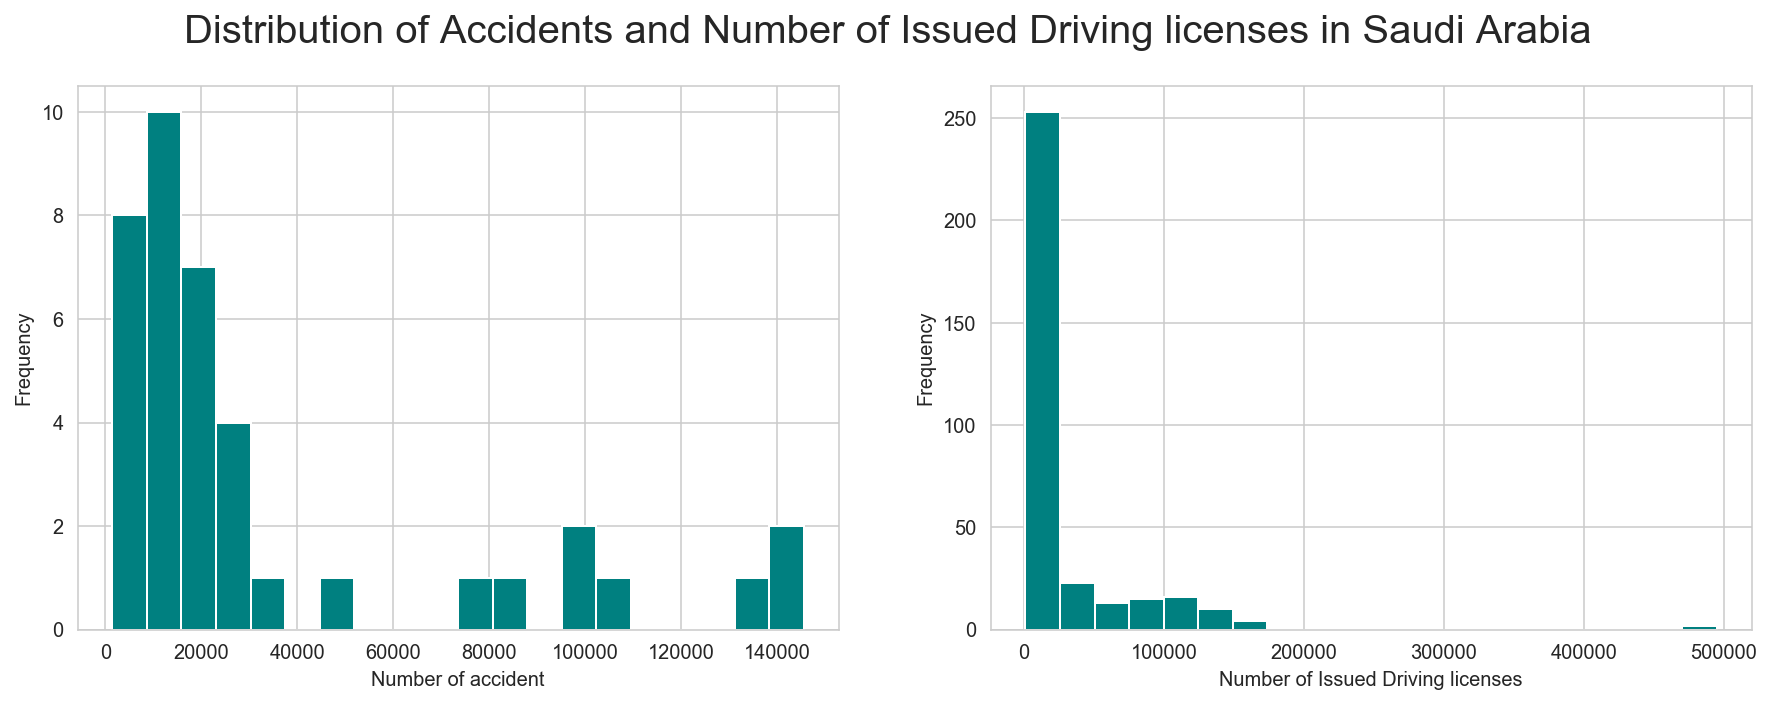

In [83]:
# Code


fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].hist(accident_df_pvt['accidents'], bins=20, color= color_hist)
ax[0].set_xlabel('Number of accident')
ax[0].set_ylabel('Frequency')
#ax[0].set_title('Number of accident')

ax[1].hist(license_df['driving_licenses'], bins=20, color= color_hist)
ax[1].set_xlabel('Number of Issued Driving licenses')
ax[1].set_ylabel('Frequency')
#ax[1].set_title('Number of Issued Driving licenses')

fig.suptitle('Distribution of Accidents and Number of Issued Driving licenses in Saudi Arabia', fontsize=20)
plt.show()

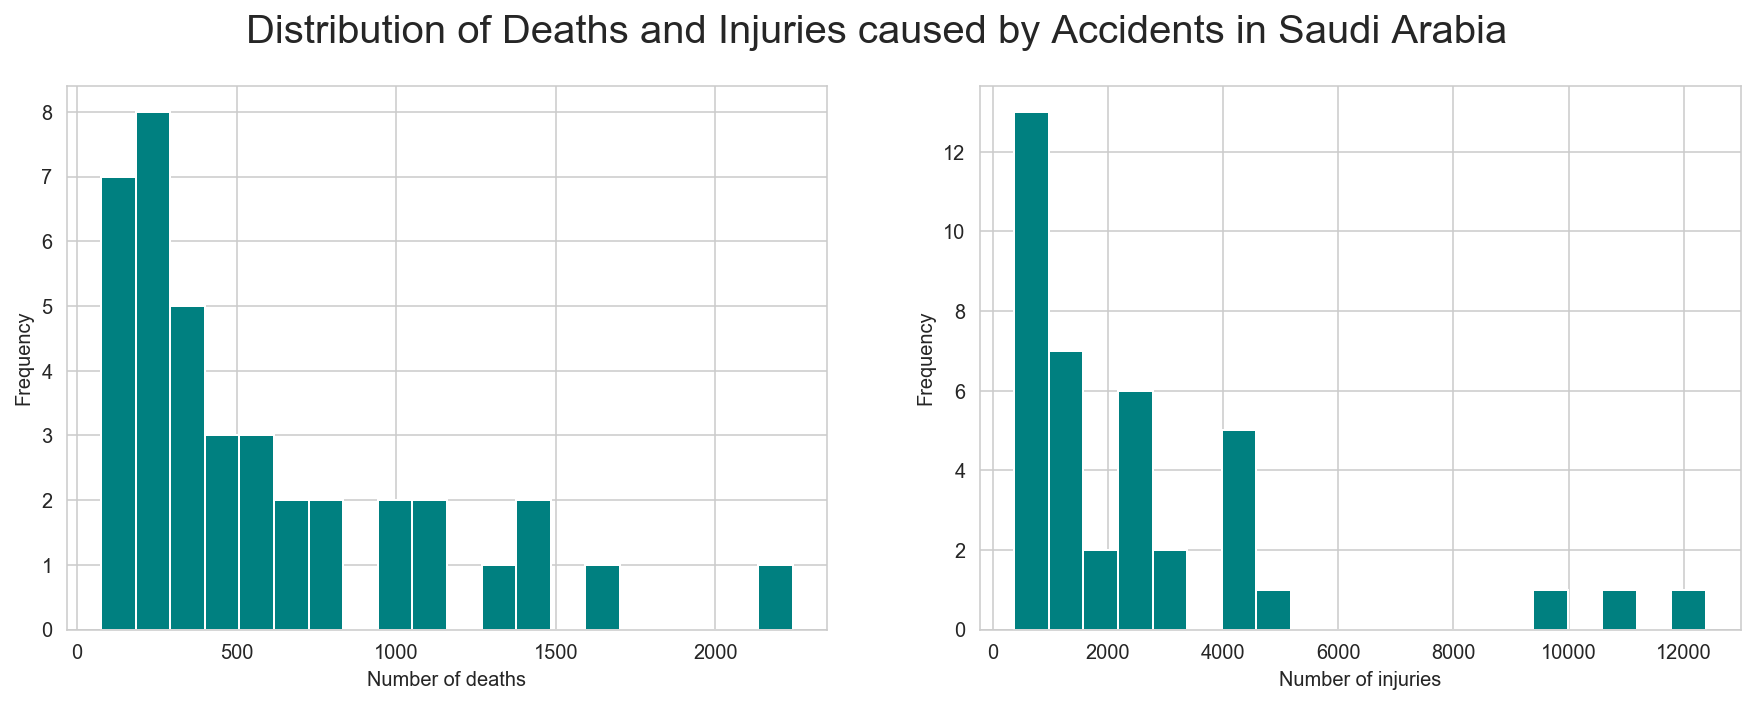

In [84]:
# Code : Please plot two additional histograms that will help with your understanding of the data

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].hist(accident_df_pvt['deaths'], bins=20, color= color_hist)
ax[0].set_xlabel('Number of deaths')
ax[0].set_ylabel('Frequency')
#ax[0].set_title('Number of accident')

ax[1].hist(accident_df_pvt['injuries'], bins=20, color= color_hist)
ax[1].set_xlabel('Number of injuries')
ax[1].set_ylabel('Frequency')
#ax[1].set_title('Number of Issued Driving licenses')

fig.suptitle('Distribution of Deaths and Injuries caused by Accidents in Saudi Arabia', fontsize=20)
plt.show()

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [328]:
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())

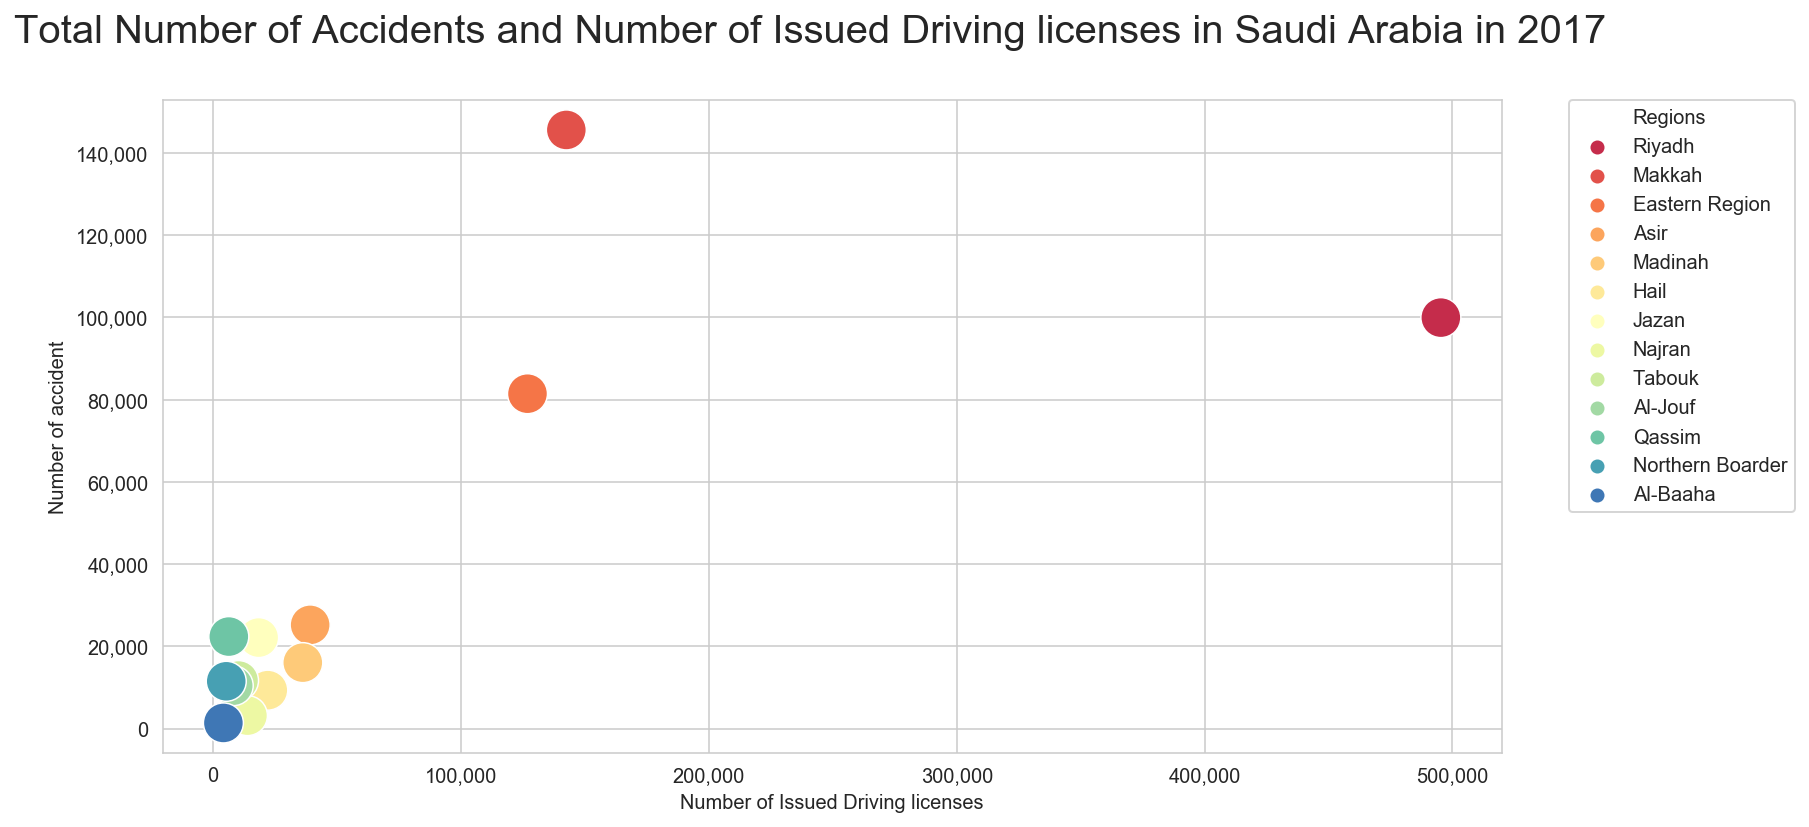

In [292]:
# Driving Licenses vs. Traffic Accidents for 2017
fig, ax = plt.subplots( figsize=(12, 6))
ax = sns.scatterplot(x ='driving_licenses', 
                     y ='accidents', 
                     data = combined_df[combined_df['year'] == 2017].sort_values("driving_licenses", ascending=False), 
                     hue='region', marker='o', s=400 , palette=color)

ax.set_ylabel('Number of accident')
ax.set_xlabel('Number of Issued Driving licenses')
fig.suptitle('Total Number of Accidents and Number of Issued Driving licenses in Saudi Arabia in 2017', fontsize=20)
# Put the legend out of the figure

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))




legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend.texts[0].set_text("Regions")

plt.show()

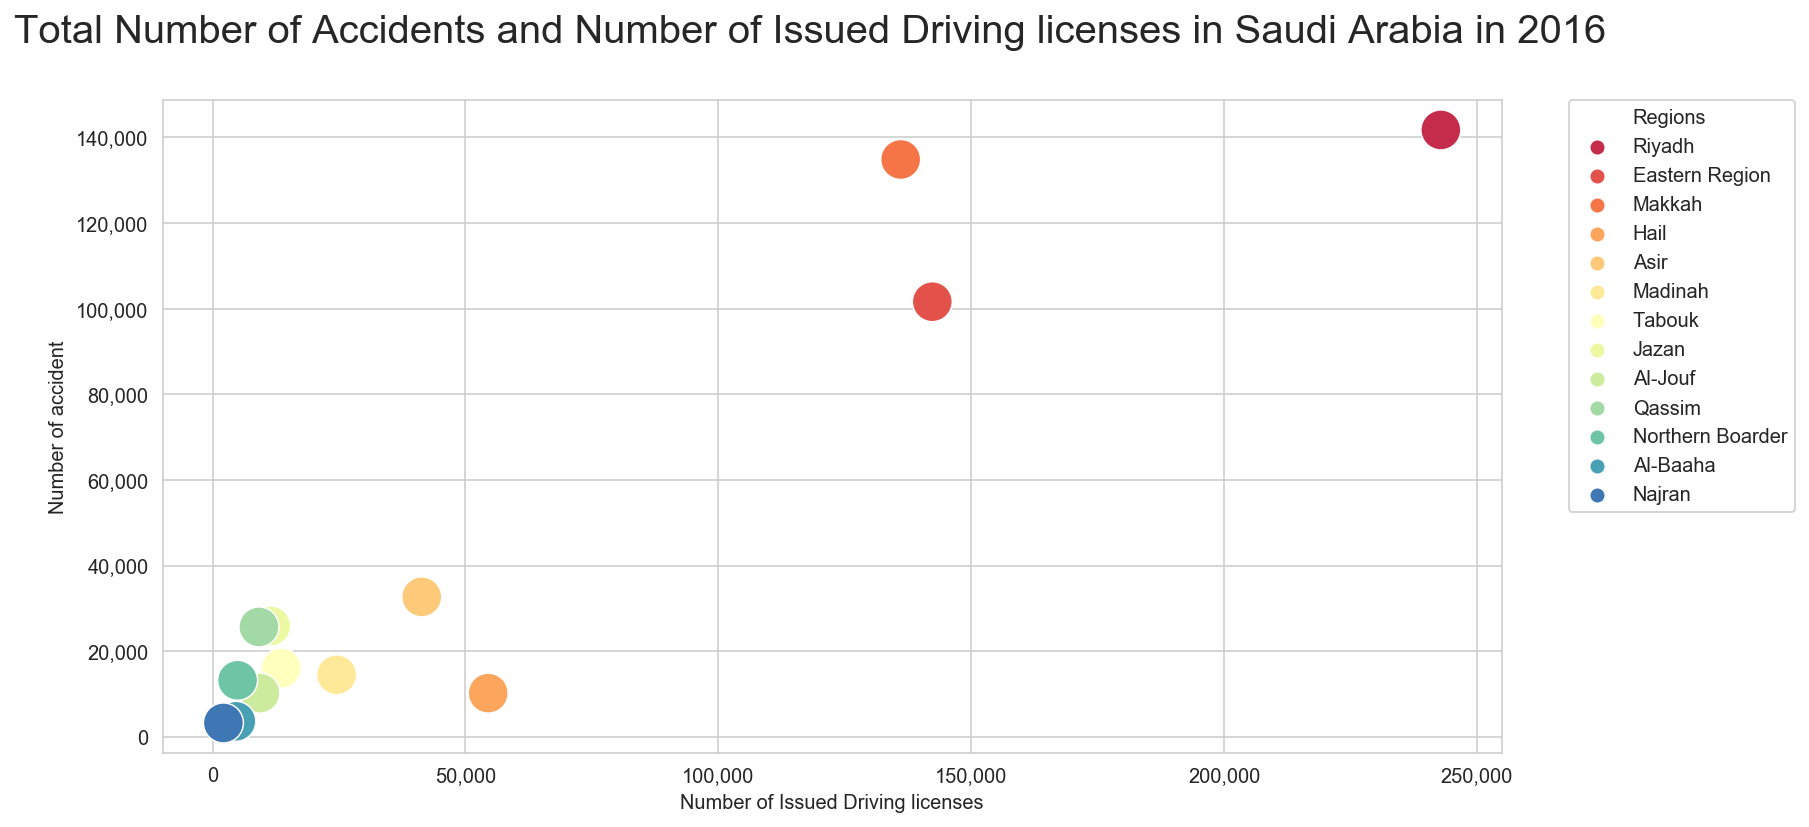

In [293]:
# Driving Licenses vs. Traffic Accidents for 2016
fig, ax = plt.subplots( figsize=(12, 6))
ax = sns.scatterplot(x ='driving_licenses', 
                     y ='accidents', 
                     data = combined_df[combined_df['year'] == 2016].sort_values("driving_licenses", ascending=False), 
                     hue='region', marker='o', s=400 , palette=color)

ax.set_ylabel('Number of accident')
ax.set_xlabel('Number of Issued Driving licenses')
fig.suptitle('Total Number of Accidents and Number of Issued Driving licenses in Saudi Arabia in 2016', fontsize=20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Put the legend out of the figure
legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend.texts[0].set_text("Regions")
plt.show()

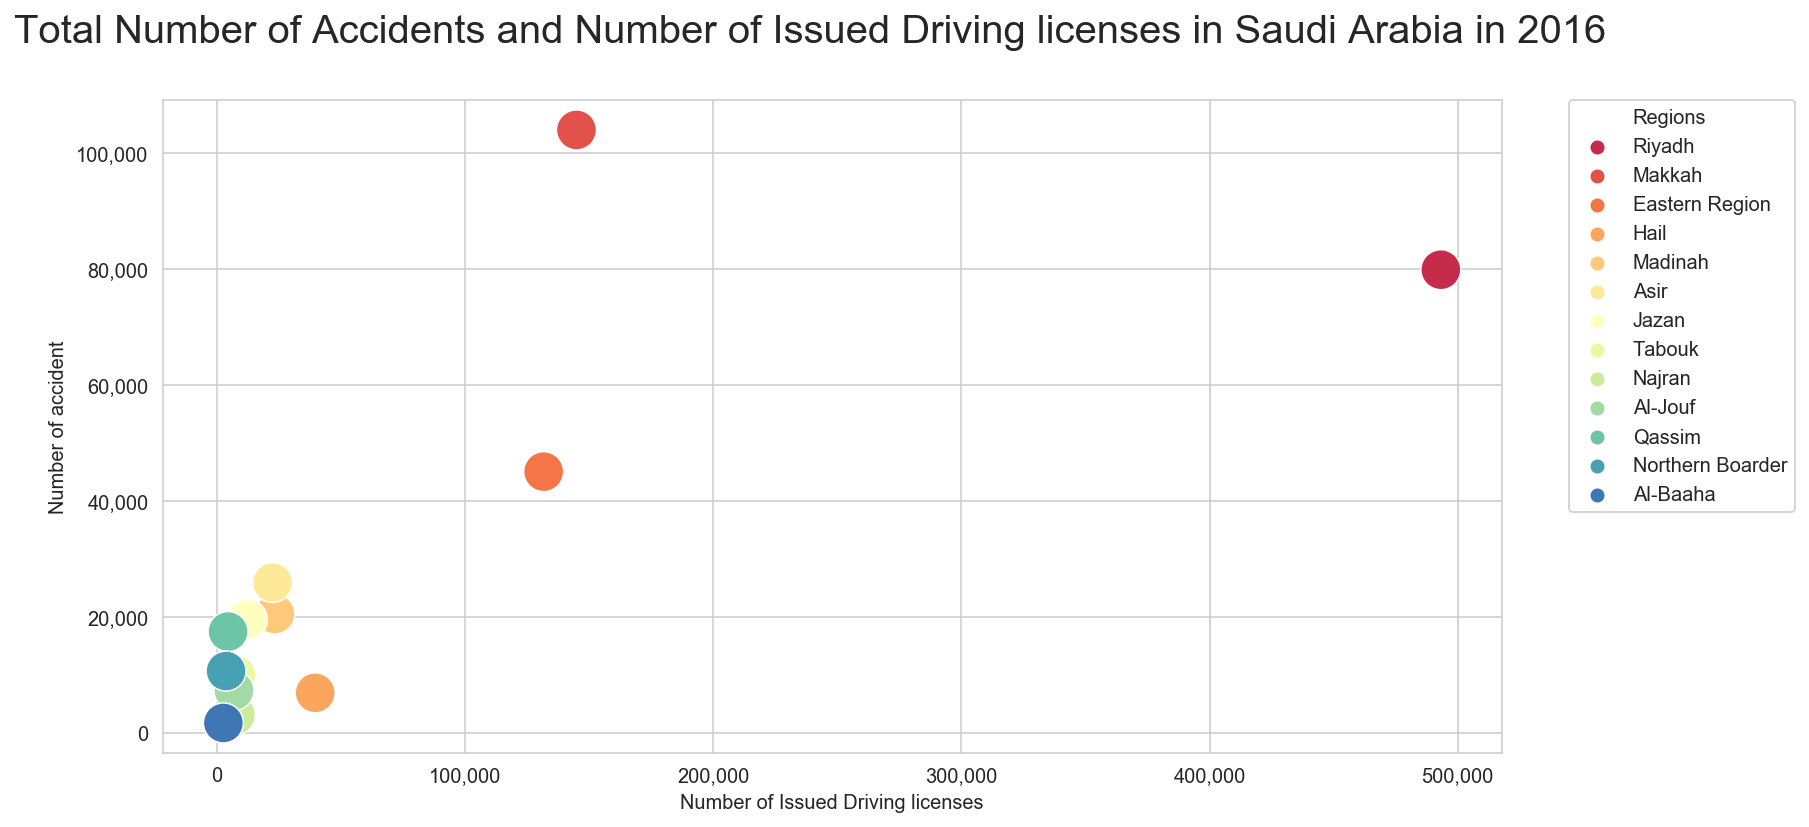

In [294]:
# Driving Licenses vs. Traffic Accidents for 2018
fig, ax = plt.subplots( figsize=(12, 6))
ax = sns.scatterplot(x ='driving_licenses', 
                     y ='accidents', 
                     data = combined_df[combined_df['year'] == 2018].sort_values("driving_licenses", ascending=False), 
                     hue='region', marker='o', s=400 , palette=color)

ax.set_ylabel('Number of accident')
ax.set_xlabel('Number of Issued Driving licenses')
fig.suptitle('Total Number of Accidents and Number of Issued Driving licenses in Saudi Arabia in 2016', fontsize=20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Put the legend out of the figure
legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend.texts[0].set_text("Regions")

plt.show()

In [89]:
#Driving Licenses for 2016 vs 2017
# creating a pivot table to easly plot data points from 2016 and 2017 together
lic_pivot_combined_df = pd.pivot_table(combined_df, values=['driving_licenses'], index=['region'], columns=['year'])
lic_pivot_combined_df.columns = lic_pivot_combined_df.columns.get_level_values(1)
lic_pivot_combined_df.columns = lic_pivot_combined_df.columns.astype(str)

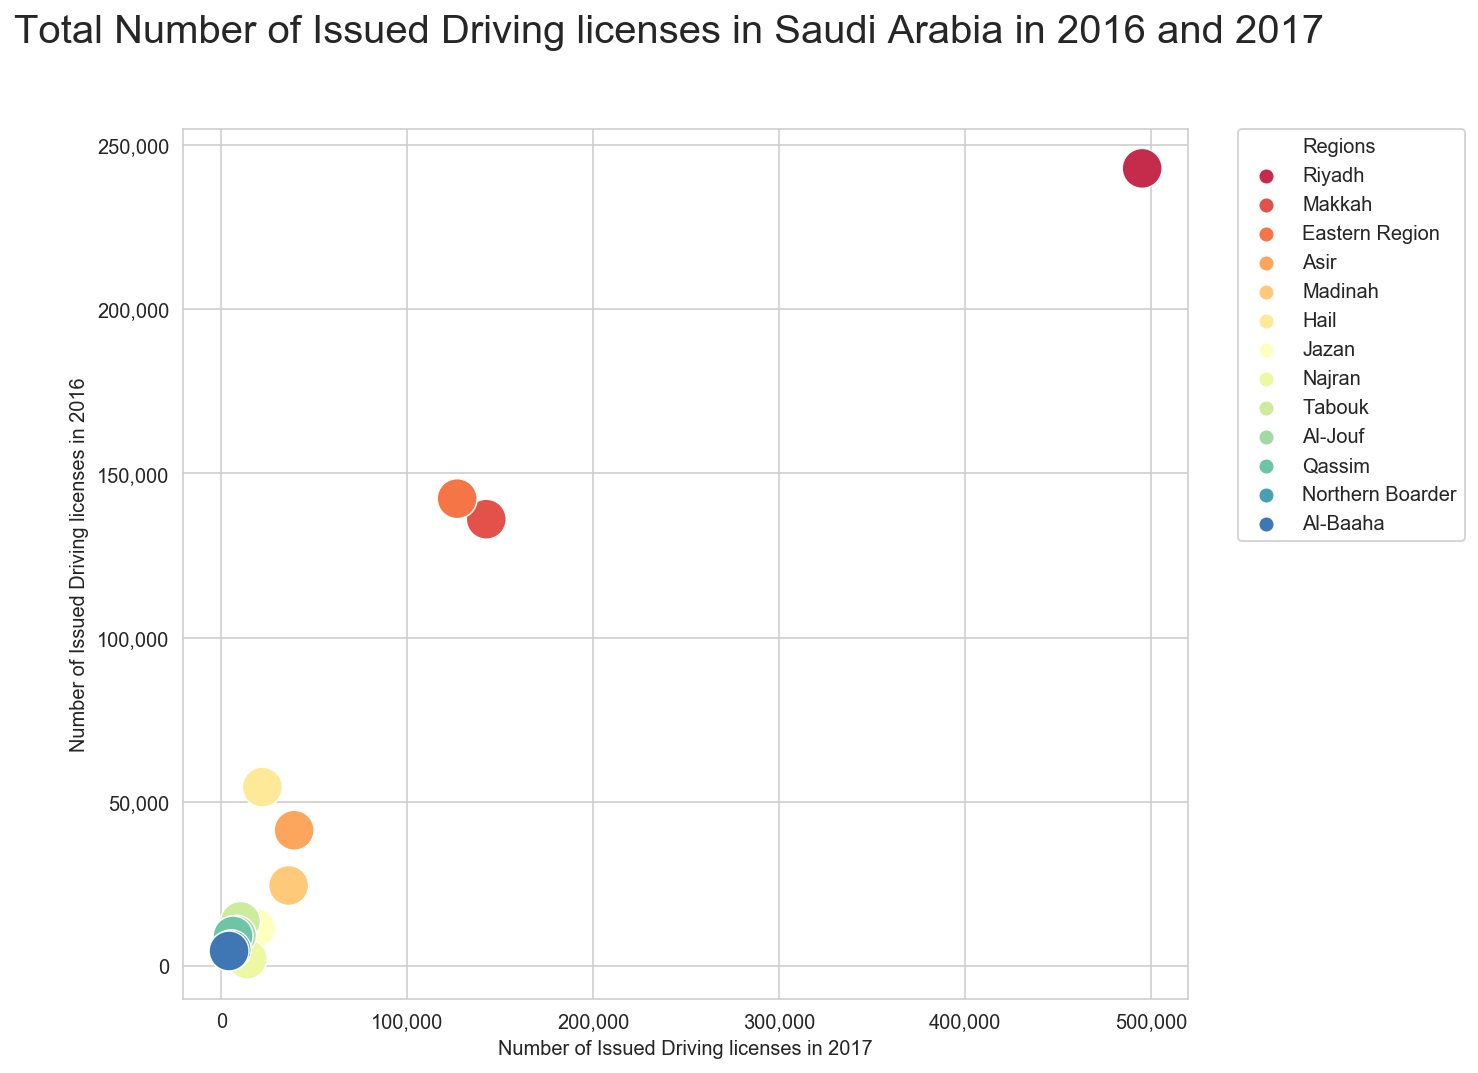

In [295]:
fig, ax = plt.subplots( figsize=(9, 8))
ax = sns.scatterplot(x = '2017', 
                     y = '2016', 
                     data = lic_pivot_combined_df.sort_values('2017', ascending=False), 
                     hue=lic_pivot_combined_df.sort_values('2017', ascending=False).index, 
                     marker='o', s=400, palette = color)

ax.set_ylabel('Number of Issued Driving licenses in 2016')
ax.set_xlabel('Number of Issued Driving licenses in 2017')
fig.suptitle('Total Number of Issued Driving licenses in Saudi Arabia in 2016 and 2017', fontsize=20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Put the legend out of the figure
legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend.texts[0].set_text("Regions")

plt.show()

In [91]:
#Traffic Accidents for 2016 vs 2017

tra_pivot_combined_df = pd.pivot_table(combined_df, values=['accidents'], index=['region'], columns=['year'])
tra_pivot_combined_df.columns = tra_pivot_combined_df.columns.get_level_values(1)
tra_pivot_combined_df.columns = tra_pivot_combined_df.columns.astype(str)

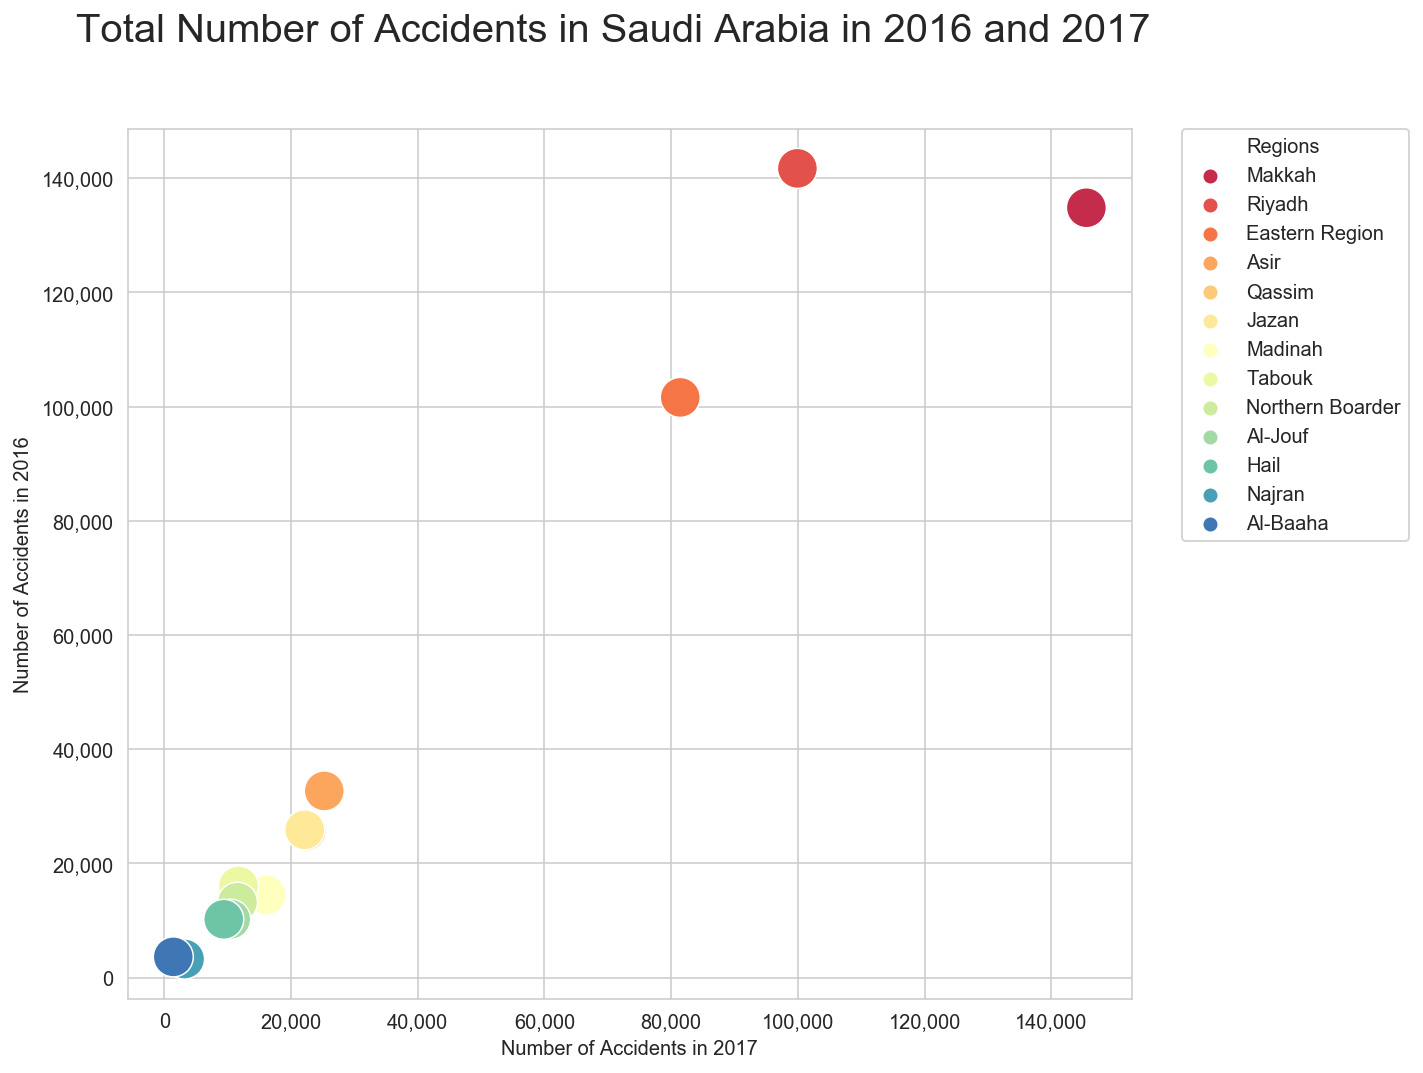

In [296]:
fig, ax = plt.subplots( figsize=(9, 8))
ax = sns.scatterplot(x = '2017', 
                     y = '2016', 
                     data = tra_pivot_combined_df.sort_values('2017', ascending=False), 
                     hue=tra_pivot_combined_df.sort_values('2017', ascending=False).index, 
                     marker='o', s=400, palette=color)

ax.set_ylabel('Number of Accidents in 2016')
ax.set_xlabel('Number of Accidents in 2017')
fig.suptitle('Total Number of Accidents in Saudi Arabia in 2016 and 2017', fontsize=20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Put the legend out of the figure
legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend.texts[0].set_text("Regions")

plt.show()

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [156]:
# a function that takes a dataframe and transforms it into a standard form after dropping nun_numirical columns
def to_standard (df):
    
    num_df= df[df.select_dtypes(include=np.number).columns.tolist()]
    
    ss = StandardScaler()
    std= ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index=num_df.index, columns=num_df.columns)
    return std_df

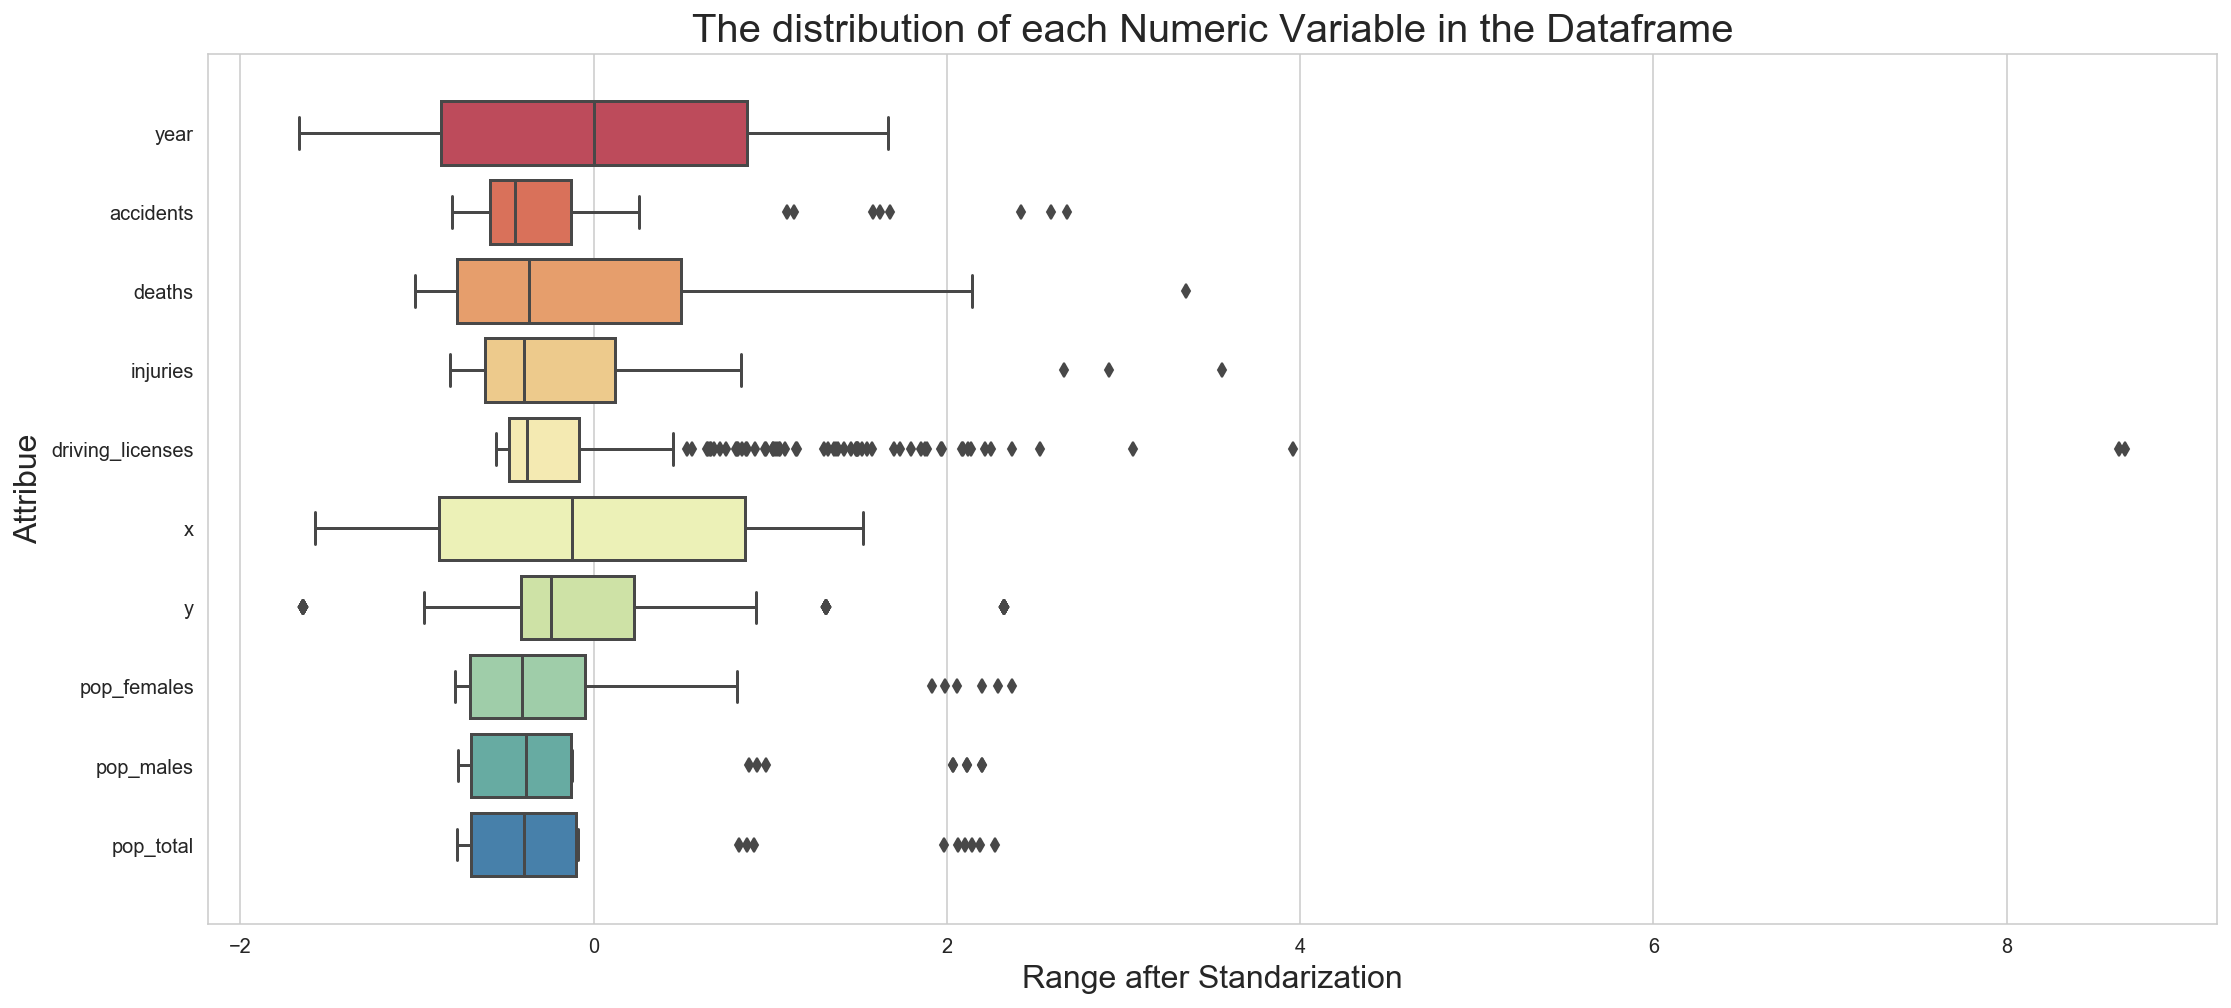

In [329]:
ax, fig = plt.subplots(1, 1, figsize=(18, 8))
plt.title('The distribution of each Numeric Variable in the Dataframe', fontsize=20) #Change please

sns.boxplot(y="variable", x="value", data=pd.melt(to_standard(combined_df)), palette=color)
plt.xlabel('Range after Standarization', size=16)
plt.ylabel('Attribue', size=16)


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

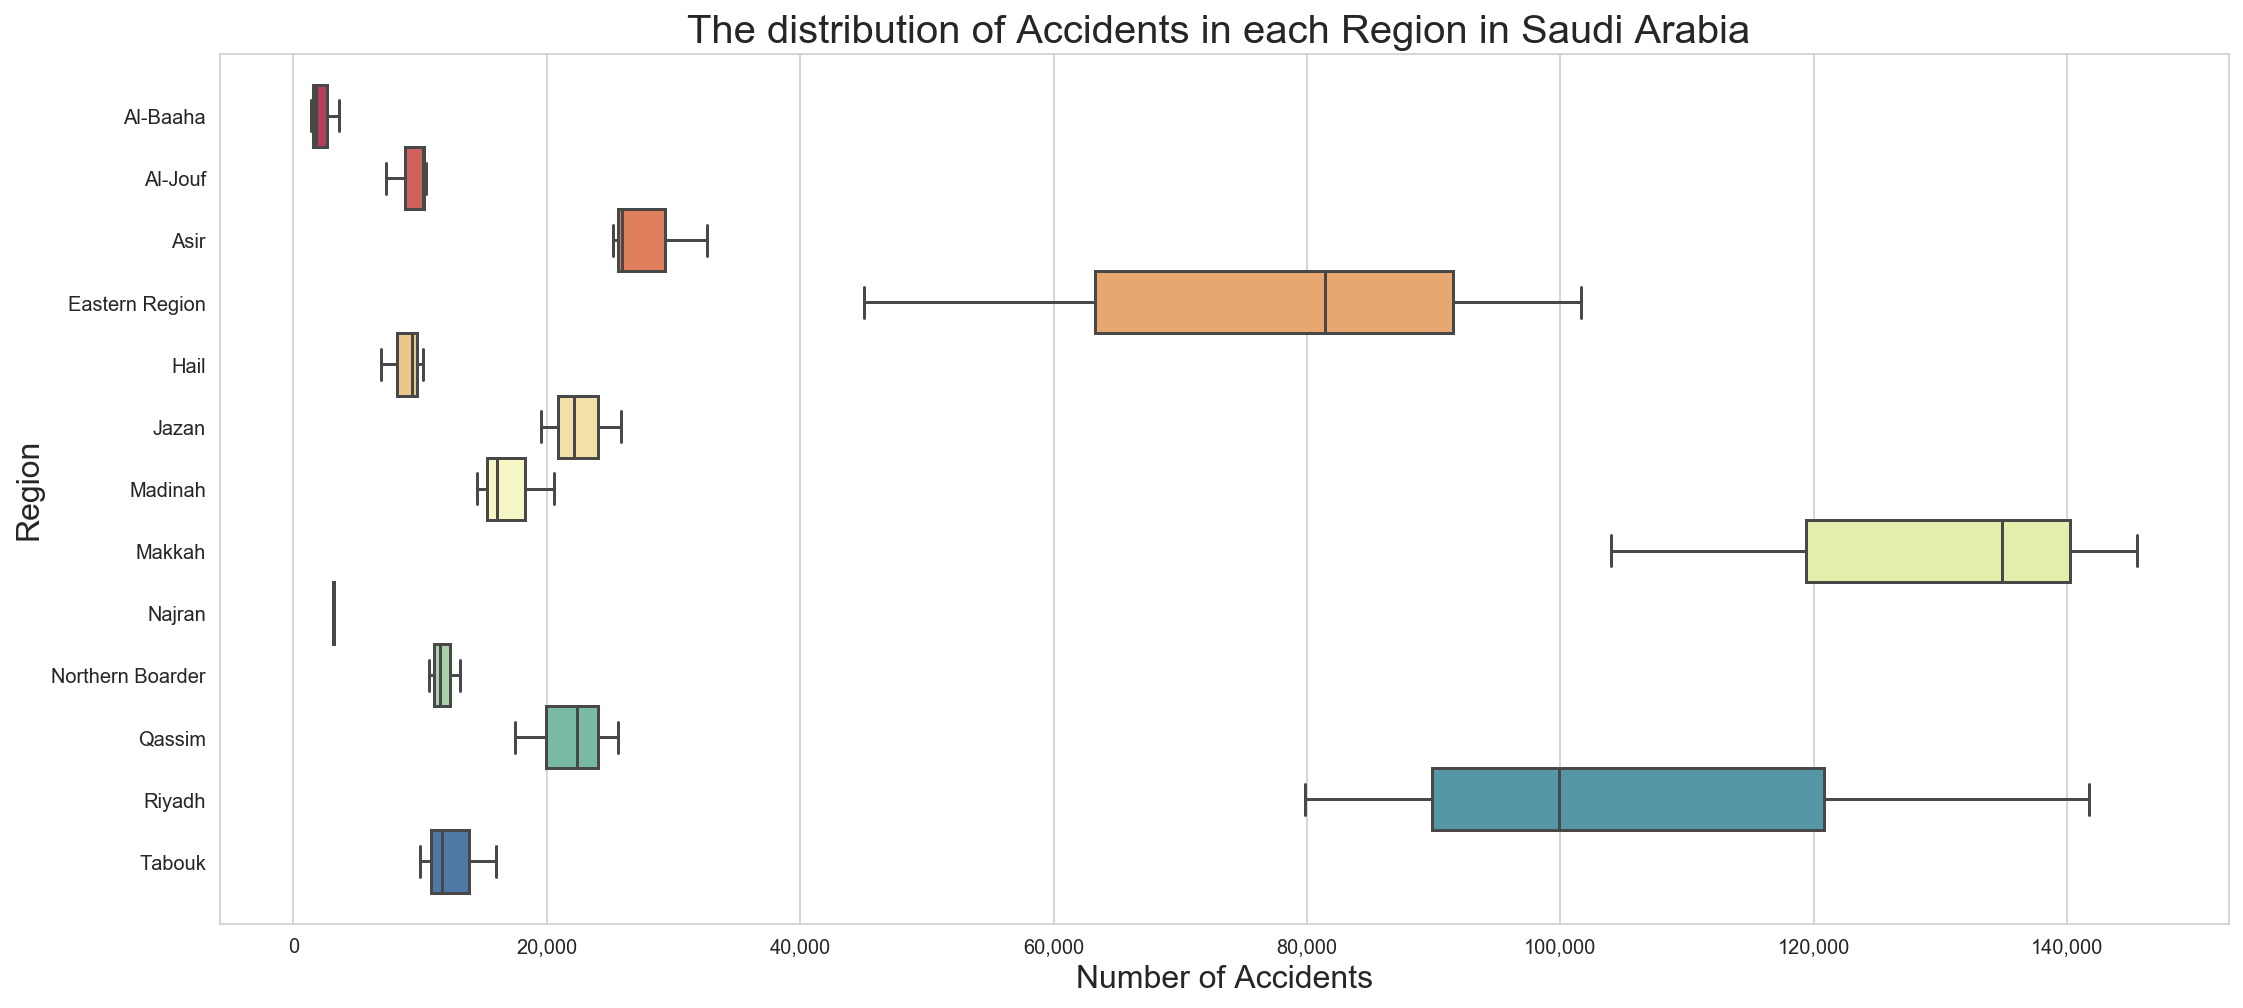

In [299]:
# 
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
plt.title('The distribution of Accidents in each Region in Saudi Arabia ', fontsize=20)
sns.boxplot(y= combined_df['region'], x= combined_df['accidents'], width=1, palette=color)
plt.xlabel('Number of Accidents', size=16)
plt.ylabel('Region', size=16)


ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

(3.0, -1.0)

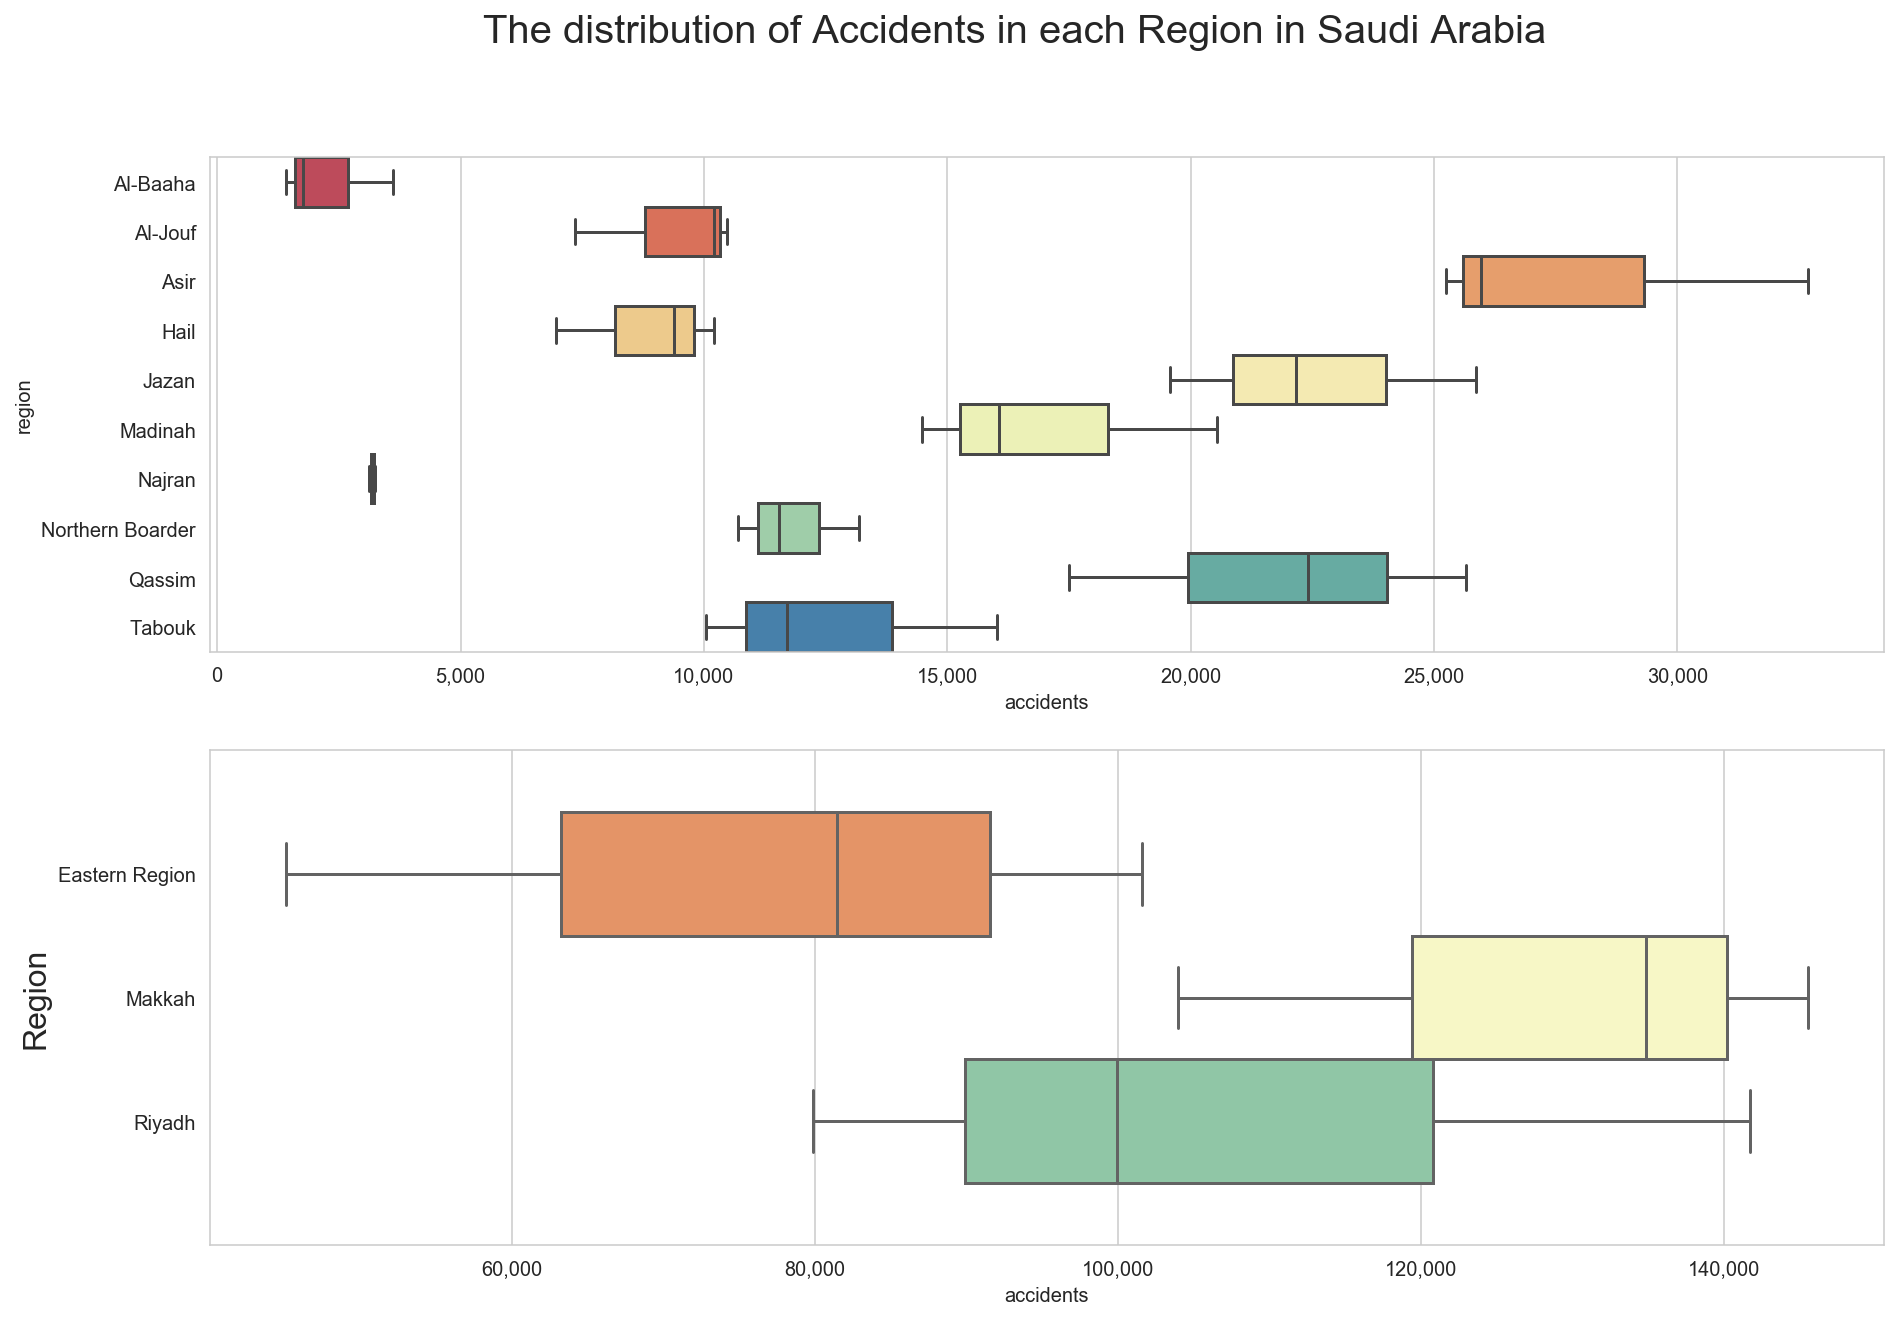

In [302]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 10))
plt.suptitle('The Distribution of Accidents in each Region in Saudi Arabia ', fontsize=20)
sns.boxplot(y= 'region', x= 'accidents', 
            data = combined_df[~combined_df['region'].isin(['Makkah', 'Riyadh', 'Eastern Region'])], 
            width=1, palette=color, ax=ax[0])
#plt.xlabel('Number of Accidents', size=16)
plt.ylabel('Region', size=16)

sns.boxplot(y= 'region', x= 'accidents', 
            data = combined_df[combined_df['region'].isin(['Makkah', 'Riyadh', 'Eastern Region'])], 
            width=1, palette=color, ax=ax[1])

ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))



#plt.xlabel('Number of Accidents', size=16)
plt.ylabel('Region', size=16)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

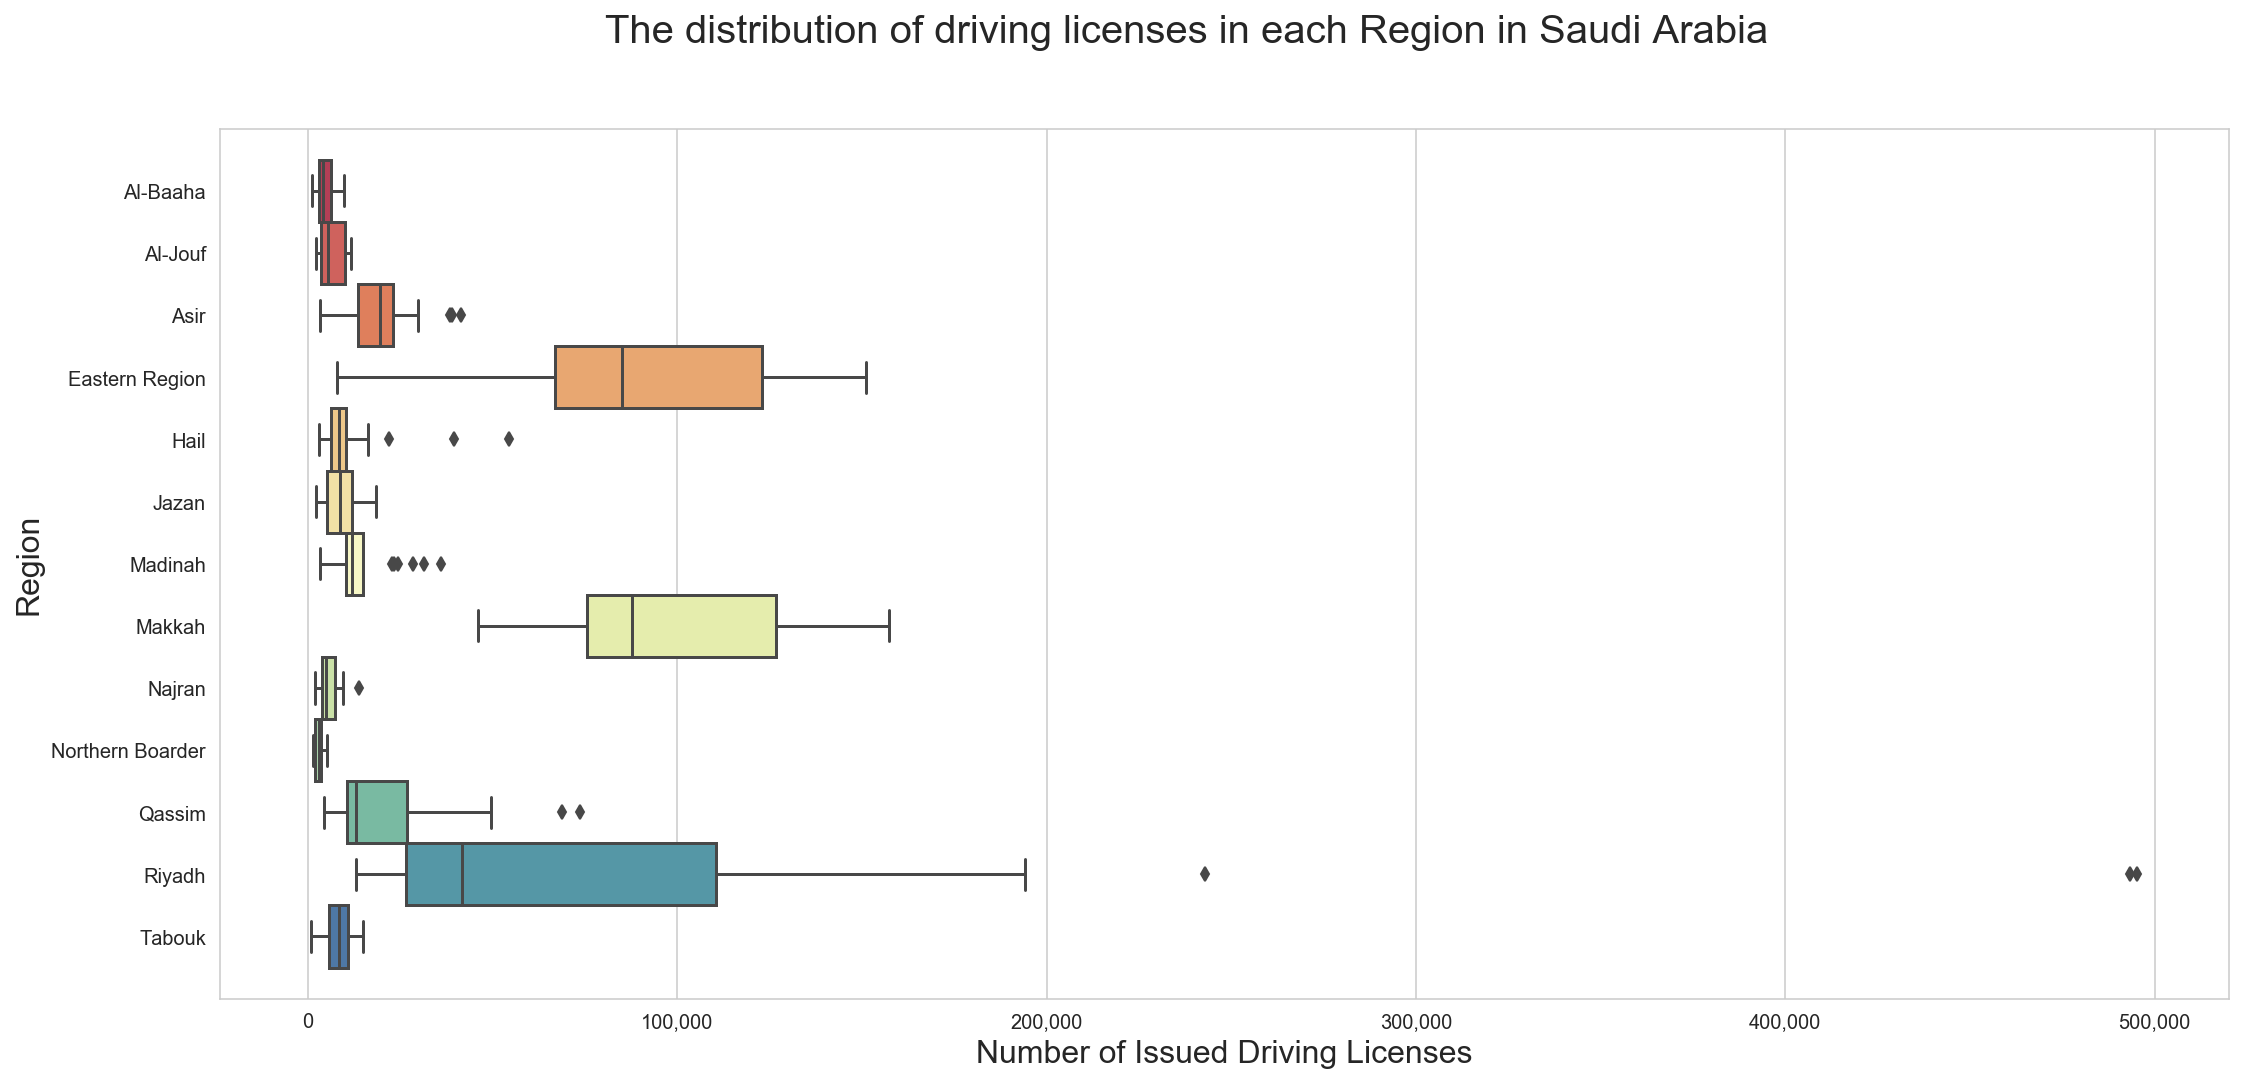

In [304]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

plt.suptitle('The Distribution of Driving Licenses in each Region in Saudi Arabia ', fontsize=20)

sns.boxplot(y= combined_df['region'], x= combined_df['driving_licenses'], width=1, palette=color)
plt.xlabel('Number of Issued Driving Licenses', size=16)
plt.ylabel('Region', size=16)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

(3.0, -1.0)

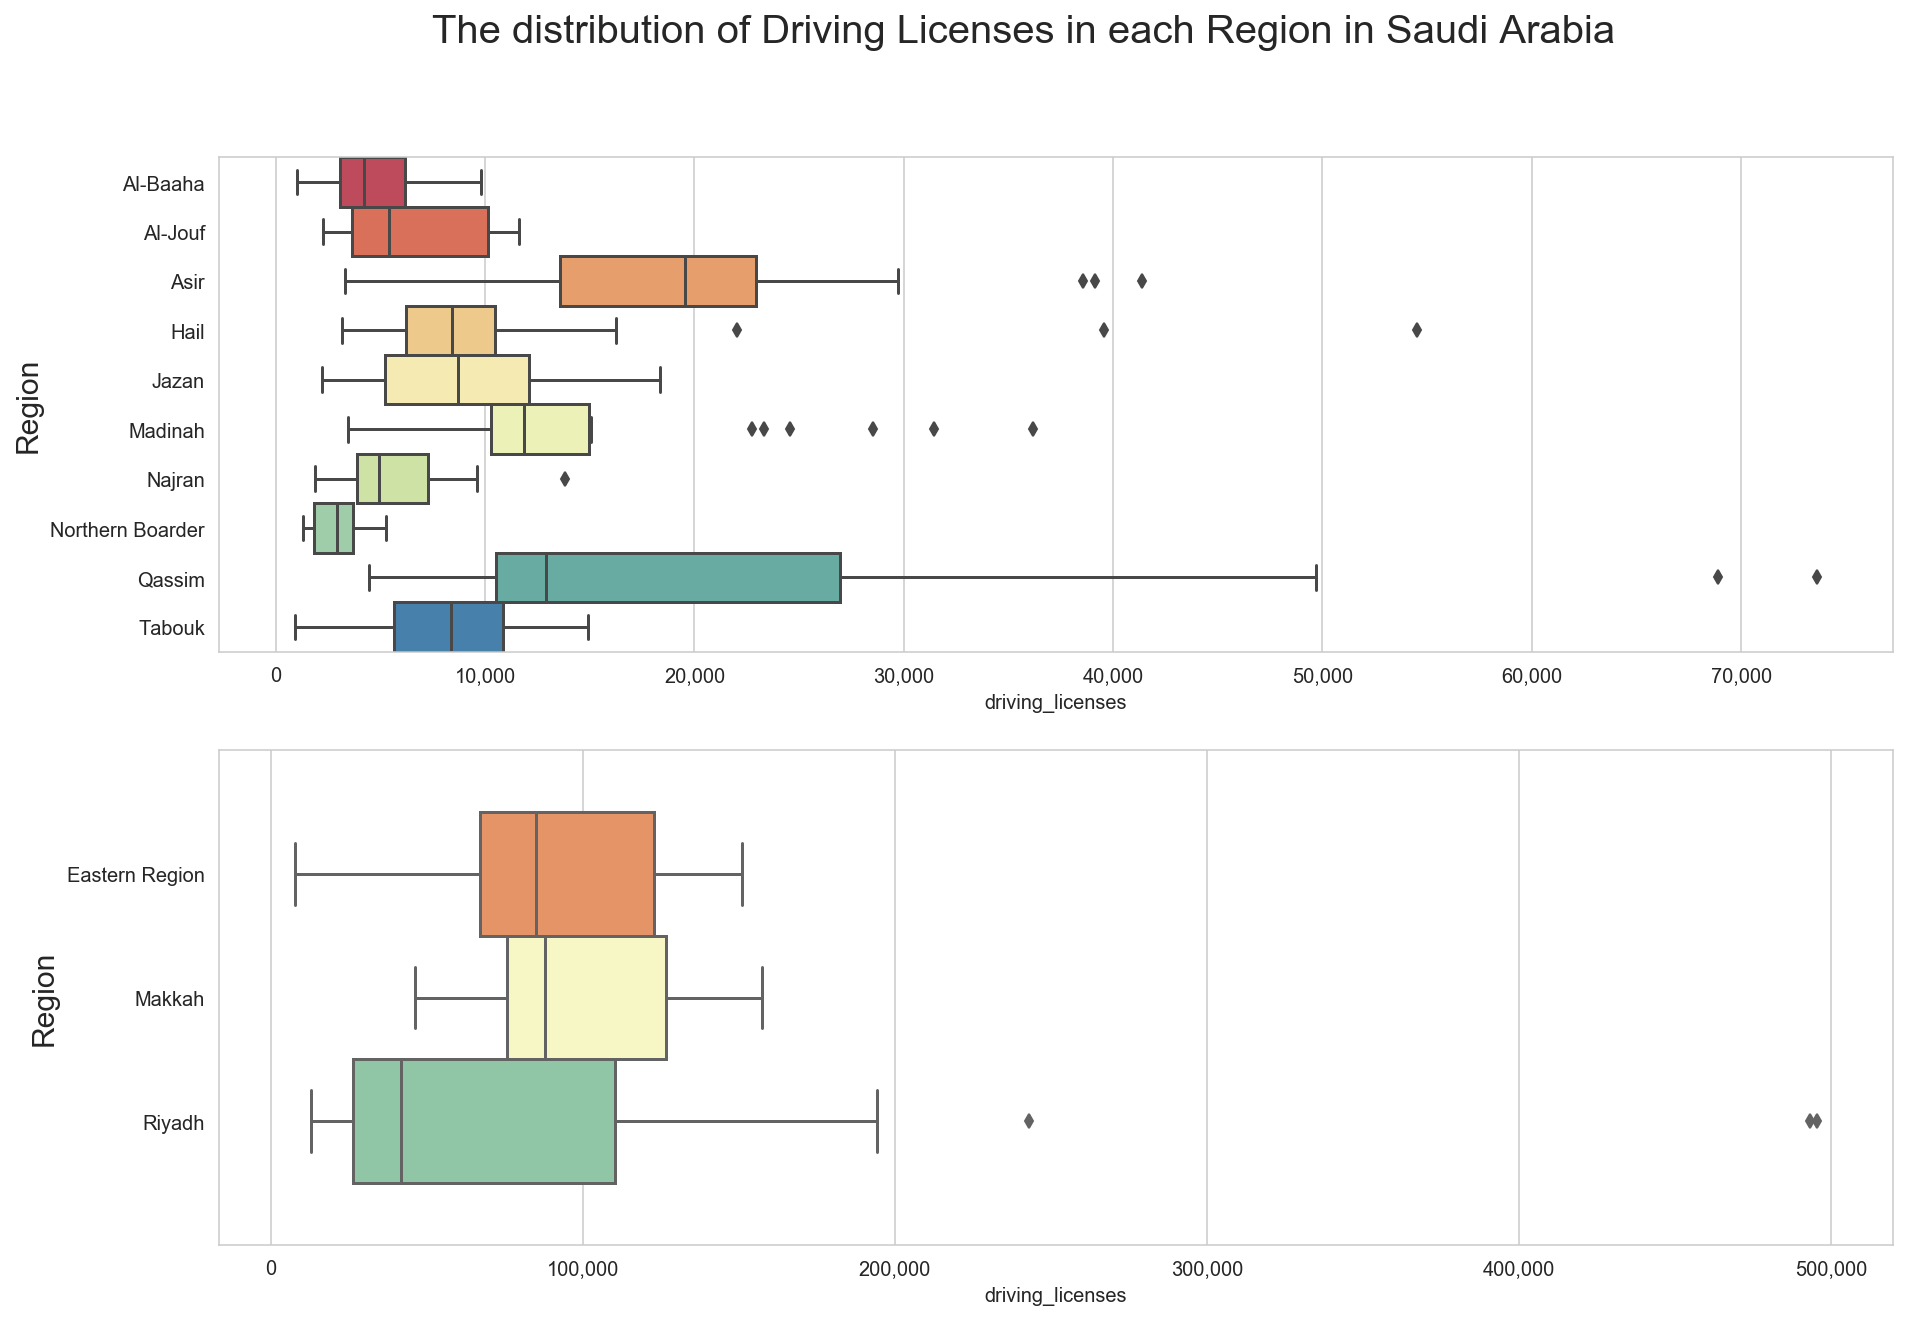

In [311]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 10))

plt.suptitle('The distribution of Driving Licenses in each Region in Saudi Arabia ', fontsize=20)

ax1=sns.boxplot(y= 'region', x= 'driving_licenses', 
            data = combined_df[~combined_df['region'].isin(['Makkah', 'Riyadh', 'Eastern Region'])], 
            width=1, palette=color, ax=ax[0])

ax2=sns.boxplot(y= 'region', x= 'driving_licenses', 
            data = combined_df[combined_df['region'].isin(['Makkah', 'Riyadh', 'Eastern Region'])], 
            width=1, palette=color, ax=ax[1])

ax1.set_ylabel("Region", fontsize = 15)
ax2.set_ylabel("Region", fontsize = 15)


ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))



# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### Visualizing the population of Saudi Arabia first before analysing the trends

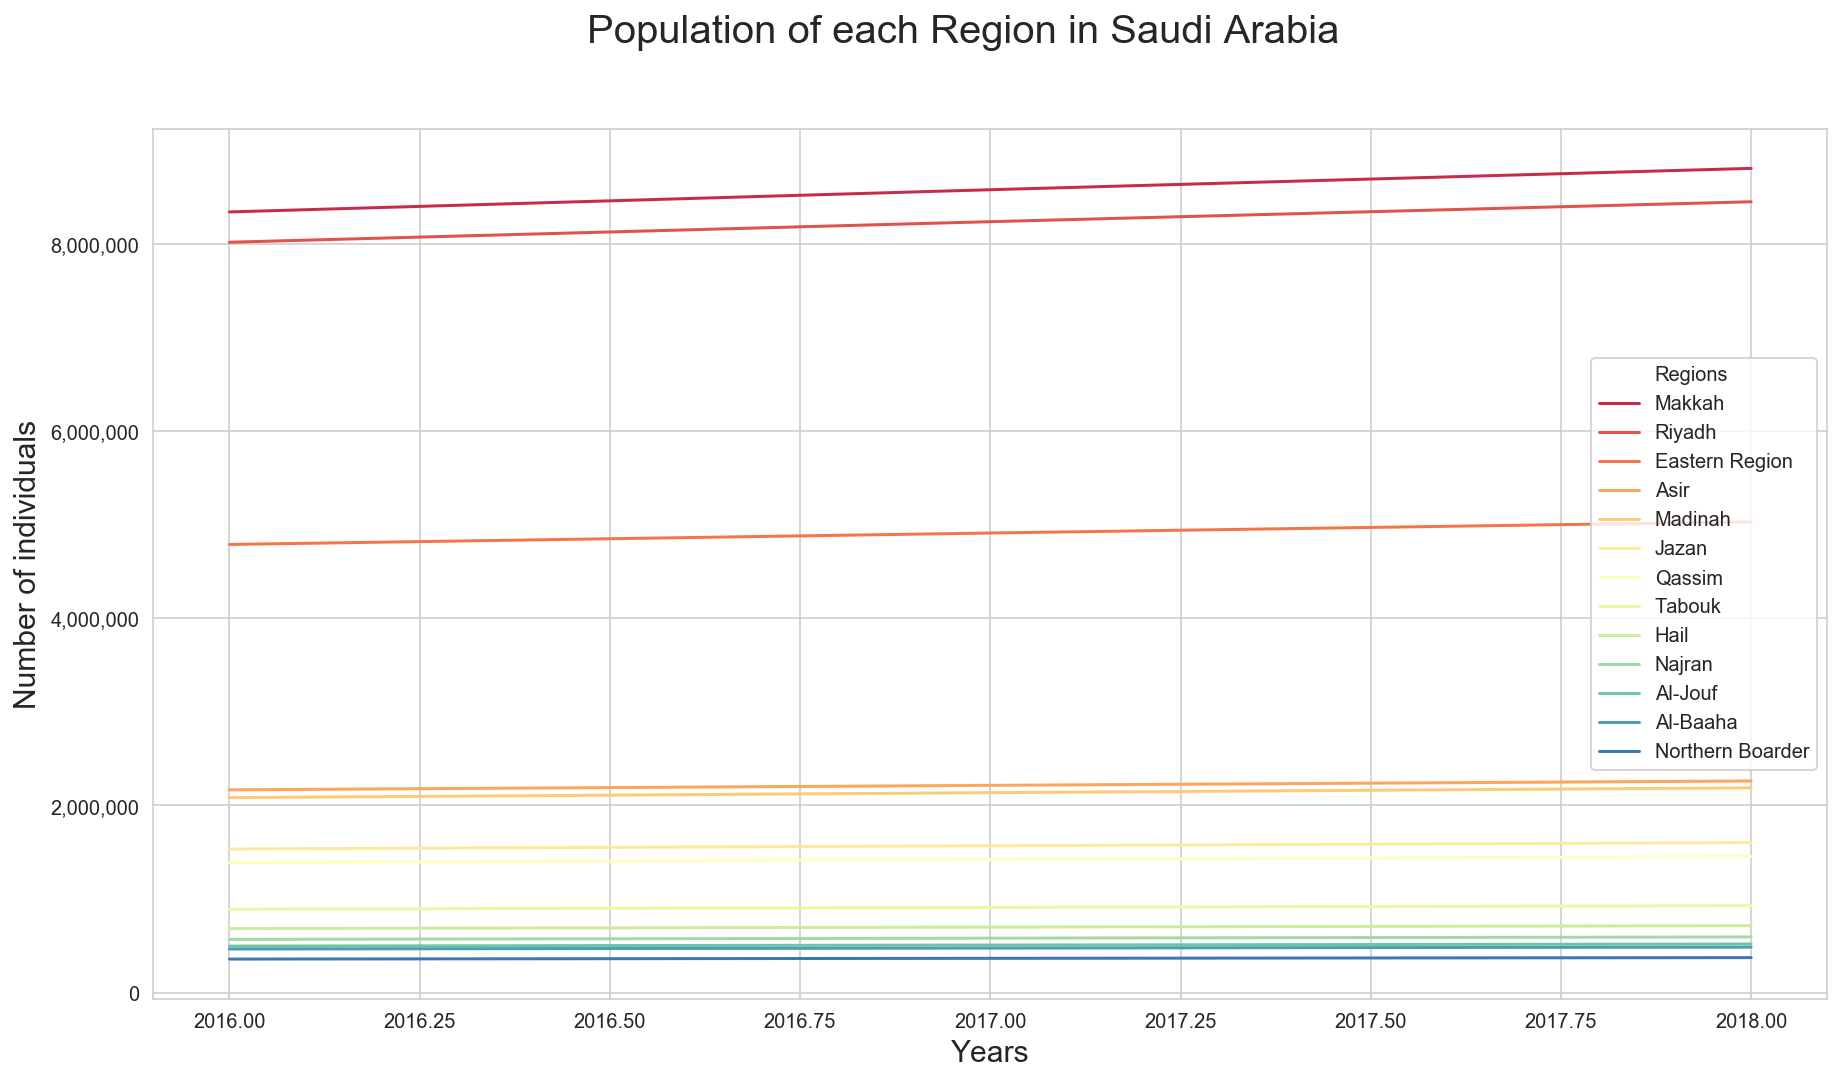

In [245]:
fig, ax = plt.subplots( figsize=(15, 8))

plt.suptitle("Population of each Region in Saudi Arabia", fontsize = 20)
ax1= sns.lineplot( data=combined_df.sort_values("pop_total", ascending=False), 
             y='pop_total' , 
             x='year', hue='region', palette=color)

plt.xlabel("Years", fontsize = 15)
plt.ylabel("Number of individuals", fontsize = 15)

ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

legend = ax.legend()
legend.texts[0].set_text("Regions")
#ax1.set( xlim =(1993,2018), xticks=combined_df['year'].unique().tolist())

plt.show()

### Trends in Issued Driving Licenses in Saudi Arabia (1993-2018):

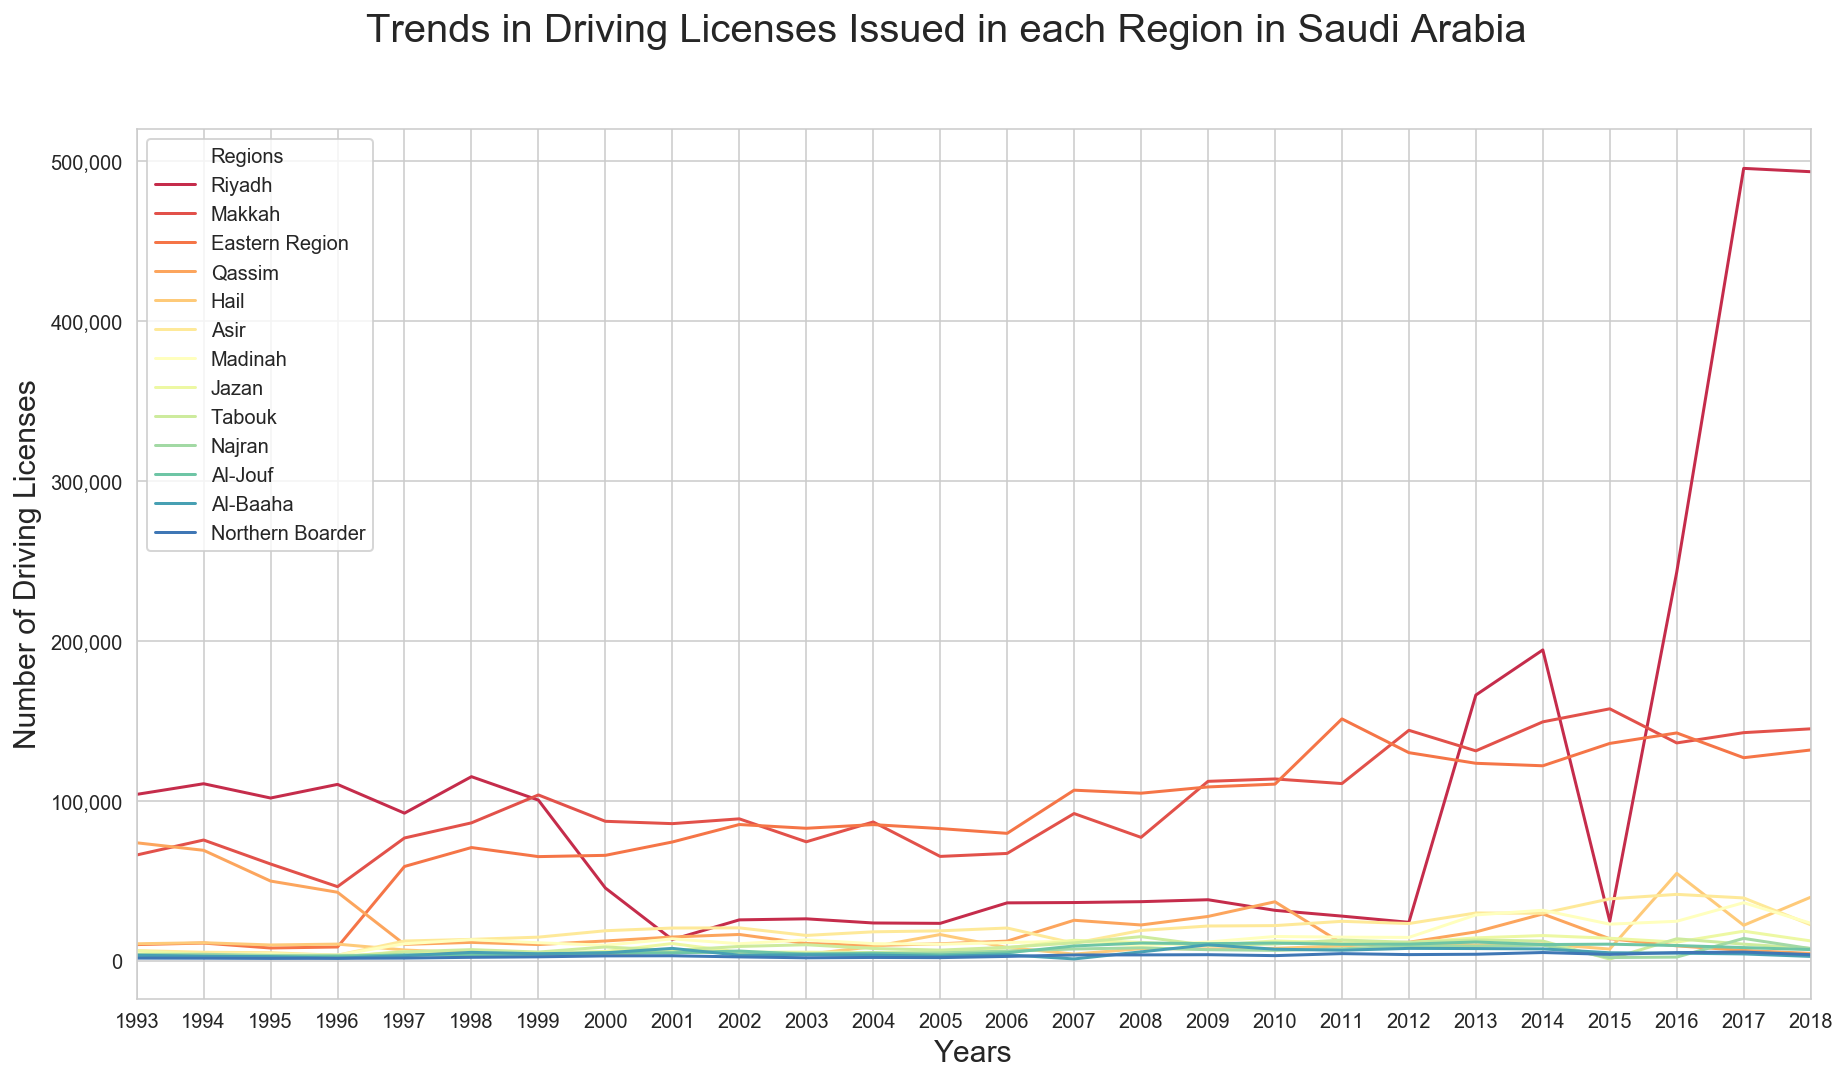

In [246]:
fig, ax = plt.subplots( figsize=(15, 8))

plt.suptitle("Trends in Driving Licenses Issued in each Region in Saudi Arabia", fontsize = 20)
ax1= sns.lineplot( data=combined_df.sort_values("driving_licenses", ascending=False), 
             y='driving_licenses' , 
             x='year', hue='region', palette=color)

plt.xlabel("Years", fontsize = 15)
plt.ylabel("Number of Driving Licenses", fontsize = 15)

legend = ax.legend()
legend.texts[0].set_text("Regions")
ax1.set( xlim =(1993,2018), xticks=combined_df['year'].unique().tolist())

ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


plt.show()

We can see from the line plot that, the three main Regions of saudi arabia  in the last two years of 2017 and 2018, the number of issued driving licence in Riyadh region increased 

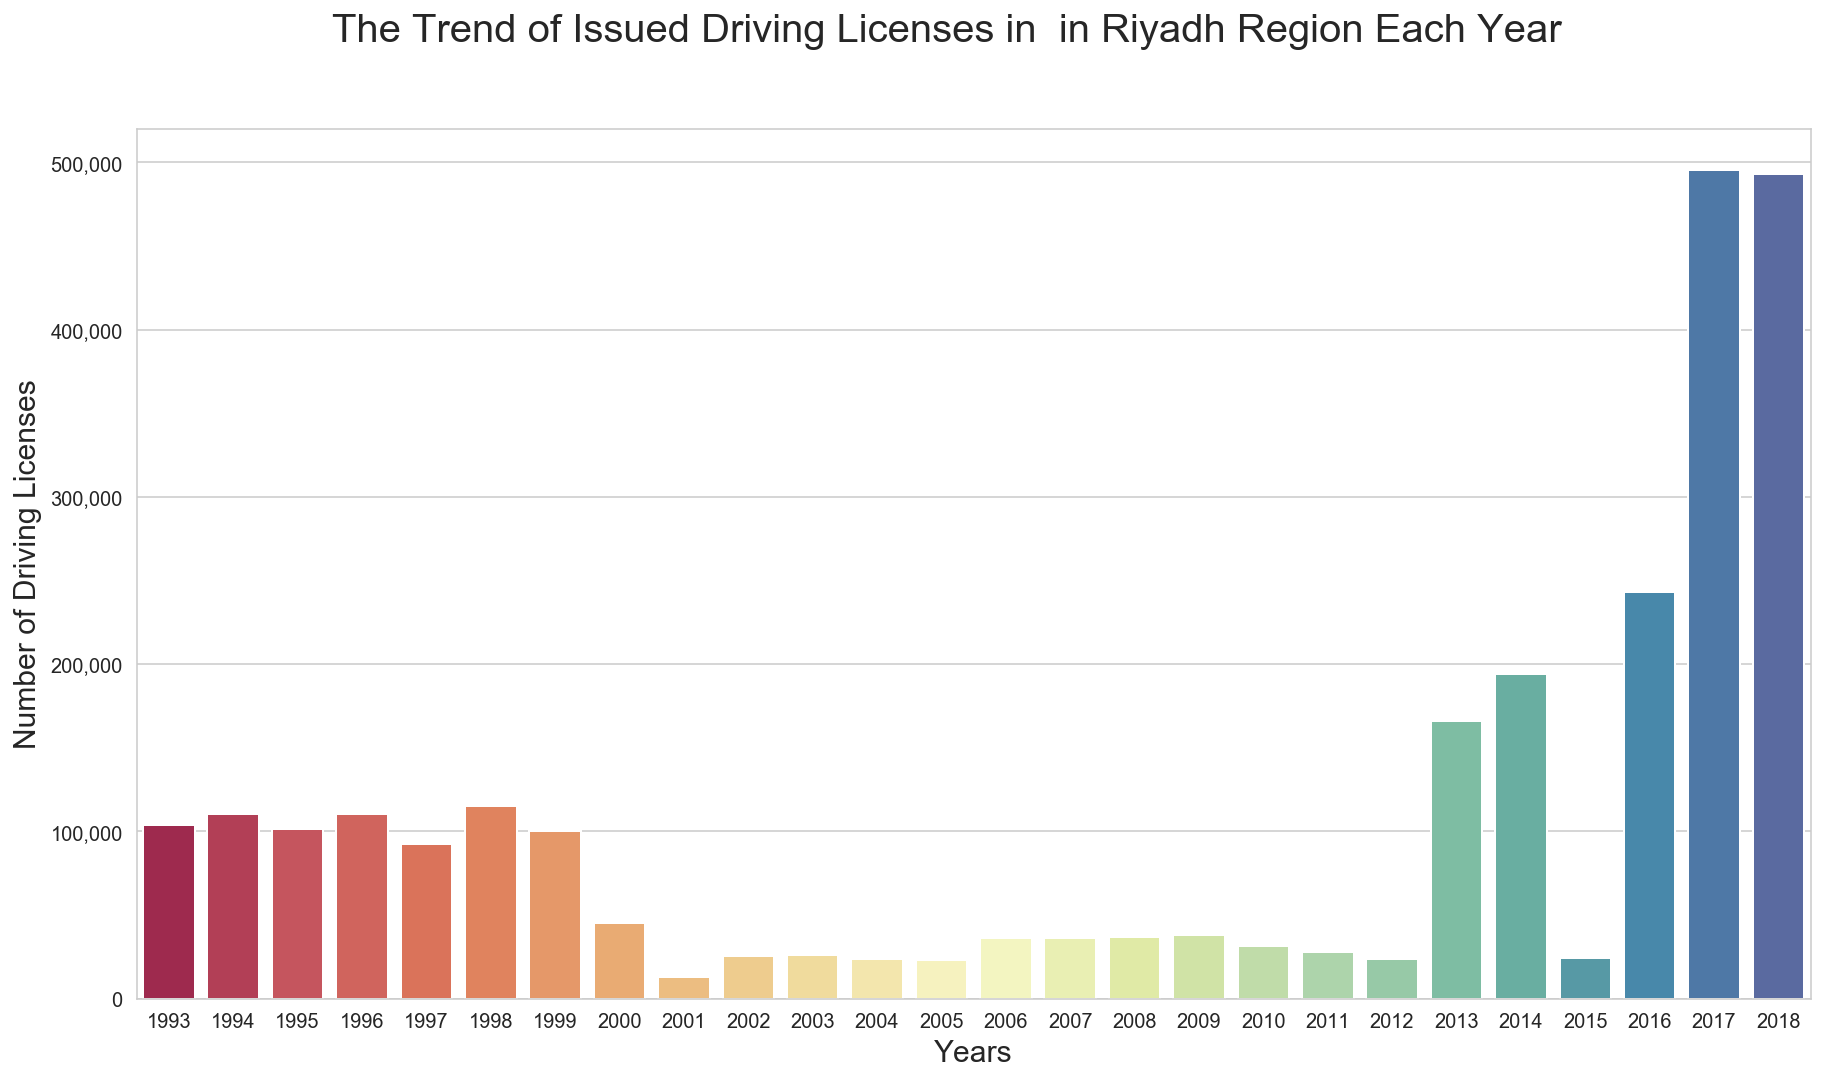

In [267]:
fig, ax = plt.subplots(1 , figsize=(15, 8))

plt.suptitle('The Trend of Issued Driving Licenses in  in Riyadh Region Each Year', fontsize=20)
sns.barplot(x="year", y="driving_licenses", 
            data=combined_df[combined_df['region'].isin(['Riyadh'])].sort_values("driving_licenses", ascending=False),
            palette=color)


plt.xlabel("Years", fontsize = 15)
plt.ylabel("Number of Driving Licenses", fontsize = 15)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


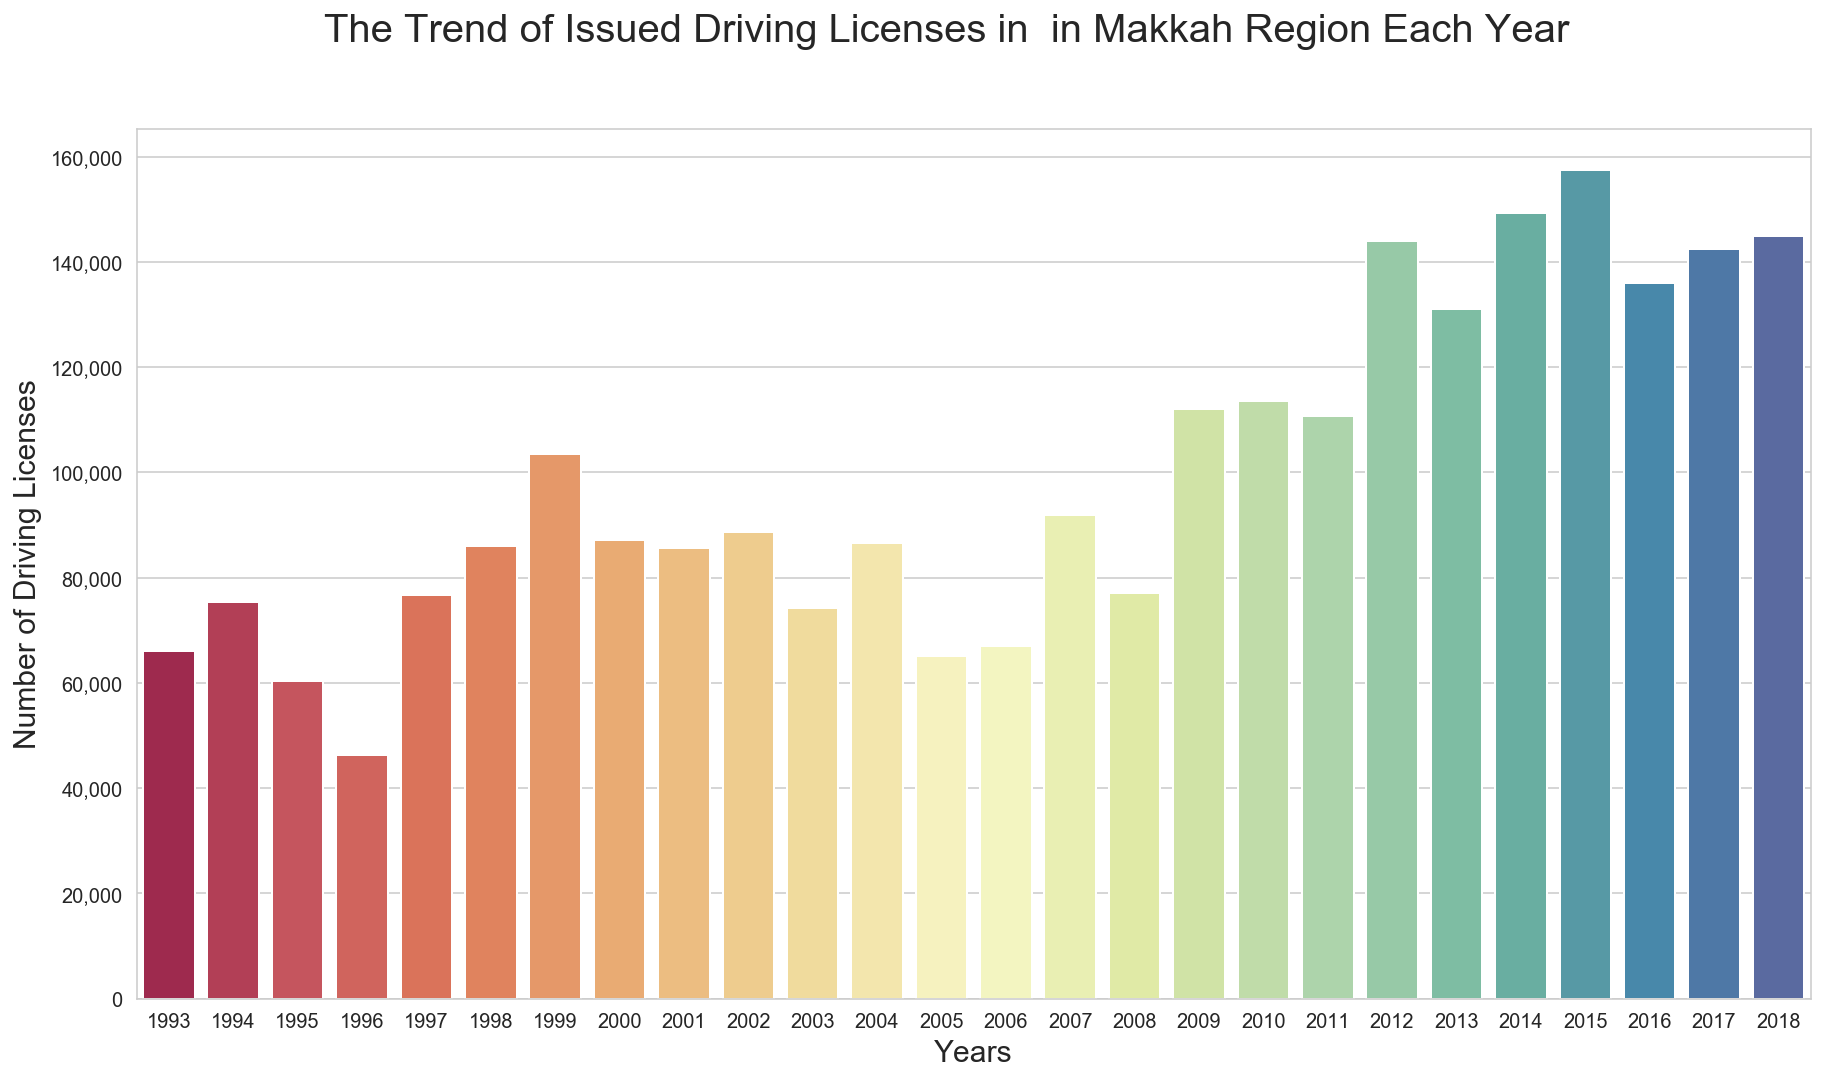

In [268]:
fig, ax = plt.subplots(1 , figsize=(15, 8))

plt.suptitle('The Trend of Issued Driving Licenses in  in Makkah Region Each Year', fontsize=20)
sns.barplot(x="year", y="driving_licenses", 
            data=combined_df[combined_df['region'].isin(['Makkah'])].sort_values("driving_licenses", ascending=False),
            palette=color)

plt.xlabel("Years", fontsize = 15)
plt.ylabel("Number of Driving Licenses", fontsize = 15)


ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


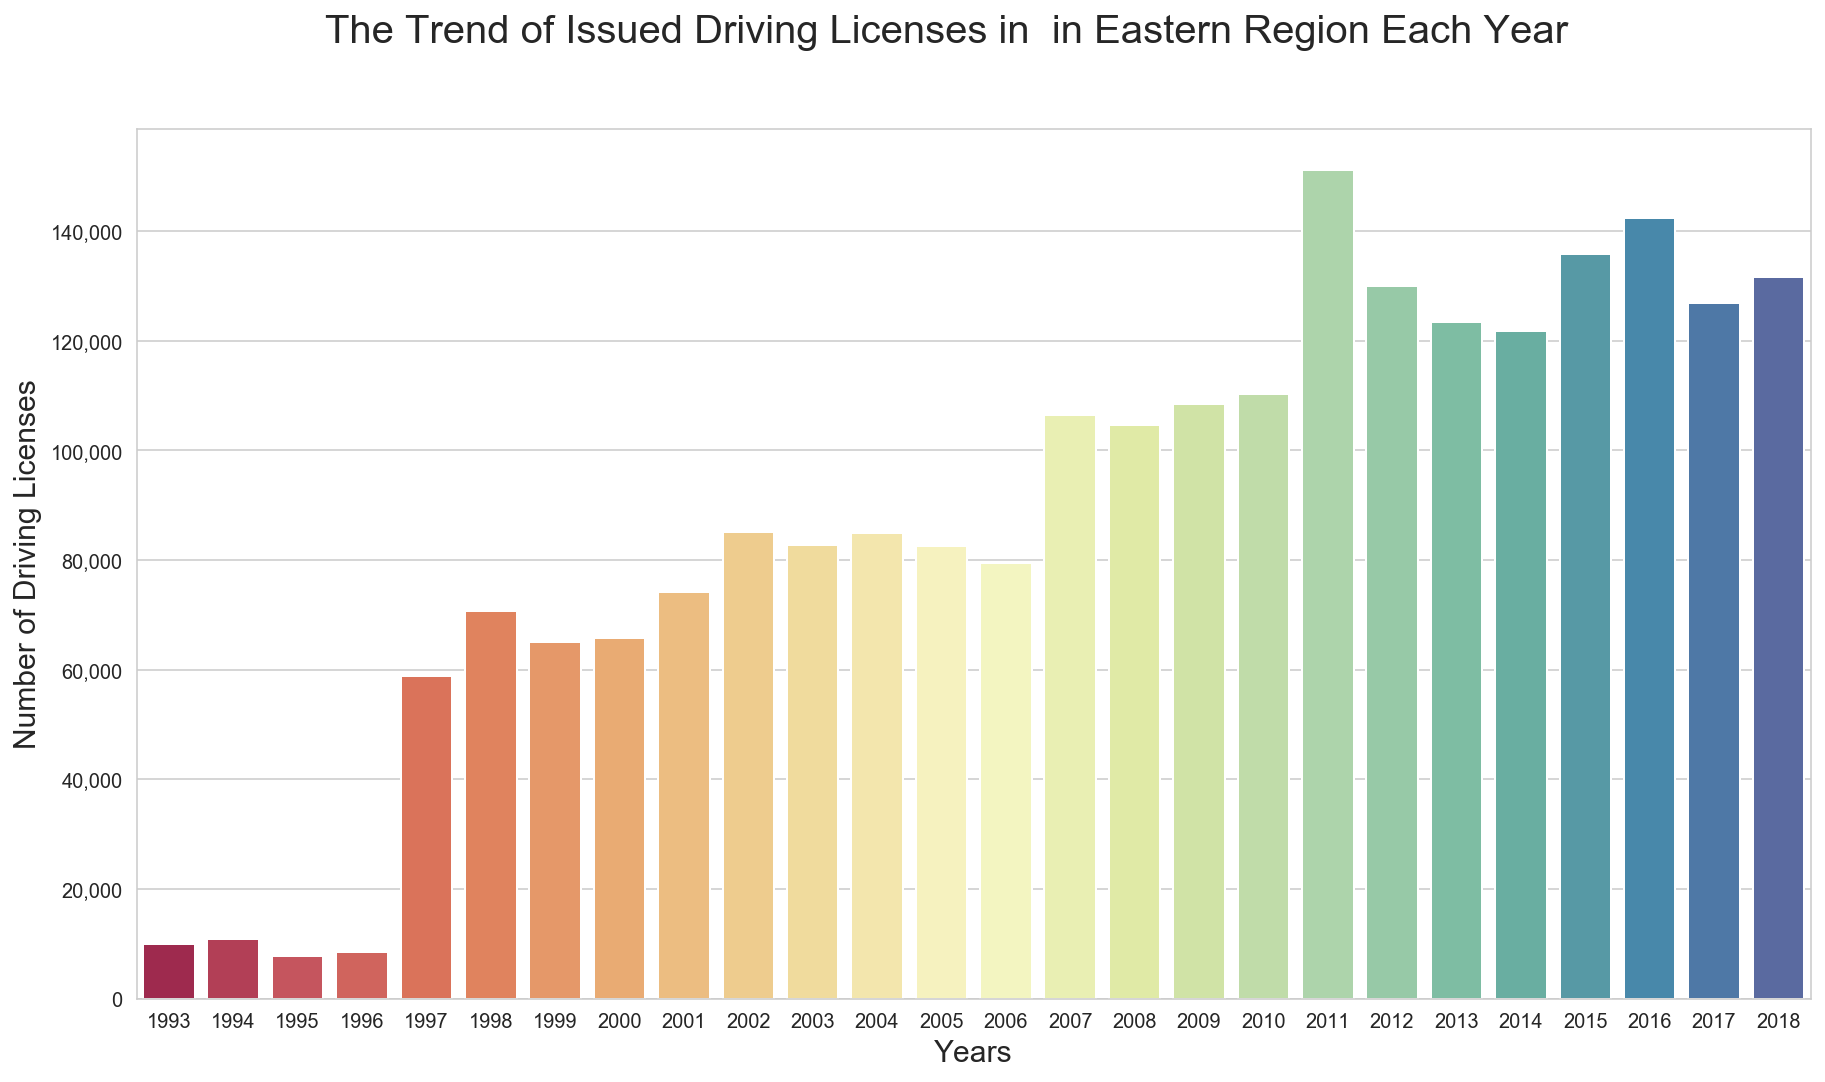

In [269]:
fig, ax = plt.subplots(1 , figsize=(15, 8))

plt.suptitle('The Trend of Issued Driving Licenses in  in Eastern Region Each Year', fontsize=20)
sns.barplot(x="year", y="driving_licenses", 
            data=combined_df[combined_df['region'].isin(['Eastern Region'])].sort_values("driving_licenses", ascending=False),
            palette=color)

plt.xlabel("Years", fontsize = 15)
plt.ylabel("Number of Driving Licenses", fontsize = 15)


ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


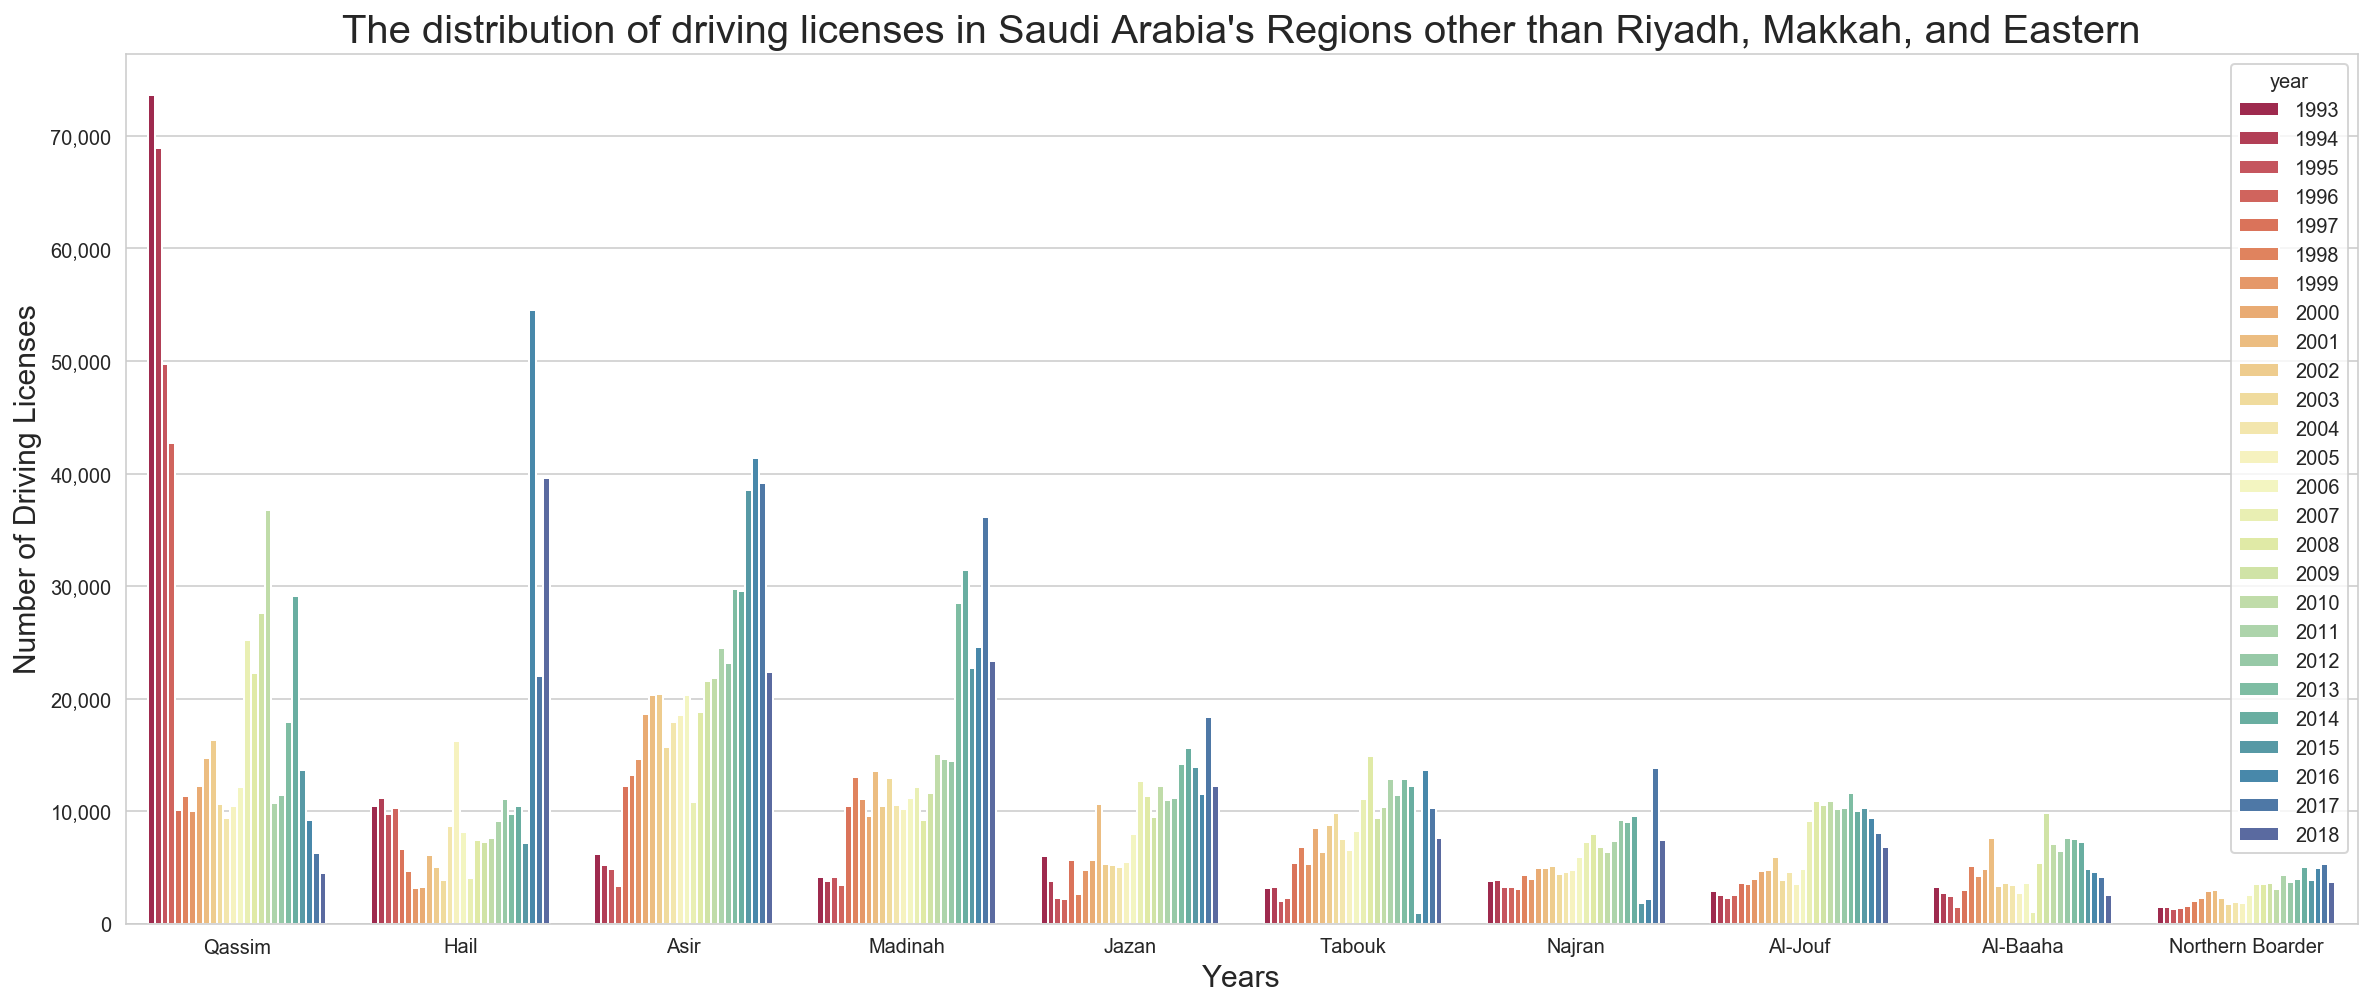

In [270]:
fig, ax = plt.subplots(1 , figsize=(20, 8))

plt.title("The distribution of driving licenses in Saudi Arabia's Regions other than Riyadh, Makkah, and Eastern", fontsize=20)
sns.barplot(x="region", y="driving_licenses", 
            hue="year", 
            data=combined_df[~combined_df['region'].isin(['Riyadh', 'Makkah', 'Eastern Region'])].sort_values("driving_licenses", ascending=False),
                 palette=color)

plt.xlabel("Years", fontsize = 15)
plt.ylabel("Number of Driving Licenses", fontsize = 15)


ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

### Trends in Accidents, Deaths, and Injuries in Saudi Arabia (1993-2018):

(0.5, 2354.65)

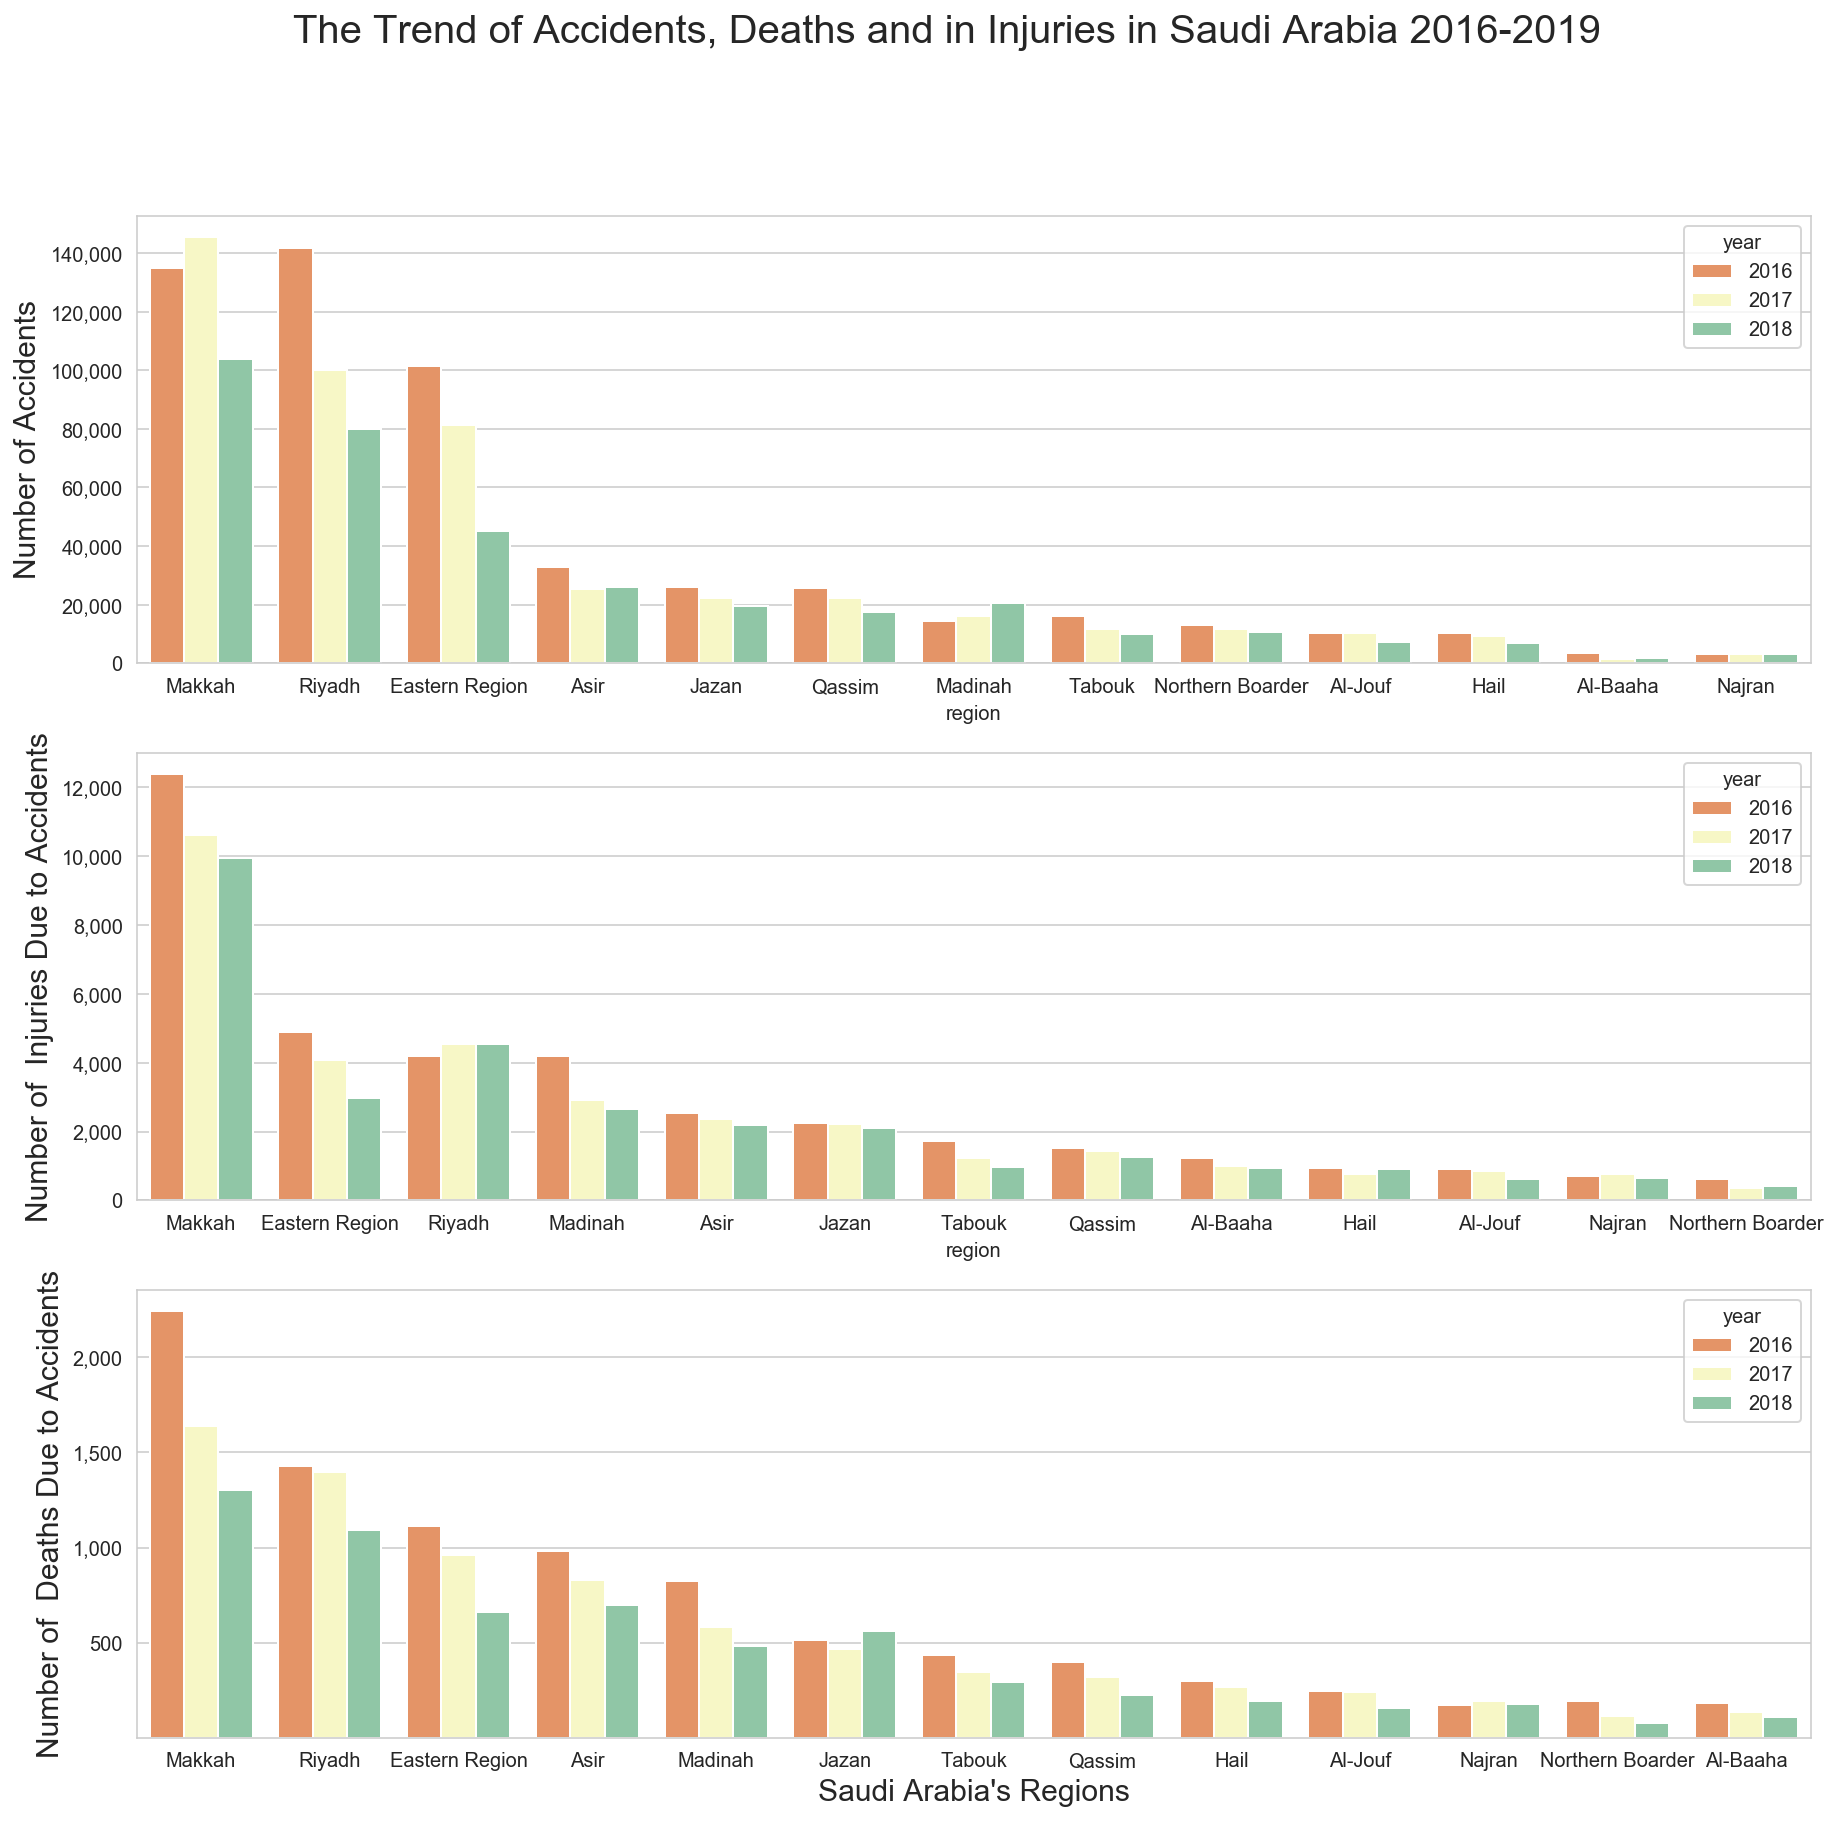

In [312]:
fig, ax = plt.subplots(3 , figsize=(15, 14))

plt.suptitle('The Trend of Accidents, Deaths and in Injuries in Saudi Arabia 2016-2019', fontsize=20)

ax1=sns.barplot(x="region", y="accidents", 
                 hue="year", data=combined_df[combined_df['year'].isin([2016,2017,2018])].sort_values("accidents", ascending=False),
                 palette = color, ax=ax[0] )

ax2=sns.barplot(x="region", y="injuries", 
                 hue="year", data=combined_df[combined_df['year'].isin([2016,2017,2018])].sort_values("injuries", ascending=False),
                 palette = color , ax=ax[1])

ax3=sns.barplot(x="region", y="deaths", 
                 hue="year", data=combined_df[combined_df['year'].isin([2016,2017,2018])].sort_values("deaths", ascending=False),
                 palette = color , ax=ax[2])

ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[2].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax1.set_ylabel("Number of Accidents", fontsize = 15)
ax2.set_ylabel("Number of  Injuries Due to Accidents", fontsize = 15)
ax3.set_ylabel("Number of  Deaths Due to Accidents", fontsize = 15)

ax3.set_xlabel("Saudi Arabia's Regions", fontsize = 15)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

### Trends in Saudi Arabia's Regions beased on Population,Issued driving licenses, and Accidents (2016-2018):

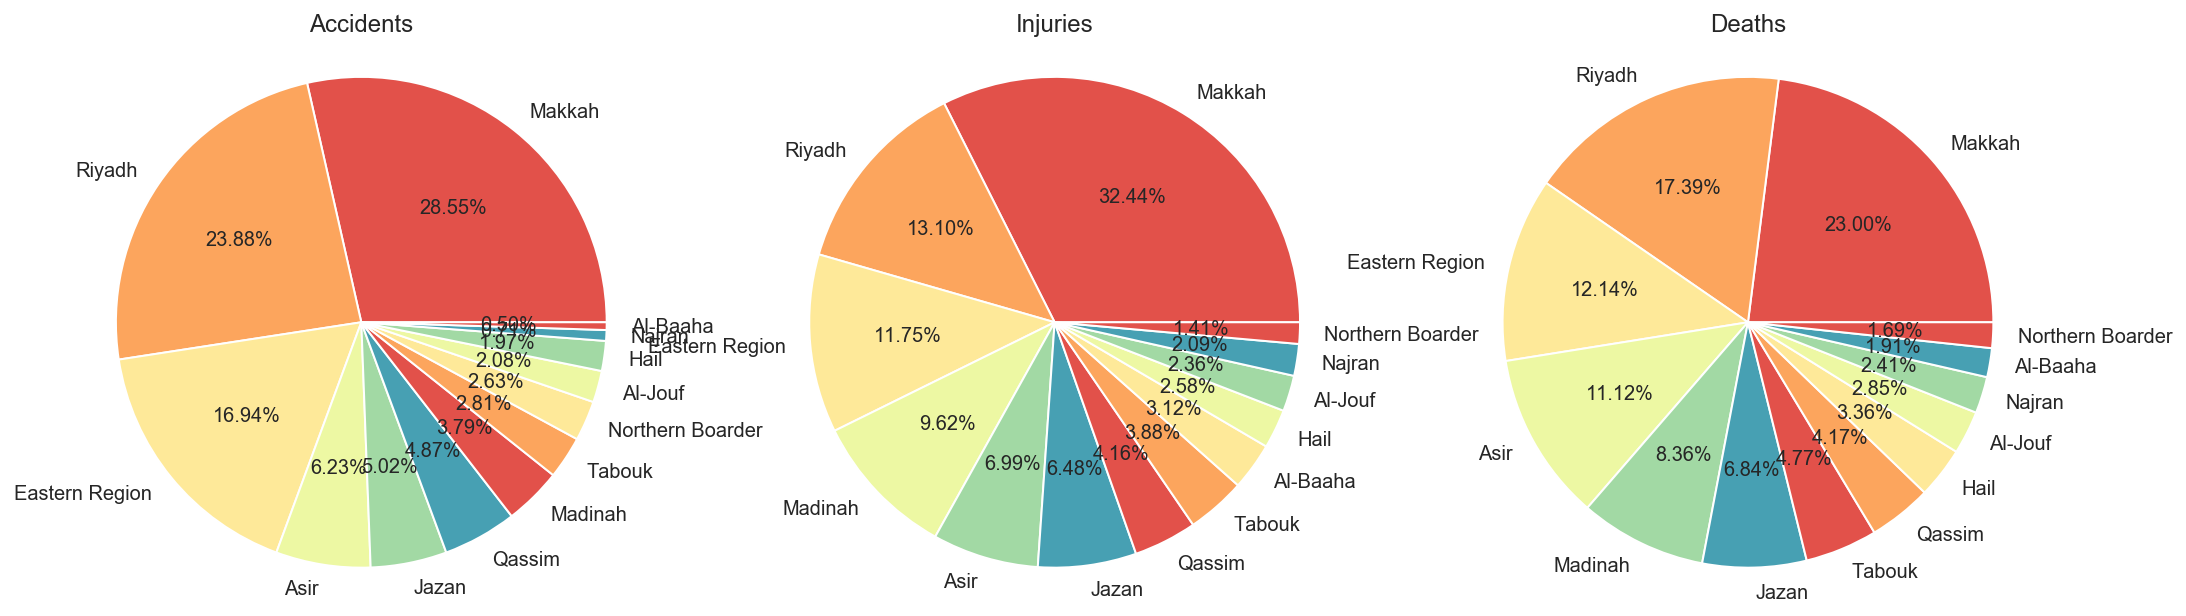

In [409]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 15))
radius=1.1
fig.tight_layout(pad=4)
# 2016
ax[0].title.set_text('Accidents')
ax[0].pie(combined_df[combined_df['year'].isin([2016,2017,2018])].groupby('region')['accidents'].sum().sort_values(ascending=False).tolist(),
          labels = combined_df[combined_df['year'].isin([2016,2017,2018])].groupby('region')['accidents'].sum().sort_values(ascending=False).index.tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)


ax[1].title.set_text('Injuries')
ax[1].pie(combined_df[combined_df['year'].isin([2016,2017,2018])].groupby('region')['injuries'].sum().sort_values(ascending=False).tolist(),
          labels = combined_df[combined_df['year'].isin([2016,2017,2018])].groupby('region')['injuries'].sum().sort_values(ascending=False).index.tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)

ax[2].title.set_text('Deaths')
ax[2].pie(combined_df[combined_df['year'].isin([2016,2017,2018])].groupby('region')['deaths'].sum().sort_values(ascending=False).tolist(),
          labels = combined_df[combined_df['year'].isin([2016,2017,2018])].groupby('region')['deaths'].sum().sort_values(ascending=False).index.tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)

plt.show()

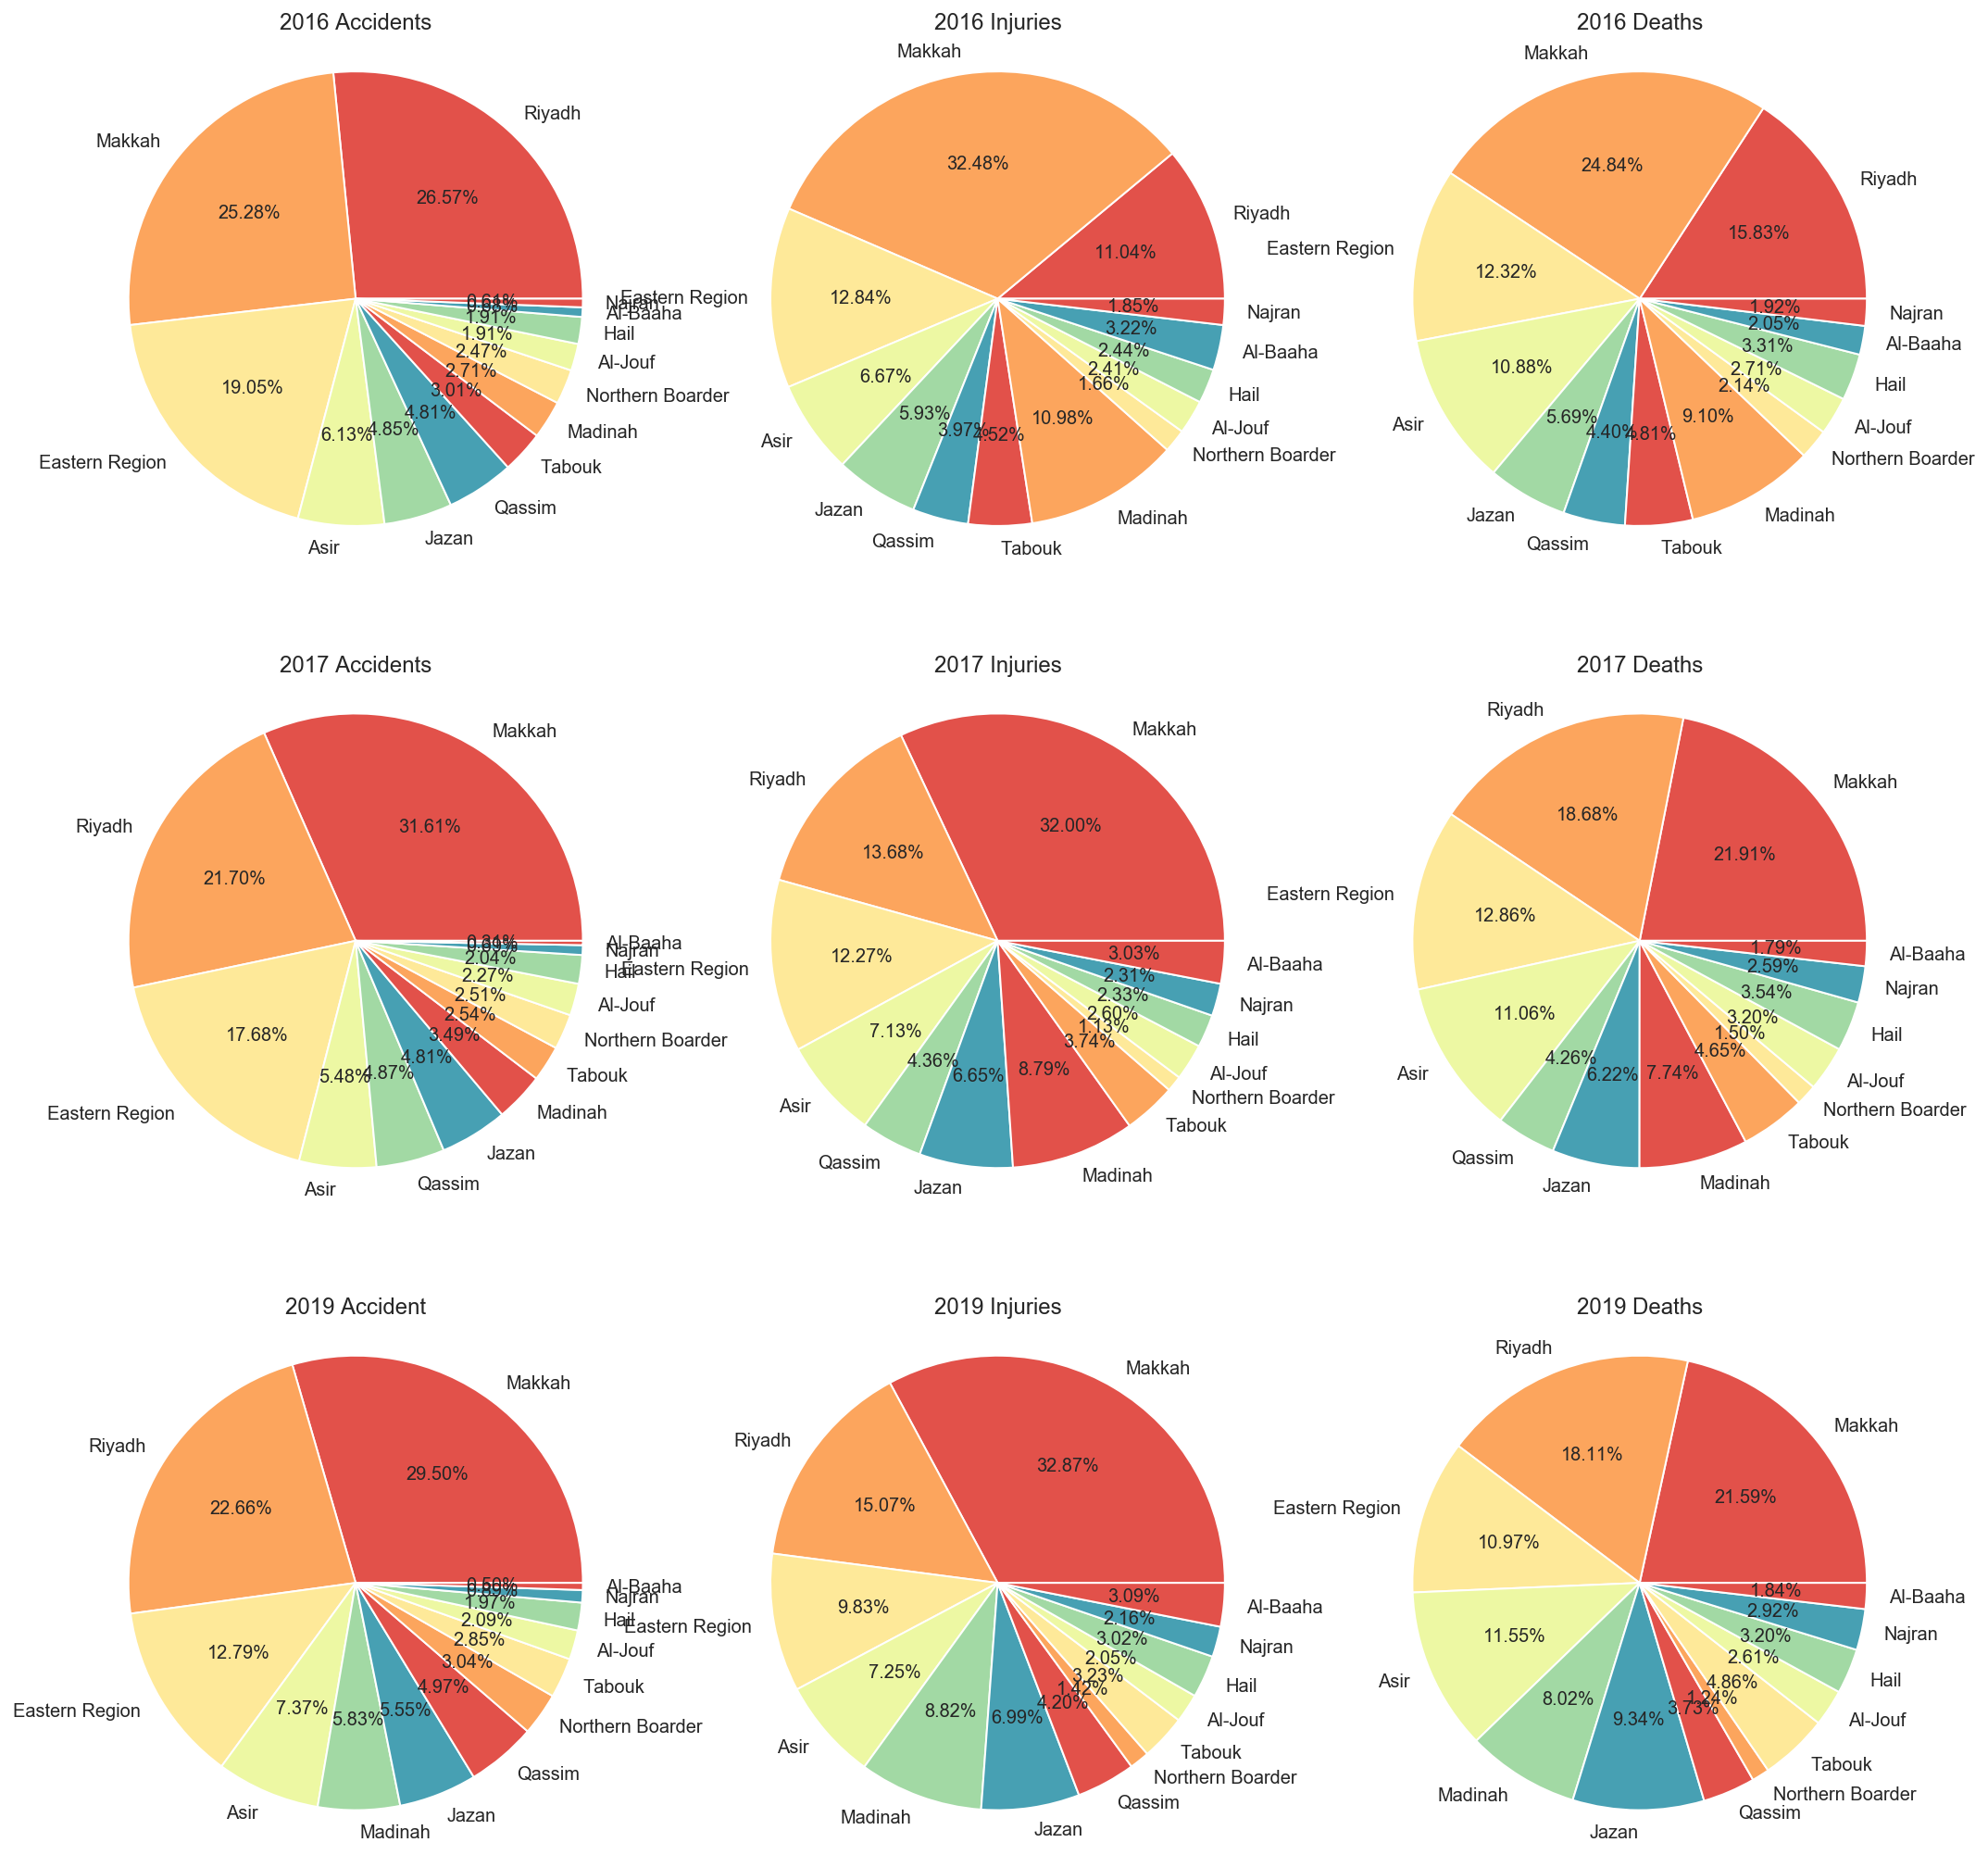

In [372]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
radius=1.0
fig.tight_layout(pad=4)
# 2016
ax[0,0].title.set_text('2016 Accidents')
ax[0,0].pie(combined_df[combined_df['year'].isin([2016])].sort_values("accidents", ascending=False)['accidents'].tolist(),
          labels = combined_df[combined_df['year'].isin([2016])].sort_values("accidents", ascending=False)['region'].tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)


ax[0,1].title.set_text('2016 Injuries')
ax[0,1].pie(combined_df[combined_df['year'].isin([2016])].sort_values("accidents", ascending=False)['injuries'].tolist(),
          labels = combined_df[combined_df['year'].isin([2016])].sort_values("accidents", ascending=False)['region'].tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)

ax[0, 2].title.set_text('2016 Deaths')
ax[0, 2].pie(combined_df[combined_df['year'].isin([2016])].sort_values("accidents", ascending=False)['deaths'].tolist(),
          labels = combined_df[combined_df['year'].isin([2016])].sort_values("accidents", ascending=False)['region'].tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)

#2017
ax[1,0].title.set_text('2017 Accidents')
ax[1,0].pie(combined_df[combined_df['year'].isin([2017])].sort_values("accidents", ascending=False)['accidents'].tolist(),
          labels = combined_df[combined_df['year'].isin([2017])].sort_values("accidents", ascending=False)['region'].tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)

ax[1,1].title.set_text('2017 Injuries')
ax[1,1].pie(combined_df[combined_df['year'].isin([2017])].sort_values("accidents", ascending=False)['injuries'].tolist(),
          labels = combined_df[combined_df['year'].isin([2017])].sort_values("accidents", ascending=False)['region'].tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)

ax[1,2].title.set_text('2017 Deaths')
ax[1,2].pie(combined_df[combined_df['year'].isin([2017])].sort_values("accidents", ascending=False)['deaths'].tolist(),
          labels = combined_df[combined_df['year'].isin([2017])].sort_values("accidents", ascending=False)['region'].tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)


#2018
ax[2,0].title.set_text('2019 Accident')
ax[2,0].pie(combined_df[combined_df['year'].isin([2018])].sort_values("accidents", ascending=False)['accidents'].tolist(),
          labels = combined_df[combined_df['year'].isin([2018])].sort_values("accidents", ascending=False)['region'].tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)

ax[2,1].title.set_text('2019 Injuries')
ax[2,1].pie(combined_df[combined_df['year'].isin([2018])].sort_values("accidents", ascending=False)['injuries'].tolist(),
          labels = combined_df[combined_df['year'].isin([2018])].sort_values("accidents", ascending=False)['region'].tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)

ax[2,2].title.set_text('2019 Deaths')
ax[2,2].pie(combined_df[combined_df['year'].isin([2018])].sort_values("accidents", ascending=False)['deaths'].tolist(),
          labels = combined_df[combined_df['year'].isin([2018])].sort_values("accidents", ascending=False)['region'].tolist(),
          autopct = "%0.2f%%", colors=color_plt.colors, radius = radius)

plt.show()

In [154]:
riyadh_df = combined_df.loc[combined_df['region'].isin(['Riyadh']) & combined_df['year'].isin([2016,2017,2018])].drop(['region','geo_point_2d', 'x','y'],axis=1)
riyadh_df

year  accidents  deaths  injuries  driving_licenses  pop_females  \
309  2016   141736.0  1430.0    4207.0            242851    3272442.0   
310  2017    99925.0  1399.0    4540.0            495307    3359343.0   
311  2018    79884.0  1091.0    4554.0            493224    3436880.0   

     pop_males  pop_total  
309  4742236.0  8014678.0  
310  4874959.0  8234302.0  
311  5009986.0  8446866.0

(0.5, 148822.3)

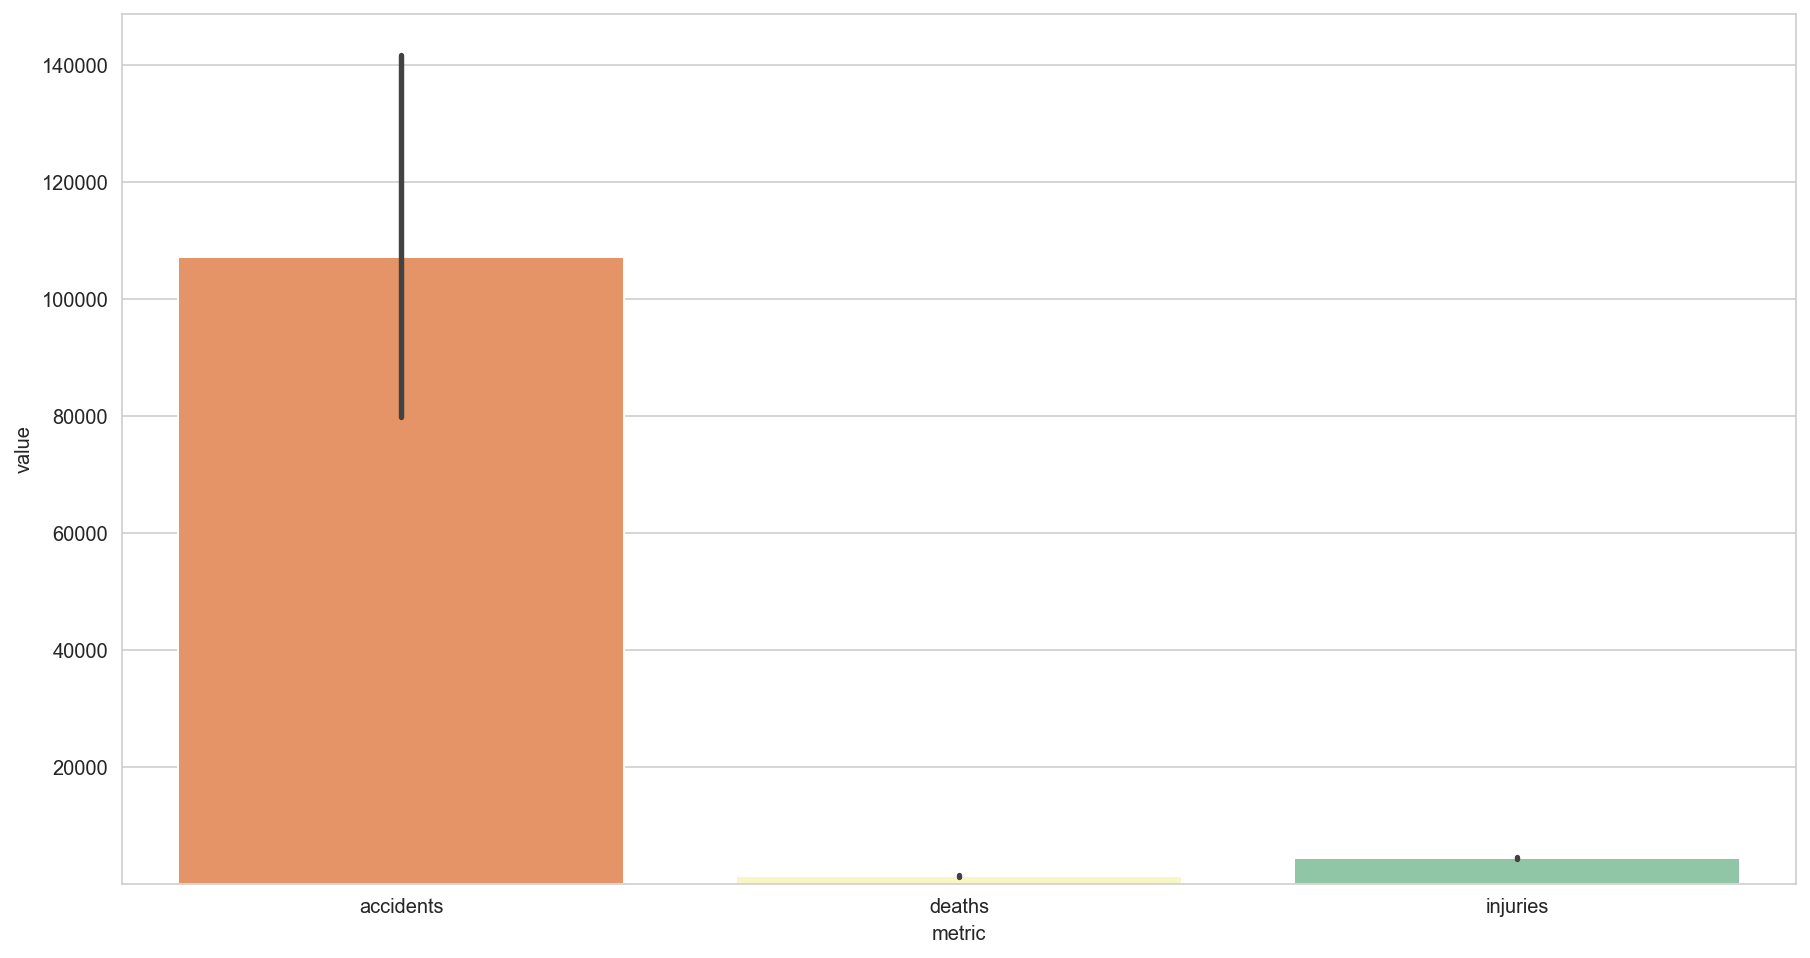

In [382]:
# delete later 
riyadh_df = combined_df.loc[combined_df['region'].isin(['Riyadh']) & combined_df['year'].isin([2016,2017,2018])].drop(['region','driving_licenses','geo_point_2d', 'x','y','pop_females','pop_males','pop_total'],axis=1)
riyadh_num_df= riyadh_df[riyadh_df.select_dtypes(include=np.number).columns.tolist()]

fig, ax = plt.subplots( figsize=(15, 8))

ax = sns.barplot(y="value", x="metric", data=pd.melt(riyadh_df , id_vars="year", var_name="metric", value_name="value"), palette=color )
#plt.xlabel('Number of Accidents', size=16)
#plt.ylabel('value', size=16)


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values


## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [163]:
combined_df.head()

region  year  accidents  deaths  injuries  driving_licenses  \
0  Al-Baaha  1993        NaN     NaN       NaN              3270   
1  Al-Baaha  1994        NaN     NaN       NaN              2729   
2  Al-Baaha  1995        NaN     NaN       NaN              2423   
3  Al-Baaha  1996        NaN     NaN       NaN              1468   
4  Al-Baaha  1997        NaN     NaN       NaN              3027   

                   geo_point_2d          x          y  pop_females  pop_males  \
0  20.1484058503, 41.4665484892  20.148406  41.466548          NaN        NaN   
1  20.1484058503, 41.4665484892  20.148406  41.466548          NaN        NaN   
2  20.1484058503, 41.4665484892  20.148406  41.466548          NaN        NaN   
3  20.1484058503, 41.4665484892  20.148406  41.466548          NaN        NaN   
4  20.1484058503, 41.4665484892  20.148406  41.466548          NaN        NaN   

   pop_total  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

#### Sum and Precentage Change in Number of Issued Driving Licenses, Traffic Accidents and Casualties: 

In [170]:
important_columns=['driving_licenses','accidents','deaths','injuries', 'pop_females', 'pop_males']
sums_fd= combined_df[combined_df['year'].isin([2016,2017,2018])].groupby(['year'])[important_columns].sum().reset_index()
sums_fd ['casualties']= sums_fd['deaths']+ sums_fd['injuries']
sums_fd

year  driving_licenses  accidents  deaths  injuries  pop_females  \
0  2016            697017   533380.0  9031.0   38120.0   13527861.0   
1  2017            928165   460488.0  7489.0   33199.0   13866424.0   
2  2018            899844   352464.0  6025.0   30217.0   14172704.0   

    pop_males  
0  18259719.0  
1  18746422.0  
2  19240956.0

In [273]:
sums_fd.pct_change()

year  driving_licenses  accidents    deaths  injuries  pop_females  \
0       NaN               NaN        NaN       NaN       NaN          NaN   
1  0.000496          0.331625  -0.136661 -0.170745 -0.129092     0.025027   
2  0.000496         -0.030513  -0.234586 -0.195487 -0.089822     0.022088   

   pop_males  
0        NaN  
1   0.026654  
2   0.026380

In [278]:
# dropping 2017 to see the precentage chnage from 2016 to 2018
sums_fd.drop(index=1).pct_change()

year  driving_licenses  accidents    deaths  injuries  pop_females  \
0       NaN               NaN        NaN       NaN       NaN          NaN   
2  0.000992          0.290993  -0.339188 -0.332854 -0.207319     0.047668   

   pop_males  casualties  
0        NaN         NaN  
2   0.053738   -0.231363

We can see from the dataframe above that there is a 33.9% decrease in the number of accidents from 2016 to 2018, and a 33.2% decrease in the number of deaths and 20.7% in the number of injuries.

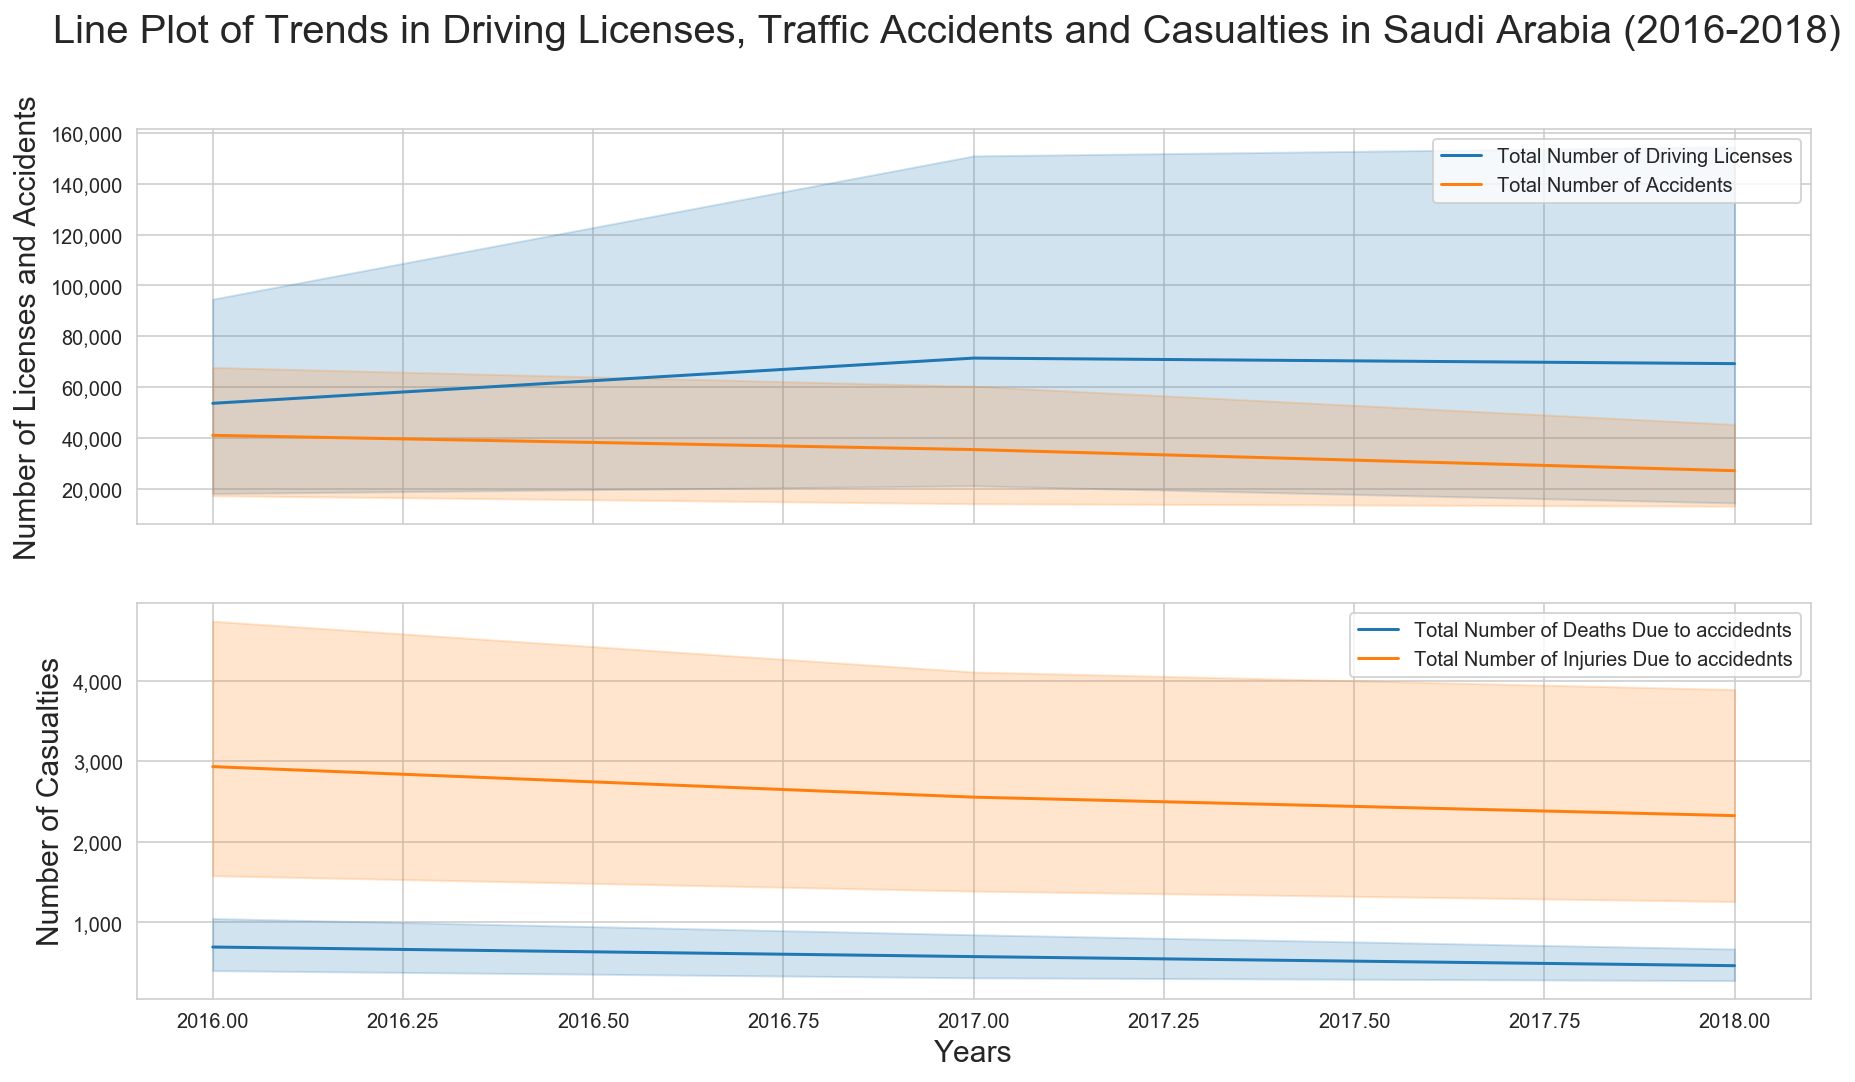

In [265]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 8),sharex=True)

plt.suptitle("Line Plot of Trends in Driving Licenses, Traffic Accidents and Casualties in Saudi Arabia (2016-2018)", fontsize = 20)

ax1= sns.lineplot( data=combined_df[combined_df['year'].isin([2016,2017,2018])], y='driving_licenses' , x='year',  label='Total Number of Driving Licenses',ax=ax[0])
ax1= sns.lineplot( data=combined_df[combined_df['year'].isin([2016,2017,2018])], y='accidents' , x='year',  label='Total Number of Accidents' ,ax=ax[0])
ax1.set_ylabel("Number of Licenses and Accidents", fontsize = 15)

ax2=sns.lineplot( data=combined_df[combined_df['year'].isin([2016,2017,2018])], y='deaths' , x='year',  label='Total Number of Deaths Due to accidednts',ax=ax[1])
ax2=sns.lineplot( data=combined_df[combined_df['year'].isin([2016,2017,2018])], y='injuries' , x='year',  label='Total Number of Injuries Due to accidednts',ax=ax[1])
ax2.set_ylabel("Number of Casualties", fontsize = 15)

ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


plt.xlabel("Years", fontsize = 15)

plt.show()


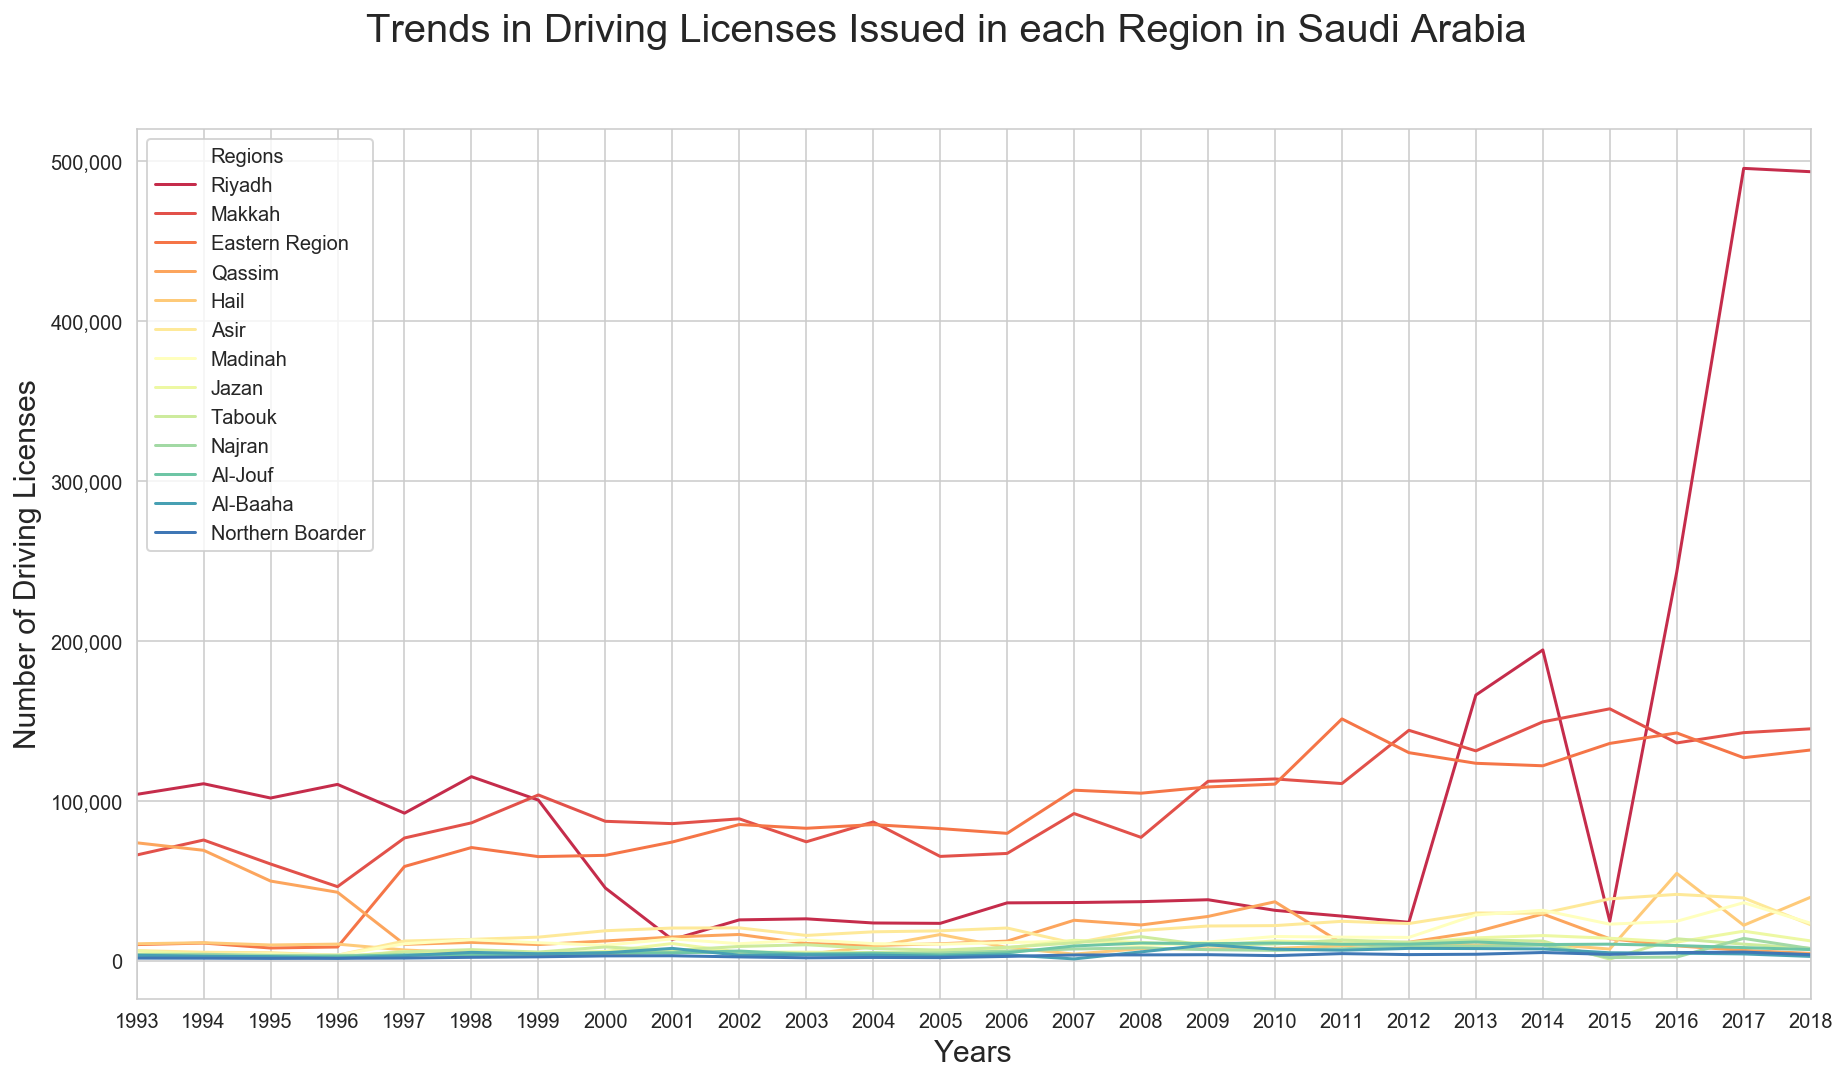

In [266]:
# delete later 
fig, ax = plt.subplots( figsize=(15, 8))

plt.suptitle("Trends in Driving Licenses Issued in each Region in Saudi Arabia", fontsize = 20)
ax1= sns.lineplot( data=combined_df.sort_values("driving_licenses", ascending=False), 
             y='driving_licenses' , 
             x='year', hue='region', palette=color)

plt.xlabel("Years", fontsize = 15)
plt.ylabel("Number of Driving Licenses", fontsize = 15)

legend = ax.legend()
legend.texts[0].set_text("Regions")
ax1.set( xlim =(1993,2018), xticks=combined_df['year'].unique().tolist())

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

In [105]:
numeric_columns = combined_df.select_dtypes(include=np.number).columns.tolist()
for column_name in numeric_columns:
    p_value = normaltest(combined_df[column_name].dropna()).pvalue
    skew_value = skew(combined_df[column_name].dropna())
    skewness=''
    if skew_value > 0:
        skewness = 'positively skewed'
    elif skew_value < 0: 
        skewness = 'negatively skewed'
    else:
        skewness = 'not skewed'
    
    if p_value < .05:
        print('The \033[1m{}\033[0m attribute is not normally distributed. It is \033[1m{}\033[0m with a value of ({})\n'
              .format(column_name,skewness, round(skew_value,2)))
    else:
        print('The \033[1m{}\033[0m attribute is normally distributed.  It is \033[1m{}\033[0m with a value of ({})\n'
              .format(column_name,  skewness, round(skew_value,2)))

The year attribute is not normally distributed. It is not skewed with a value of (0.0)

The accidents attribute is not normally distributed. It is positively skewed with a value of (1.56)

The deaths attribute is not normally distributed. It is positively skewed with a value of (1.41)

The injuries attribute is not normally distributed. It is positively skewed with a value of (2.19)

The driving_licenses attribute is not normally distributed. It is positively skewed with a value of (4.64)

The x attribute is not normally distributed. It is positively skewed with a value of (0.02)

The y attribute is not normally distributed. It is positively skewed with a value of (0.71)

The pop_females attribute is not normally distributed. It is positively skewed with a value of (1.4)

The pop_males attribute is not normally distributed. It is positively skewed with a value of (1.36)

The pop_total attribute is not normally distributed. It is positively skewed with a value of (1.37)



Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [106]:
def sample_data (df, n):
    z_90 = stats.norm().ppf([0.05,0.95])
    numeric_df = df[df.select_dtypes(include=np.number).columns.tolist()].dropna()
    # change the data type from dict to dataframe to easly get a sample
    sample = numeric_df.sample(n)
    
    for column_name in numeric_df:
        print('\nWe are \033[1m90 %\033[0m confident that the population mean of \033[1m{}\033[0m lays between \033[1m{}\033[0m'.format
              (column_name, np.mean(sample[column_name])+ z_90 * (np.std(sample[column_name]) /(np.sqrt(n)))))

In [107]:
numeric_df = combined_df[combined_df.select_dtypes(include=np.number).columns.tolist()]


In [108]:
## print('To find the 90% confidence interval:')
while True:
    print( 'The number of row = {} please choose an equal or smaller number'.format(len(combined_df.dropna())))
    n = int(input("Enter The sample size: "))
    if n <= len(combined_df.index):
        break

sample_data (combined_df, n)

The number of row = 39 please choose an equal or smaller number


Enter The sample size:  20



We are 90 % confident that the population mean of year lays between [2016.7540406 2017.3459594]

We are 90 % confident that the population mean of accidents lays between [15014.61116484 38019.88883516]

We are 90 % confident that the population mean of deaths lays between [362.80858174 641.09141826]

We are 90 % confident that the population mean of injuries lays between [1398.60322782 3044.49677218]

We are 90 % confident that the population mean of driving_licenses lays between [ 9650.04731597 87904.25268403]

We are 90 % confident that the population mean of x lays between [23.55357537 26.59025593]

We are 90 % confident that the population mean of y lays between [40.98129758 42.3319377 ]

We are 90 % confident that the population mean of pop_females lays between [ 514246.07640124 1211683.02359876]

We are 90 % confident that the population mean of pop_males lays between [ 645954.63189141 1617347.76810859]

We are 90 % confident that the population mean of pop_total lays between [1

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:
1- The trend of an increase of drivin licnces issued in Ryiadh region since 2017:

On 26 September 2017, King Salman issued a statement recognizing the right of Saudi women to drive in keeping with Sharia. Licenses were set to be issued to women starting on 24 June 2018. Saudi authorities also contacted women to drive campaigners.

2- Accident numbers were increasing every year from 2016-2018, not decreasing like all of the mother regions:

3- Yje number of accidents in Makkah Region increased in 2017 from 2016, which was odd compared with other regions, as all ther regions had a decrease in number of accidents.

4- 



https://www.moi.gov.sa/wps/portal/!ut/p/z0/fY67DoIwFIZfpUvnc1BCwsjgBTUx0UHs0jRY8Ci0XAr6-Bbc2f5b_nwgIANh1EilcmSNqry_i0hiGob7IFwdz-tkg0m0PcWXGIM0QLhqAwcQyyP_Qq-2FQmI3Bqnvw6y2hJ70EcZjpN82lqzuTSO4-Q4drocqpmEo-tUUVDORrL_qGeSNdozOtL9_CGXN_KhCzVUTnri5r27_QA9c4vb/

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:

